### Problem Statement:

The business objective is to **predict the churn of high value customers in the last ninth month (`churn phase`) using the data (features) from the first three months (`good phase` and `action phase`)**

Other Objectives include feature importance and recommend strategies to manage customer churn

### **Approach and Analysis**

**The approach followed is mentioned below along with the links for the relevant portions :**

<a href='#I'>**1. Importing the dataset and understanding the structure of the dataset**</a>
1. Importing the country dataset and understanding the structure of the dataset

<a href='#II'>**2. Filter high value customers and tagging churners**</a>
1. Filter high value customers using average recharge amount
2. Tagging churners based on usage in the churn phase as indicated in the problem statement
3. Deleting churn phase (9th month -september) columns
3. Checking Data Imbalance and understanding the churn rate

<a href='#III'>**3. understanding the dataset - Treating nan values and addressing other data issues**</a>
1. Data Cleaning - Identifying nan values and unique values in each columns
2. Deriving New features

<a href='#IV'>**4. EDA - Inferences from the Data**</a>
1. Univariate and Bi-variate Analysis for Numerical columns
2. Inferences from EDA

<a href='#V'>**5.Data Preparation for the Model -  Train test split, Scaling,  Outlier treatment, PCA**</a>
1. Removing Unique columns and creation/modifying existing columns based on EDA
2. Splitting the data into Train and Test Datasets 
3. Scaling the data for Numerical columns
4. Outlier Treatment
5. PCA on train - using PCA to reduce the dimensions or columns
6. Transforming Test dataset

<a href='#VI'>**6.Modelling**</a>
1. Creating functions that can be used across all the models
2. Overall procedure followed for the modelling and the various models tried 
3. Evaluation metric for comparing various models based on business understanding - `roc_auc`, `f1_score`

<a href='#VI.1'>**6.1.Logistic Regression**</a>
1. PCA transformed Dataset - Logistic Regression and tuning the hyper-parameters for `f1_Score`
2. PCA transfomrmed dataset and oversampling using SMOTE - Logistic regression and tuning the hyper-parameters for `f1_score`

<a href='#VI.2'>**6.2.Random Forrest Classifier**</a>
1. PCA transformed Dataset - Modelling using Random Forest and tuning the hyper-parameters for evaluation metric `roc_auc`
2. PCA transfomrmed dataset and oversampling using SMOTE - Modelling using Random Forest and tuning the hyper-parameters for evaluation metric`roc_auc`

<a href='#VI.3'>**6.3.Gradient Boosting Classifier**</a>
1. PCA transformed Dataset - Modelling using GBM Classifier and tuning the hyper-parameters for evaluation metric `roc_auc`
2. PCA transfomrmed dataset and oversampling using SMOTE - Modelling using GBM Classifier and tuning the hyper-parameters for eval metric `roc_auc`

<a href='#VI.4'>**6.4.XGB Classifier**</a>
1. PCA transformed Dataset - Modelling using XGB Classifier and tuning the hyper-parameters for `f1_score`
2.  PCA transfomrmed dataset and oversampling using SMOTE  - Modelling using XGB Classifier and tuning the hyper-parameters for `f1score`

<a href='#VI.5'>**6.5.Random Forest on Original features with smote and without smote**</a>

<a href='#VII'>**7.Comparison of various Models and selecting the model based on `roc_auc` and f1_score**</a>
1. Comparison of various Models and selecting the models based on f1_score and roc_auc
2. Adjusting the thresholds of the final selected models based on business objective
3. Final classification report and confusion matrix of the selected models

<a href='#VIII'>**8.Feature importance**</a>
1. Identifying feature importance through random forest model on the original features

<a href='#IX'>**9.Recommended Strategies to manage customer Churn**</a>

*****

In [2]:
# basic python libraries for data analysis and visulaization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# Data Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Algorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# Model evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

### 1. Importing the dataset and understanding the structure of the dataset <a id='I'></a>

In [9]:
# Importing the data and understand the structure of the dataset
telecom = pd.read_csv('Data/telecom_churn_data.csv')
print(telecom.shape)
telecom.head()

(99999, 226)


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [304]:
# understanidng the data strucuture and type
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [305]:
# understanding the data structure
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### 2. Filter high value customers and tagging churners <a id='II'></a>

In [306]:
# calculating recharge amount of data for each month
telecom['total_rech_amt_data_6'] = telecom['total_rech_data_6']*telecom['av_rech_amt_data_6']
telecom['total_rech_amt_data_7'] = telecom['total_rech_data_7']*telecom['av_rech_amt_data_7']

In [307]:
# Checking for null values in total_rech_amt_6, total_rech_amt7 for any null values as it would be sed to calculate revenue thresholds
telecom[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_data_6', 'total_rech_amt_data_7']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
total_rech_amt_6         99999 non-null int64
total_rech_amt_7         99999 non-null int64
total_rech_amt_data_6    25153 non-null float64
total_rech_amt_data_7    25571 non-null float64
dtypes: float64(2), int64(2)
memory usage: 3.1 MB


In [308]:
# Identifying the revenue threshold for identifying high value customers
telecom['avg_rech_6,7'] = (telecom['total_rech_amt_6']+telecom['total_rech_amt_data_6'].fillna(0))/2 + (telecom['total_rech_amt_7']+telecom['total_rech_amt_data_7'].fillna(0))/2 
threshold_revnue = telecom['avg_rech_6,7'].quantile(0.7)
print('The threshold_revenue is {}'.format(threshold_revnue))

# using revnue thereshold to filter out high value customers which results high value customers dataframe
tel_hc = telecom[telecom['avg_rech_6,7'] >= threshold_revnue]
print(tel_hc.shape)
print('The total number of high value customers is {}'.format(tel_hc.shape[0]))

The threshold_revenue is 478.0
(30001, 229)
The total number of high value customers is 30001


In [309]:
# Checking for any null values in cols for identifying churn
tel_hc[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [310]:
# creating churn column based on 09th month usage by high value customers
churn_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
tel_hc['churn'] = tel_hc[churn_cols].sum(axis = 1)
tel_hc['churn'] = tel_hc['churn'].apply(lambda x: 1 if x ==0 else 0)

In [311]:
# original columns present 
print('The total cols present in the orginal dataset is {}'.format(len(tel_hc.columns)))

# removing cols having '_9' which are from churn phase - These cols are not required for evaluation
month6to8_cols = []
for col in list(tel_hc.columns):
    if col.find('_9') == -1:
        month6to8_cols.append(col)
        
tel_hc = tel_hc[month6to8_cols]

# dropping sep_vb_3g and created cols
tel_hc = tel_hc.drop(['sep_vbc_3g', 'avg_rech_6,7', 'total_rech_amt_data_6', 'total_rech_amt_data_7'], axis =1)
tel_hc.rename(columns = {'jun_vbc_3g': 'vbc_3g_6','jul_vbc_3g': 'vbc_3g_7','aug_vbc_3g': 'vbc_3g_8'}, inplace = True)

print('The total cols present in the revised dataset after removing month9 columns - {}'.format(len(tel_hc.columns)))

The total cols present in the orginal dataset is 230
The total cols present in the revised dataset after removing month9 columns - 172


In [312]:
# sum of telecom churns
print('The number of churn customers is {}'.format(tel_hc['churn'].sum()))

# % of telecom churns
print('The % of churn is {}'.format(tel_hc['churn'].mean()*100))

The number of churn customers is 2441
The % of churn is 8.136395453484884


### 3. Understanding the dataset Creating new columns, Treating nan values and addressing other data issues <a id='III'></a>

In [313]:
# shape and size of high value customers
print(tel_hc.shape)
tel_hc.head()

(30001, 172)


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803          NaN          NaN         0.00           NaN   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
21   597.753   637.760       102.41       132.11        85.14        757.93   
23   193.897   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0            NaN          0.00            NaN            NaN           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0             NaN            NaN           0.00               NaN   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                NaN               NaN              0.00           NaN   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0            NaN          0.00               NaN               NaN   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09    

In [314]:
# understanding columns having null values
null_cols = [col for col in tel_hc.columns if tel_hc[col].isnull().sum()>0]
print(len(null_cols))
tel_hc[null_cols].isnull().sum()/len(tel_hc)*100

125


loc_og_t2o_mou               0.746642
std_og_t2o_mou               0.746642
loc_ic_t2o_mou               0.746642
last_date_of_month_7         0.089997
last_date_of_month_8         0.549982
onnet_mou_6                  1.816606
onnet_mou_7                  1.789940
onnet_mou_8                  3.913203
offnet_mou_6                 1.816606
offnet_mou_7                 1.789940
offnet_mou_8                 3.913203
roam_ic_mou_6                1.816606
roam_ic_mou_7                1.789940
roam_ic_mou_8                3.913203
roam_og_mou_6                1.816606
roam_og_mou_7                1.789940
roam_og_mou_8                3.913203
loc_og_t2t_mou_6             1.816606
loc_og_t2t_mou_7             1.789940
loc_og_t2t_mou_8             3.913203
loc_og_t2m_mou_6             1.816606
loc_og_t2m_mou_7             1.789940
loc_og_t2m_mou_8             3.913203
loc_og_t2f_mou_6             1.816606
loc_og_t2f_mou_7             1.789940
loc_og_t2f_mou_8             3.913203
loc_og_t2c_m

In [315]:
# Creating new colums

# converting 'aon' column into months
tel_hc['aon'] = tel_hc['aon']/30

# the new col indicates whether the col has null values or not using any services
# Identifying data (3g, 2g columns) columns having null values
data_cols_to_trt = [col for col in tel_hc.columns if tel_hc[col].isnull().sum()/len(tel_hc)*100 > 50]
tel_hc['data_null_6'] = tel_hc['date_of_last_rech_data_6'].apply(lambda x: 1 if pd.isnull(x) else 0)
tel_hc['data_null_7'] = tel_hc['date_of_last_rech_data_7'].apply(lambda x: 1 if pd.isnull(x) else 0)
tel_hc['data_null_8'] = tel_hc['date_of_last_rech_data_8'].apply(lambda x: 1 if pd.isnull(x) else 0)

# Identifying T2O columns havng null values and treating 
t2o_cols = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']
tel_hc['t2o_null'] = tel_hc['loc_og_t2o_mou'].apply(lambda x: 1 if pd.isnull(x) else 0)

# lastdate_cols
lastdate_cols_to_trt = ['last_date_of_month_7', 'last_date_of_month_8']
tel_hc['lastdate_null_7'] = tel_hc['last_date_of_month_7'].apply(lambda x: 1 if pd.isnull(x) else 0)
tel_hc['lastdate_null_8'] = tel_hc['last_date_of_month_8'].apply(lambda x: 1 if pd.isnull(x) else 0)

# month cols
tel_hc['noactivity_6'] = tel_hc['onnet_mou_6'].apply(lambda x: 1 if pd.isnull(x) else 0)
tel_hc['noactivity_7'] = tel_hc['onnet_mou_7'].apply(lambda x: 1 if pd.isnull(x) else 0)
tel_hc['noactivity_8'] = tel_hc['onnet_mou_8'].apply(lambda x: 1 if pd.isnull(x) else 0)

# last recharge cols
tel_hc['lastrech_null_6'] = tel_hc['date_of_last_rech_6'].apply(lambda x: 1 if pd.isnull(x) else 0)
tel_hc['lastrech_null_7'] = tel_hc['date_of_last_rech_7'].apply(lambda x: 1 if pd.isnull(x) else 0)
tel_hc['lastrech_null_8'] = tel_hc['date_of_last_rech_8'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [316]:
# creating the col which have date objects
obj_cols = tel_hc.select_dtypes(include = 'object').columns
print(obj_cols)
tel_hc[obj_cols].head()

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0            6/21/2014           7/16/2014            8/8/2014   
7            6/27/2014           7/25/2014           8/26/2014   
8            6/25/2014           7/31/2014           8/30/2014   
21           6/30/2014           7/31/2014           8/31/2014   
23           6/18/2014            7/7/2014           8/24/2014   

   date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                 6/21/2014                7/16/2014                 8/8/2014  
7                       NaN                      NaN                      NaN  
8                       NaN                7/31/2014                8/23/2014  
21                      NaN                      NaN                      NaN  
23                      NaN                 7/7/2014                 8/6/2014

In [317]:
# Treating null values of the dataset

# treating null values of date object columns
last_date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

# treating last date cols
def last_date_cols_trt(series):
    series = series.apply(lambda x: series.mode()[0] if x is np.nan else x)
    return series
tel_hc[last_date_cols] = tel_hc[last_date_cols].apply(last_date_cols_trt, axis = 0)

last_rech_cols = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8']

# Treating last recharge columns
for col in last_rech_cols:
    if col.find('7') != -1:
        tel_hc[col] = tel_hc[col]. apply(lambda x: '7/0/2014' if x is np.nan else x)
    else:
        tel_hc[col] = tel_hc[col]. apply(lambda x: col[-1]+ '/0/2014' if x is np.nan else x)

In [318]:
# Treating null values in other columns
cols_to_trt = [col for col in null_cols if col not in obj_cols ]
tel_hc[cols_to_trt] = tel_hc[cols_to_trt].fillna(0)

In [319]:
# converting the date cols into numbers using day numbers
for col in obj_cols:
    tel_hc[col] = tel_hc[col].apply(lambda x: x.split('/')[1])

tel_hc[obj_cols].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0                    30                   31                   31   
7                    30                   31                   31   
8                    30                   31                   31   
21                   30                   31                   31   
23                   30                   31                   31   

   date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0                   21                  16                   8   
7                   27                  25                  26   
8                   25                  31                  30   
21                  30                  31                  31   
23                  18                   7                  24   

   date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                        21                       16                        8  
7                         0                        0                        0  
8                         0                       31                       23  
21                        0                        0                        0  
23                        0                        7                        6

In [320]:
#converting obj_cols to numeric
tel_hc[obj_cols] = tel_hc[obj_cols].astype('int64')

# dropping unique elements such as mobile number and unique id
tel_hc = tel_hc.drop(['mobile_number', 'circle_id'], axis = 1)

# Identifying unique columns
unique_cols = []
for col in tel_hc.columns:
    if tel_hc[col].nunique() == 1:
        unique_cols.append(col)

# dropping unique cols identified above
tel_hc = tel_hc.drop(unique_cols, axis = 1)
print(tel_hc.shape)

(30001, 170)


### 4. EDA<a id='IV'></a>

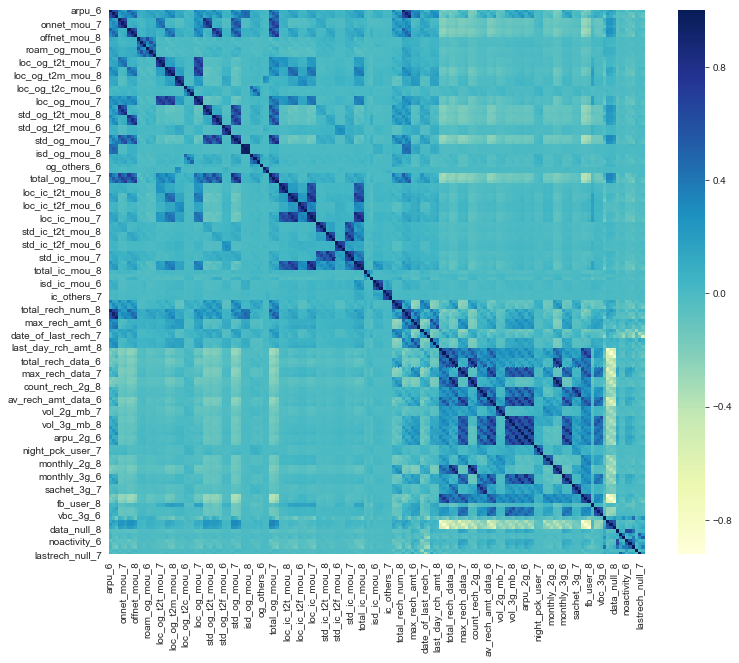

In [321]:
# heatmap of numerical columns
plt.figure(figsize = (12,10))
sns.heatmap(tel_hc.corr(), cmap = 'YlGnBu')
plt.show()

In [322]:
# identifying columns that have high correlation with churn
tel_hc.corr()['churn'][(tel_hc.corr()['churn'] > 0.1) | (tel_hc.corr()['churn'] < -0.1)].sort_values(ascending = False)

churn                       1.000000
noactivity_8                0.438540
lastdate_null_8             0.249878
lastrech_null_8             0.246919
data_null_8                 0.204996
noactivity_7                0.156608
std_og_mou_6                0.125264
data_null_7                 0.106546
t2o_null                    0.103069
lastdate_null_7             0.100848
loc_ic_mou_7               -0.100092
fb_user_7                  -0.100629
count_rech_2g_8            -0.107392
aon                        -0.108276
date_of_last_rech_data_7   -0.111267
last_day_rch_amt_8         -0.116259
total_rech_data_8          -0.119891
offnet_mou_8               -0.121517
max_rech_amt_8             -0.128479
max_rech_data_8            -0.135524
av_rech_amt_data_8         -0.137462
total_og_mou_8             -0.145441
date_of_last_rech_7        -0.147884
total_rech_num_8           -0.151901
loc_og_t2m_mou_8           -0.152473
loc_og_mou_8               -0.152593
arpu_8                     -0.160911
l

**Inferences from EDA:**
1. `No calling activity in action phase` is highly positively correlated with the churn
2. Other columns that are highly correlated with the churn are - `lastdate_null_8 (users with nulls in the action month)`, `last_rech_null_8(users with null values in last_rech_date column)`, `no data and calling activity in  6 and 7 months` etc.
3. Also, the users who has high activity and high recharges amount are not likely to churn
4. Also, `date of last_rech_8` is also negatively correlated with the churn which means the users who recharges in the last date of month 8 (action phase) is not likely to churn compared to other customers
5. Also, `aon` column is negatively correlated with the churn which means the users which are quite old are likely to churn compared to new users

In [323]:
# defining functions for num_plot and cat_plot which would be used for plotting
def num_plot(col):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
    sns.boxplot(x = 'churn', y = col, data = tel_hc, ax = ax1)
    sns.distplot(tel_hc[col], ax = ax2)
    plt.show()
    
def cat_plot(col):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
    sns.catplot(x= col, y= 'churn', data=tel_hc, saturation=.5, kind="bar", ci=None, aspect=.6, ax = ax1)
    sns.countplot(tel_hc[col], ax = ax2)
    plt.close(2)
    plt.show()
    
# cols with min value counts less than 10 which would be used for EDA 
cols_catplot = [col for col in tel_hc.columns if tel_hc[col].nunique() < 10]
cols_catplot.remove('churn')

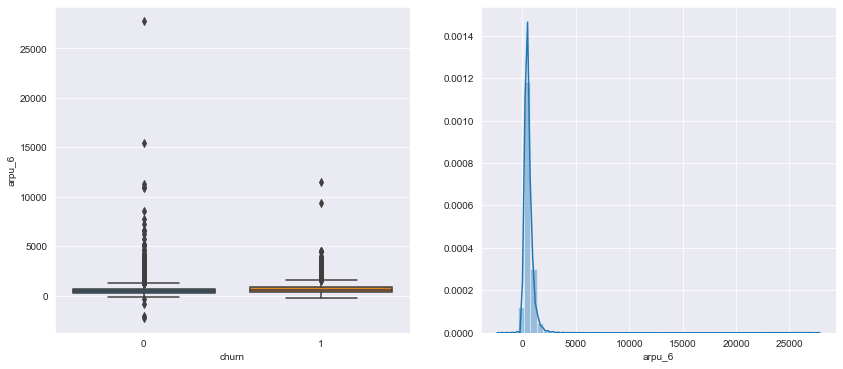

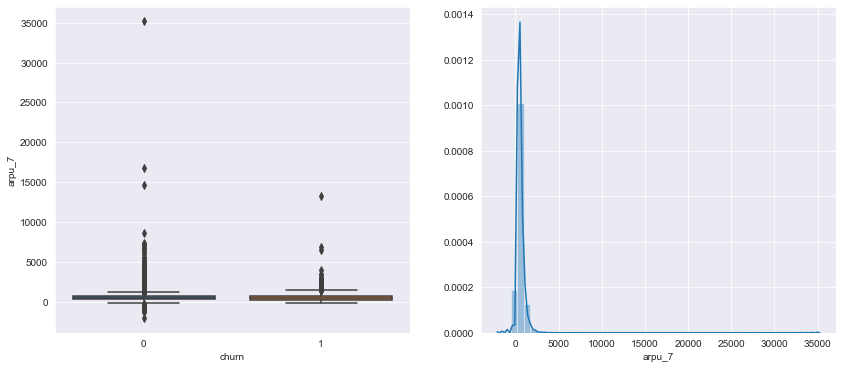

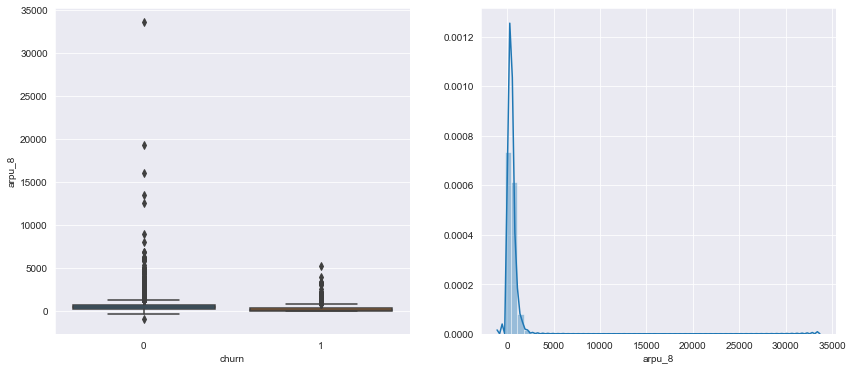

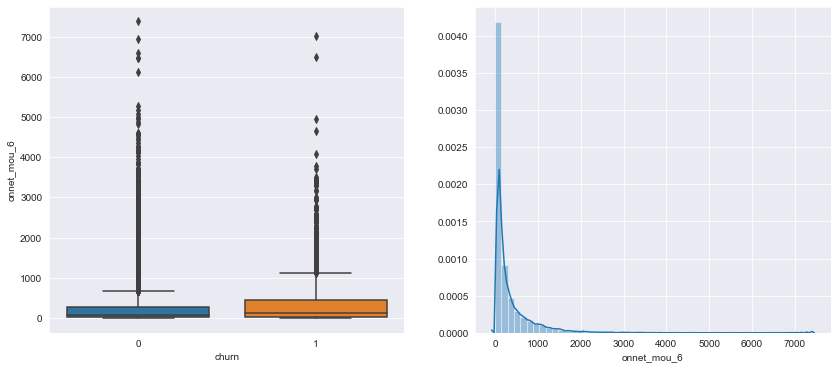

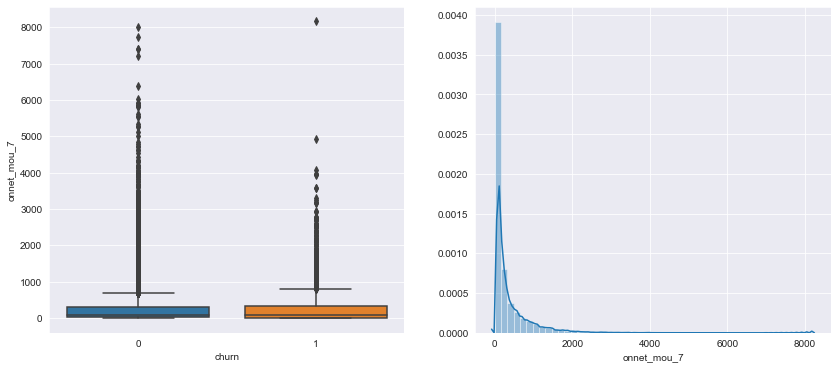

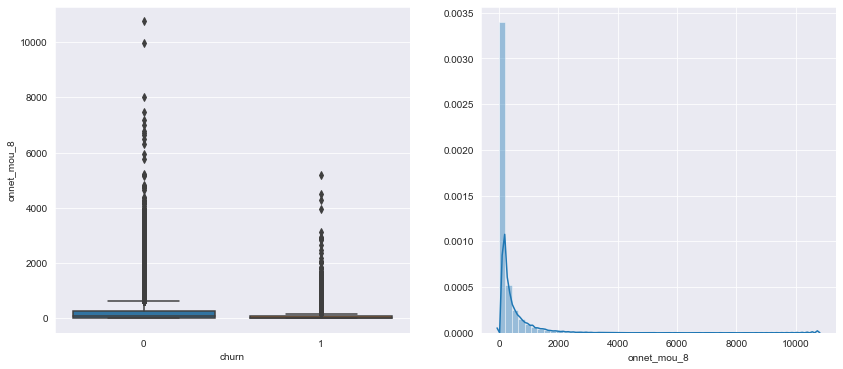

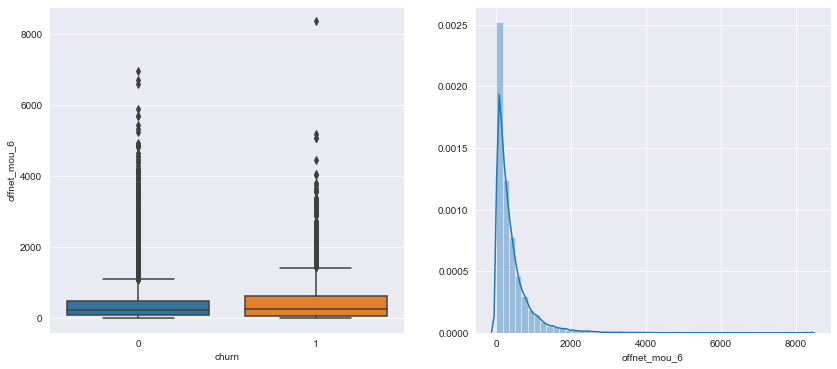

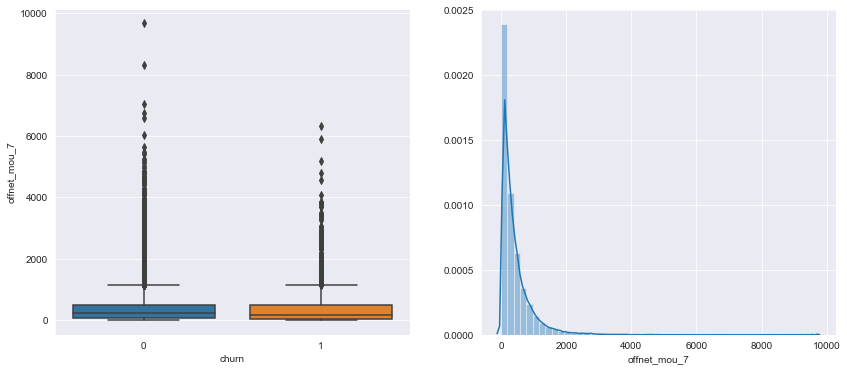

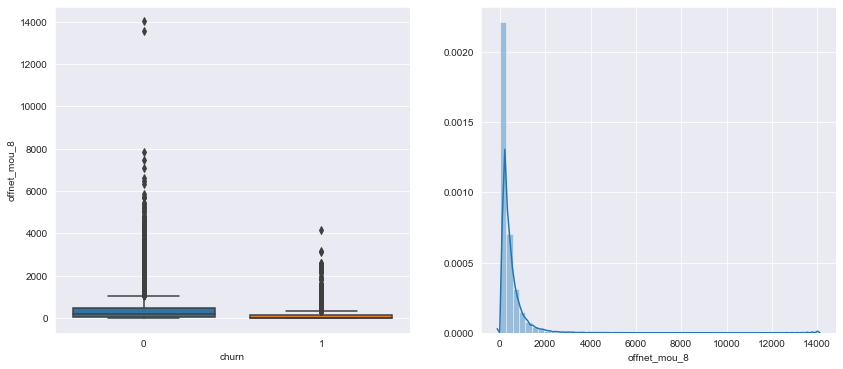

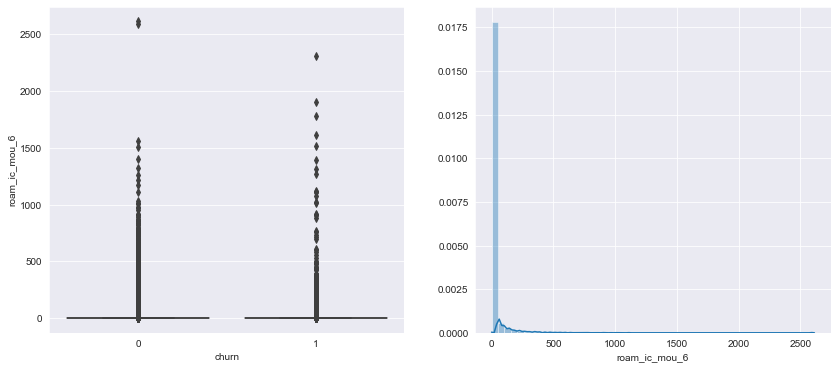

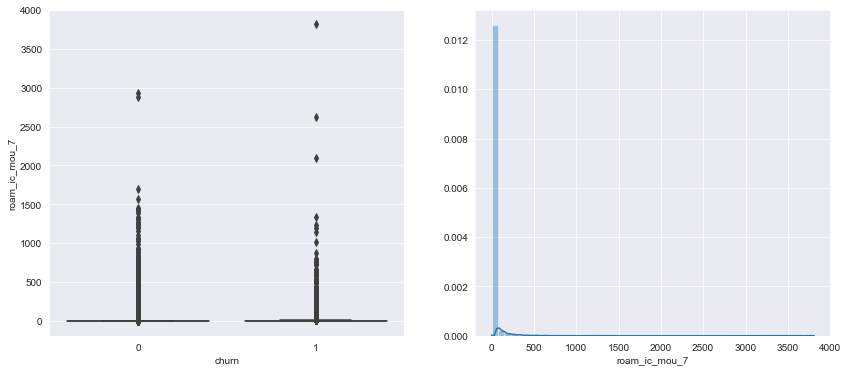

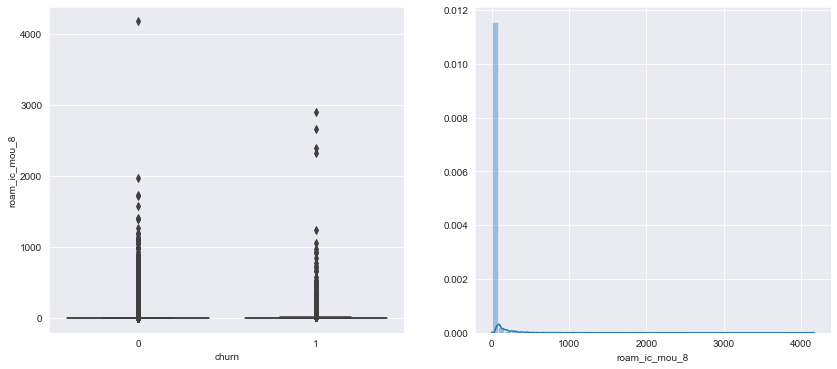

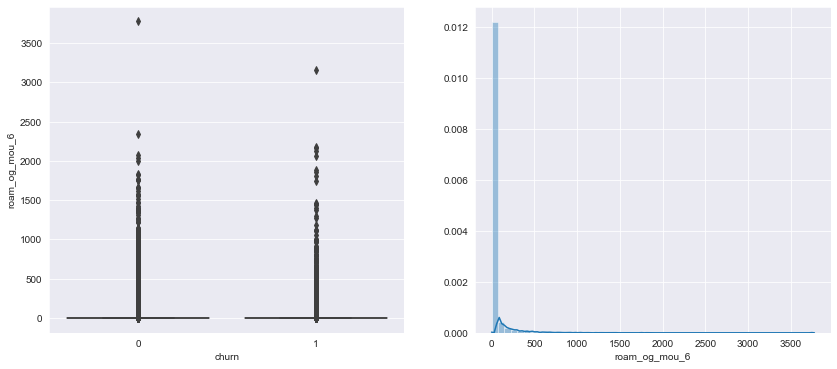

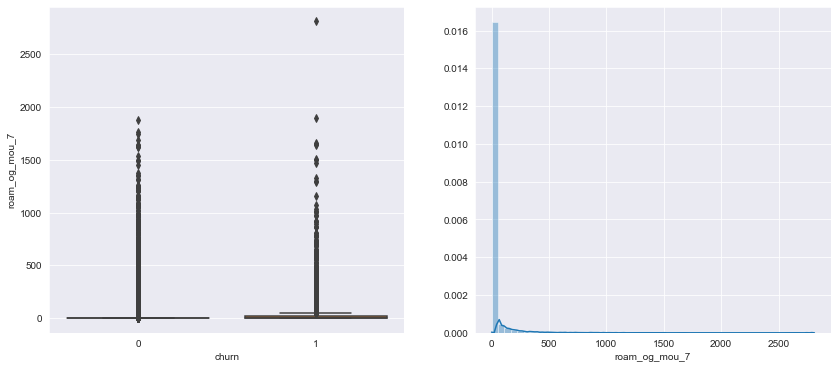

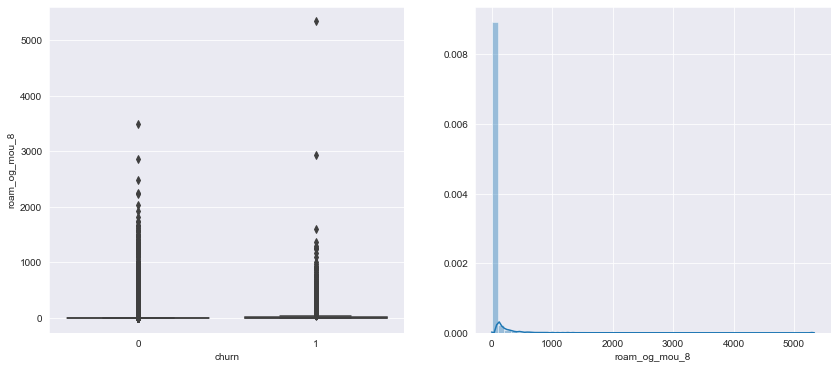

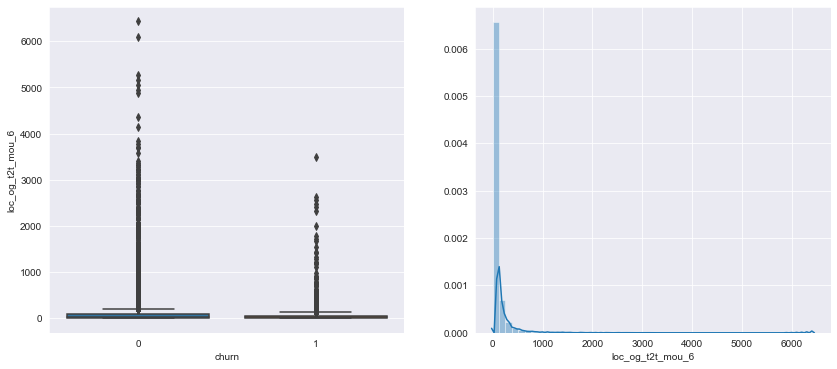

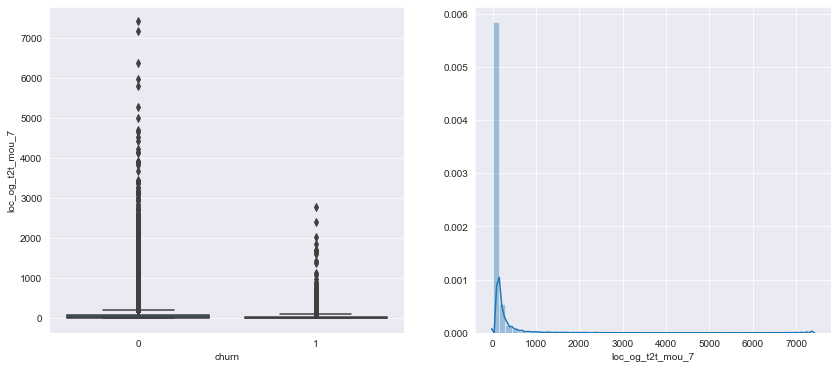

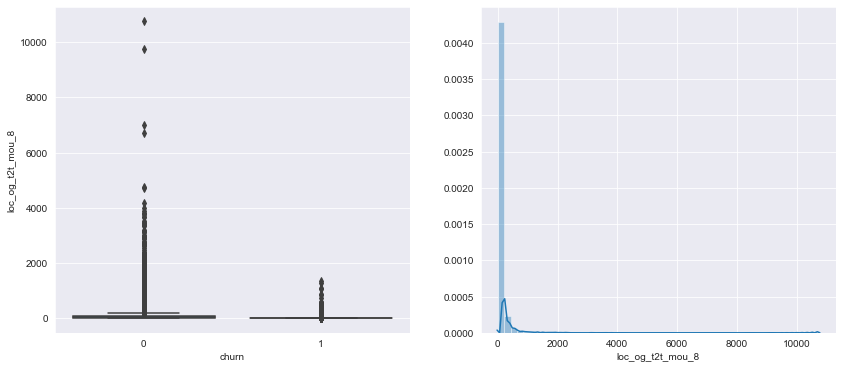

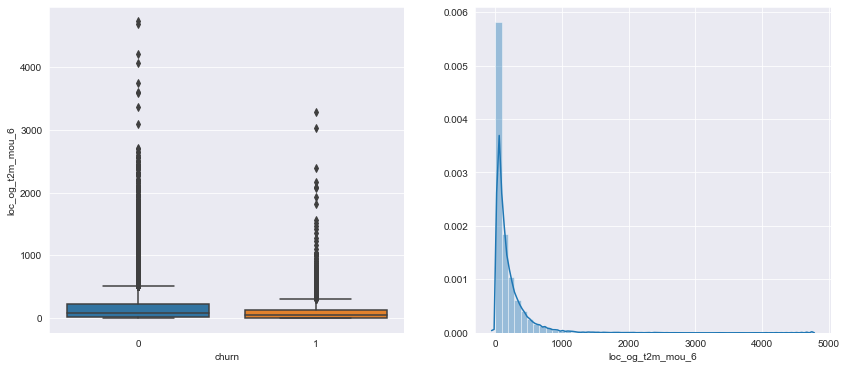

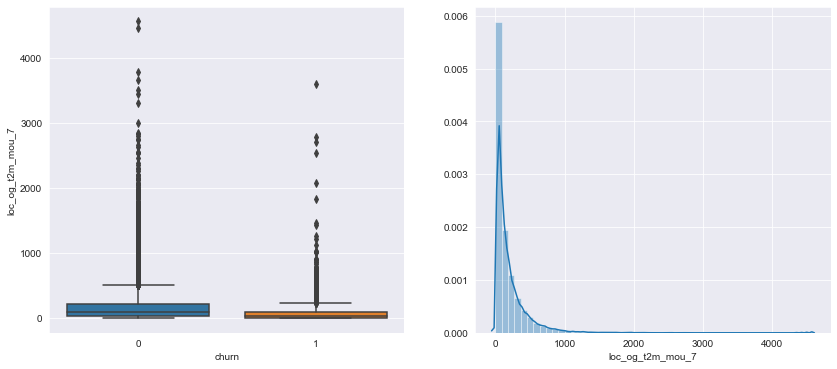

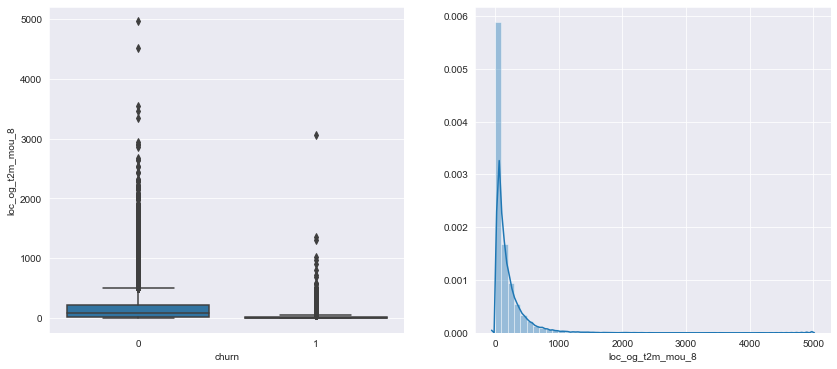

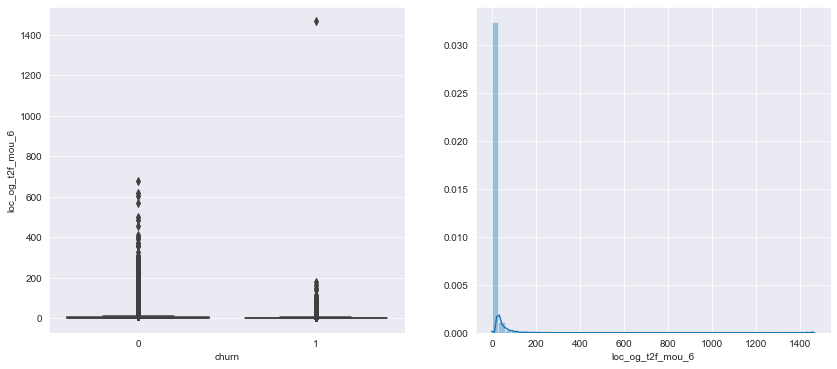

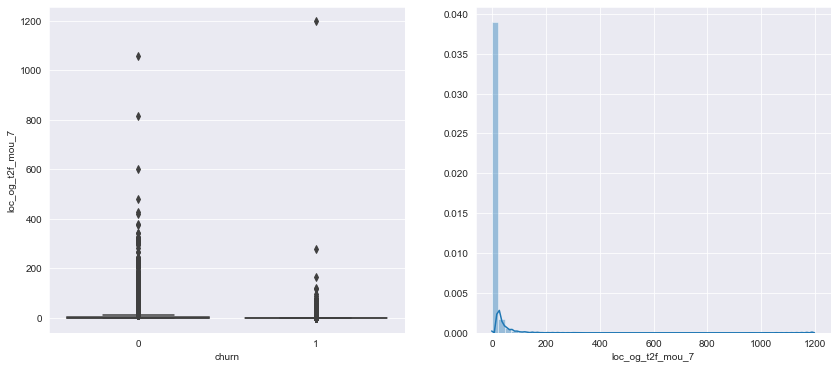

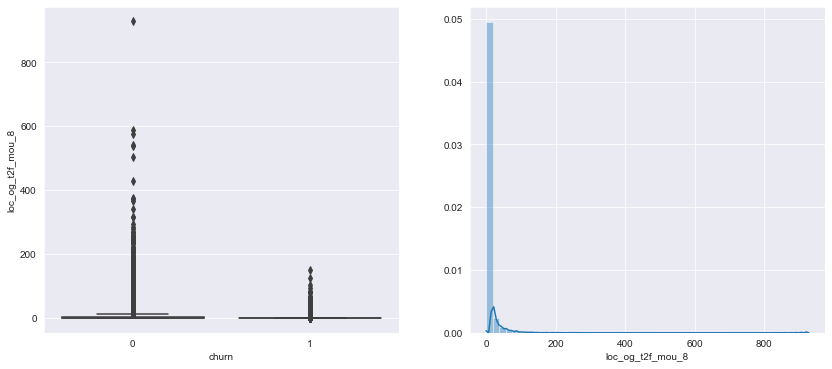

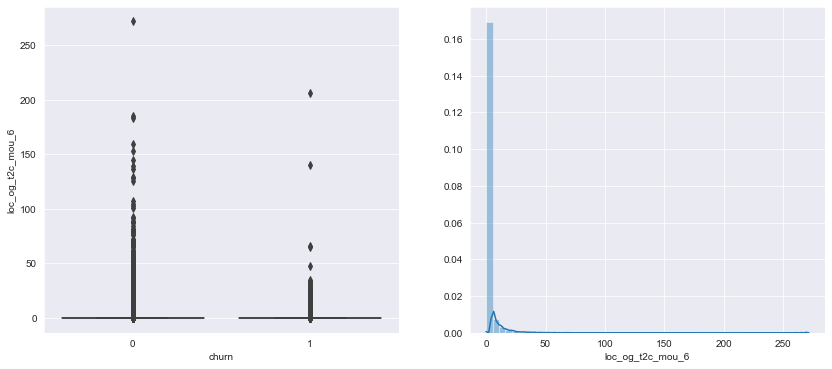

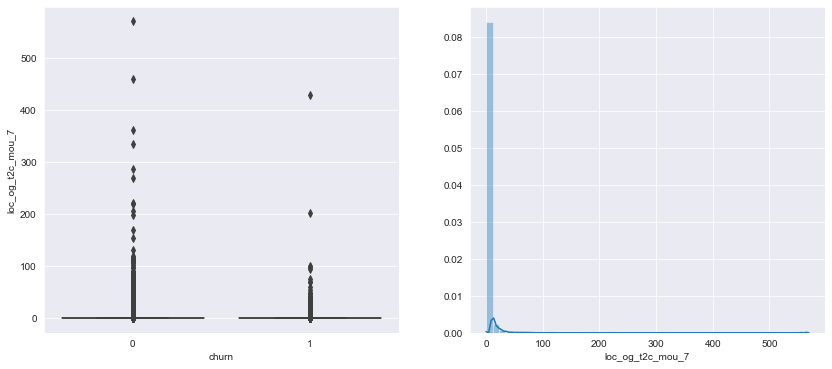

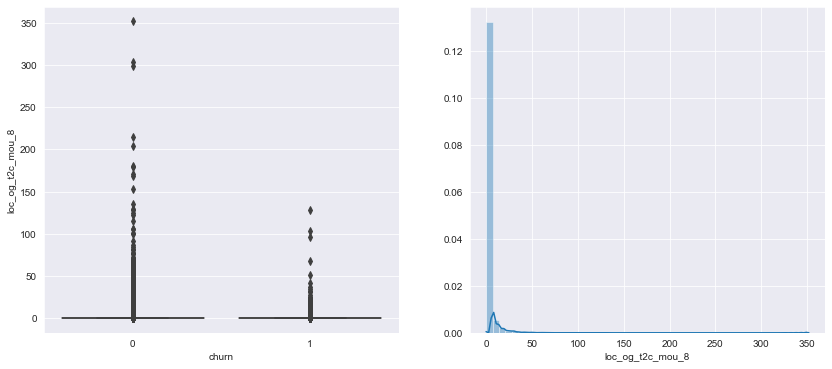

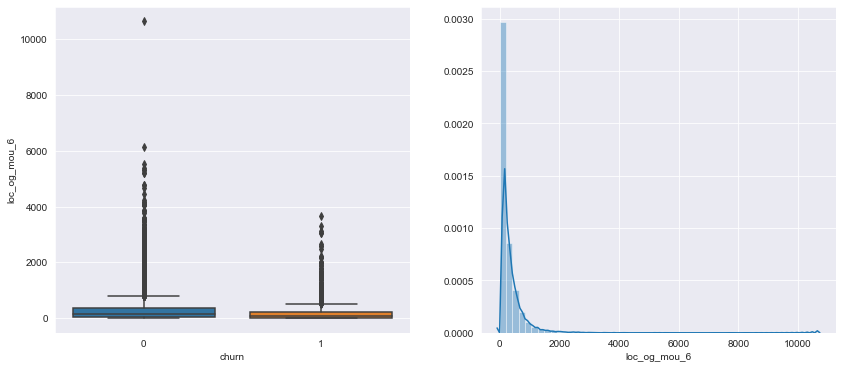

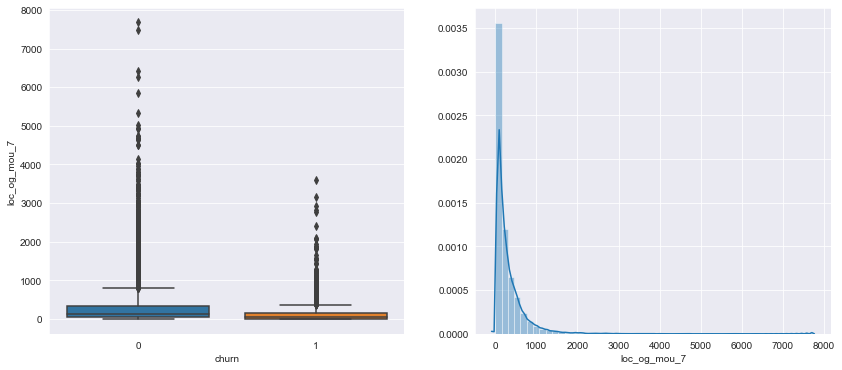

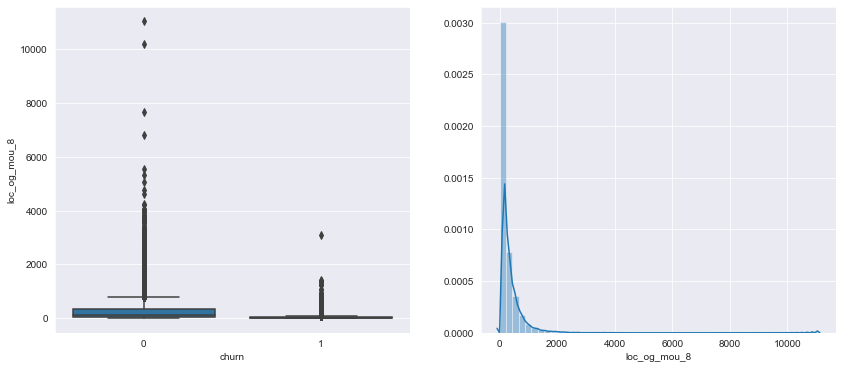

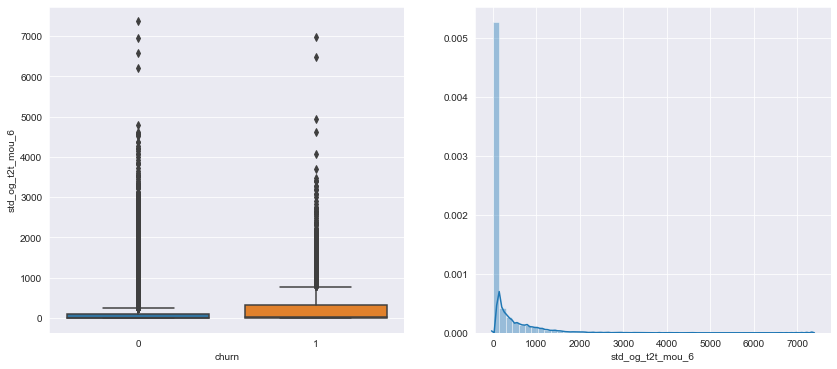

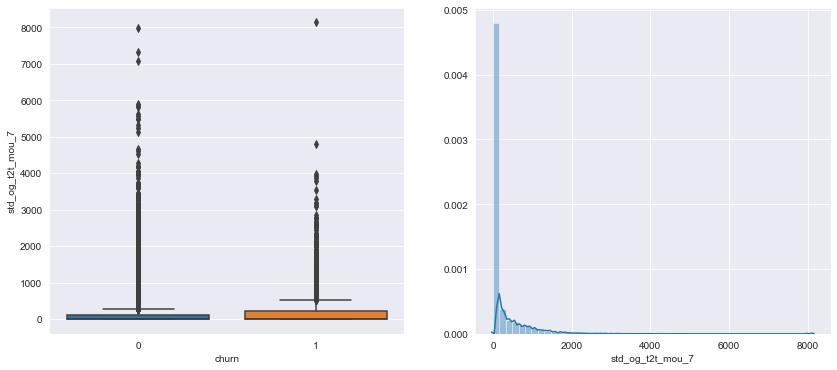

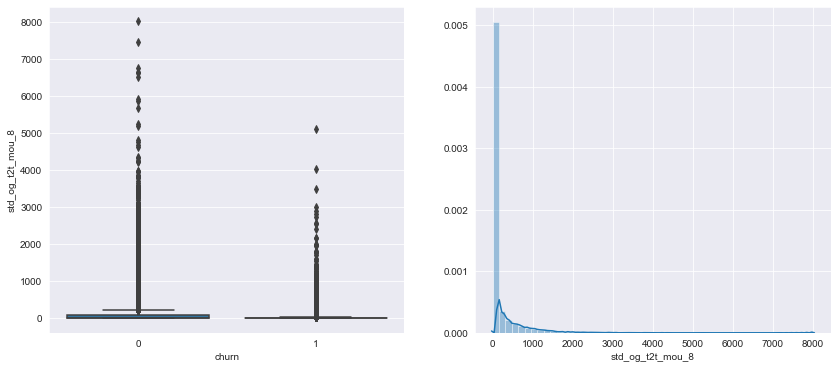

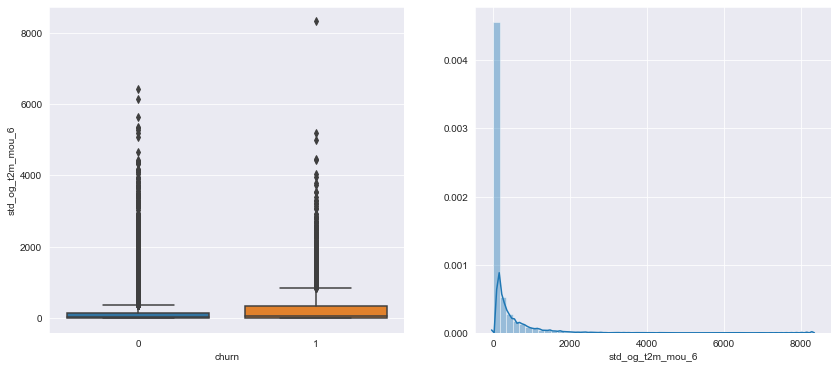

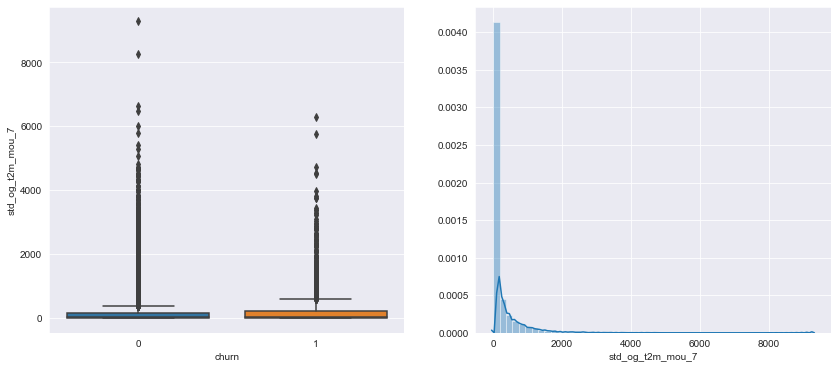

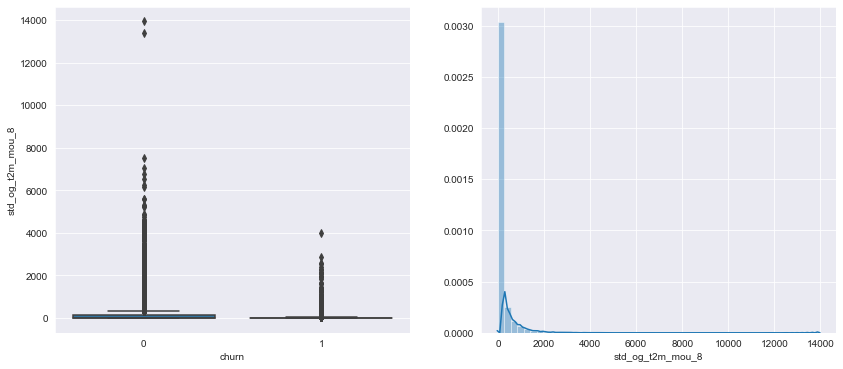

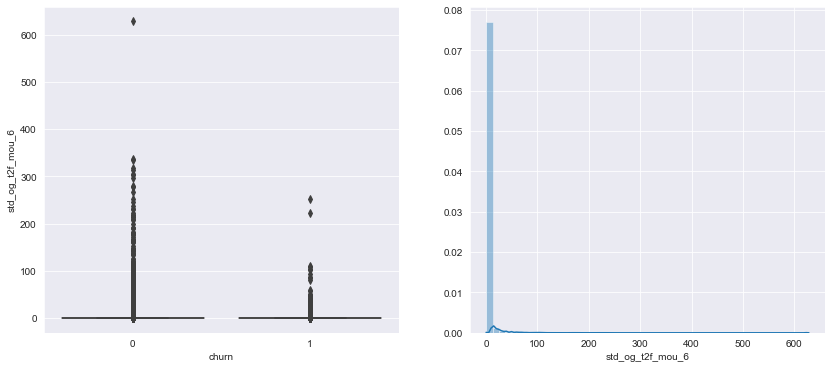

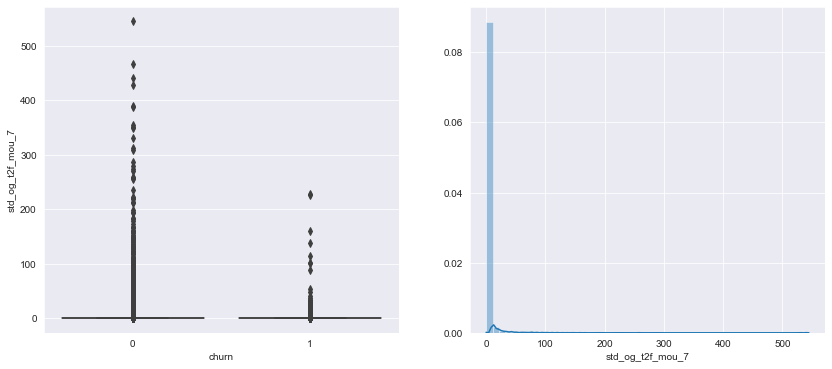

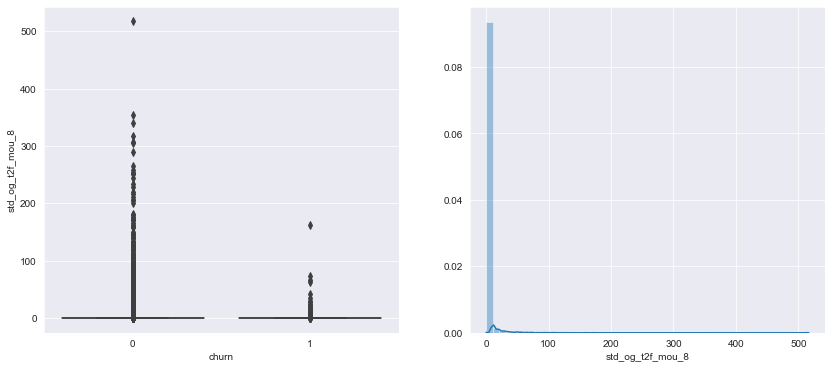

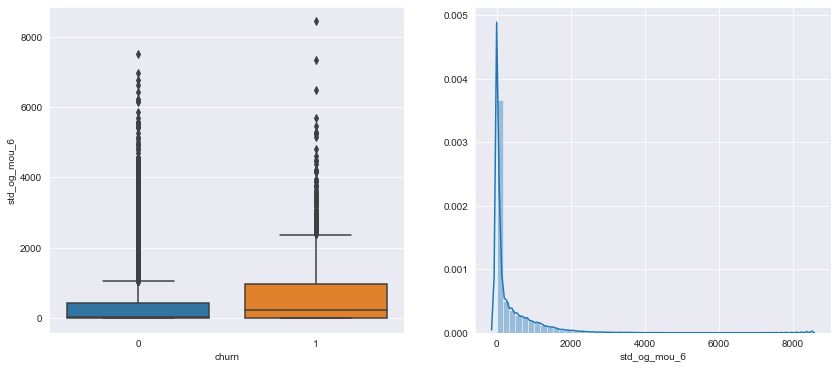

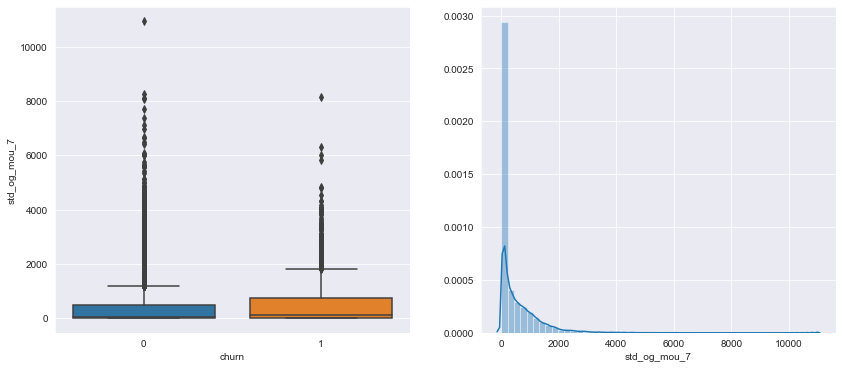

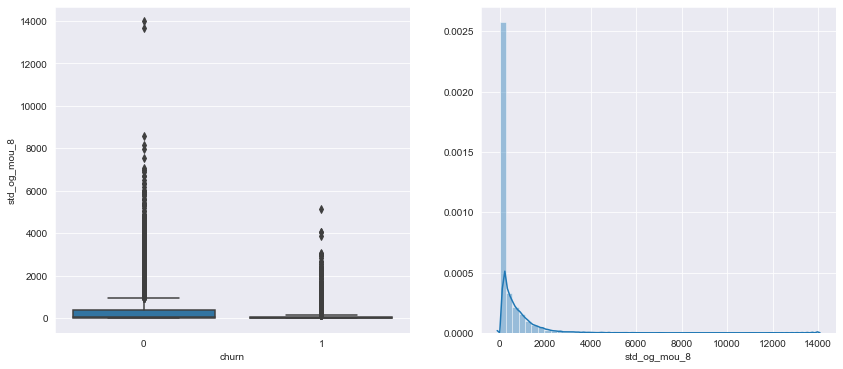

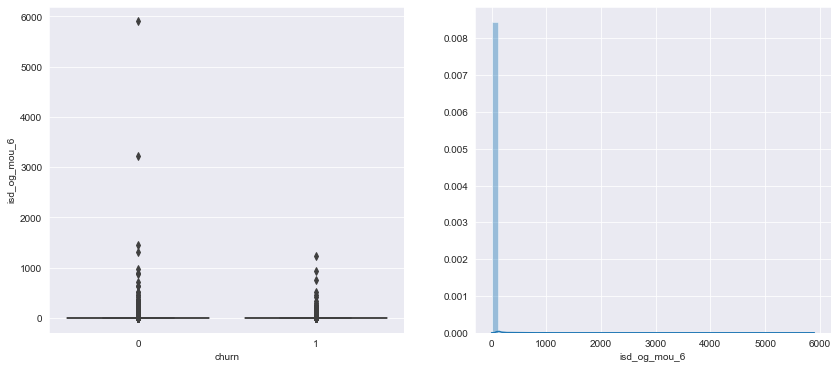

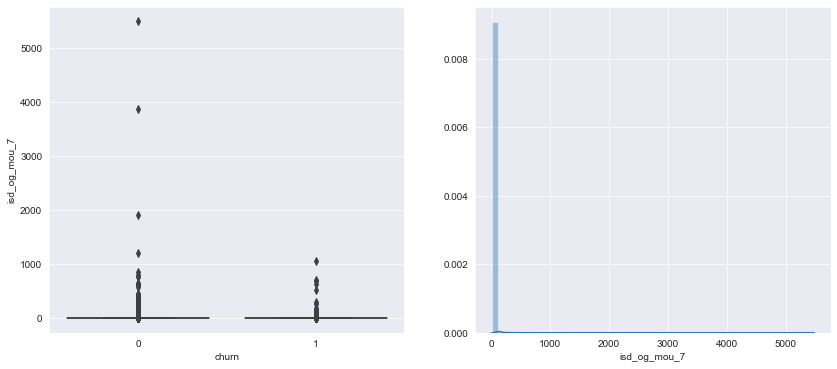

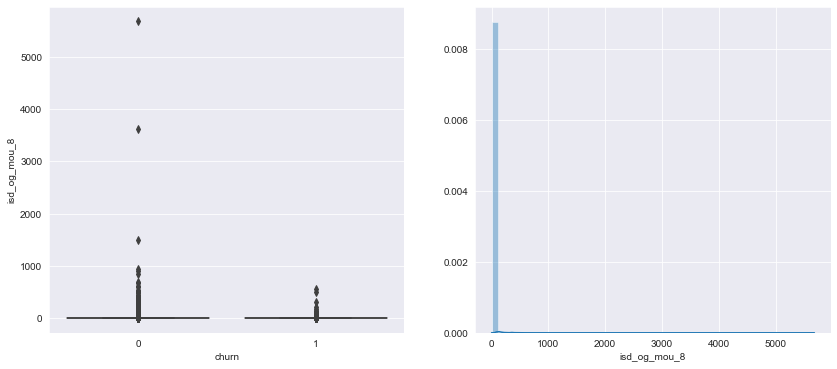

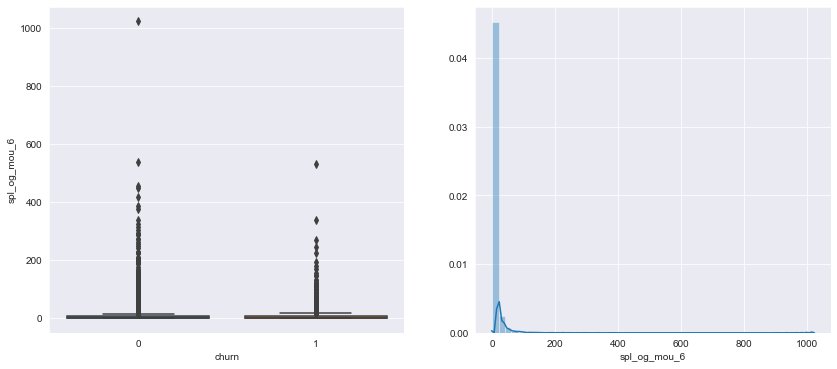

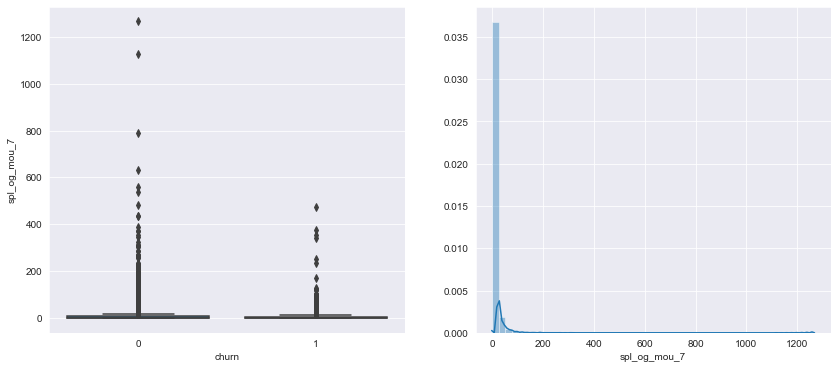

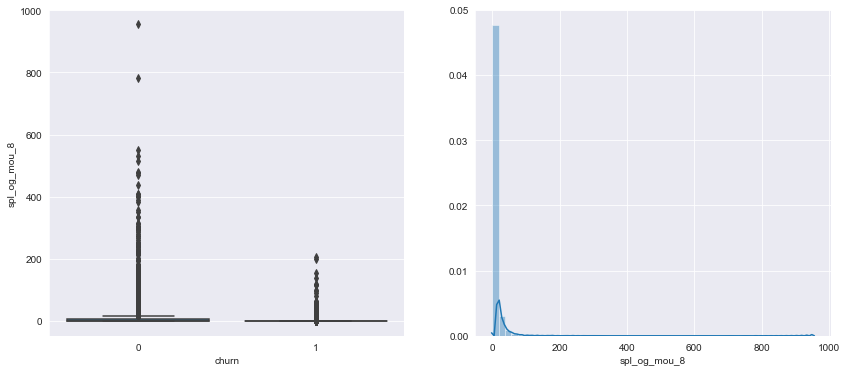

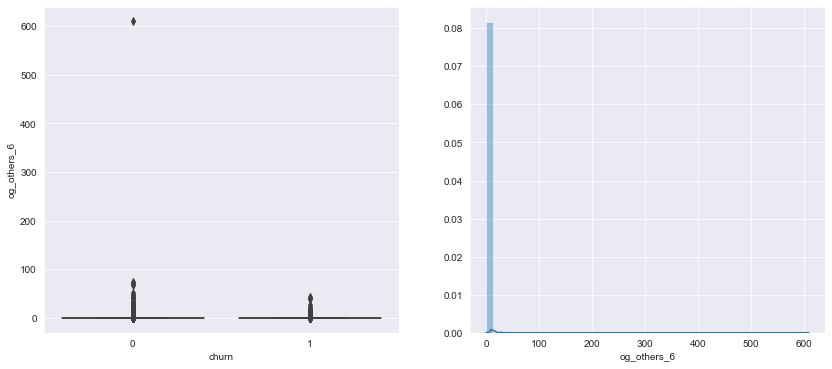

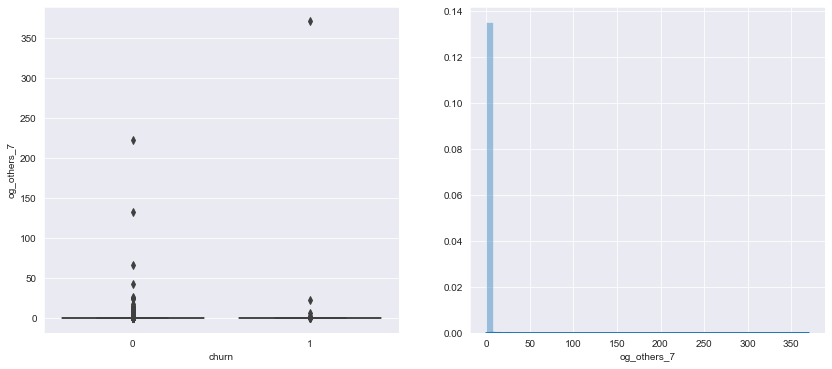

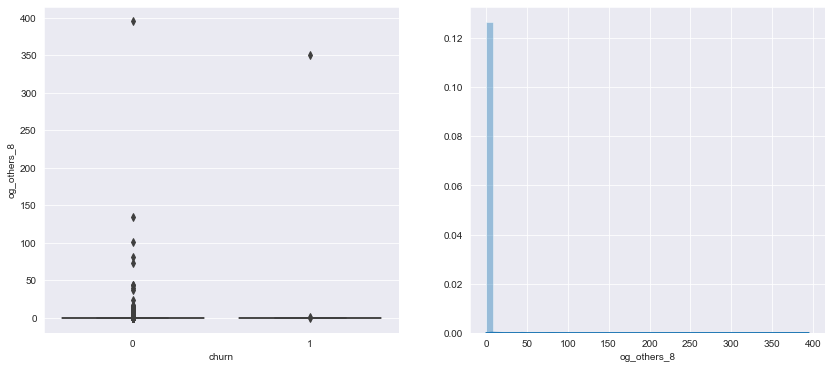

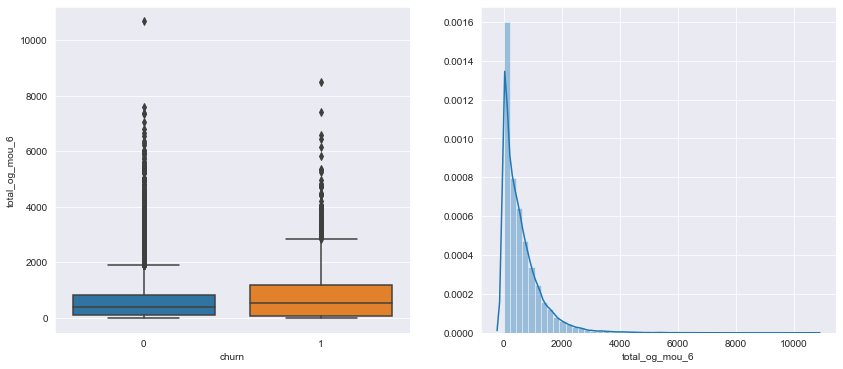

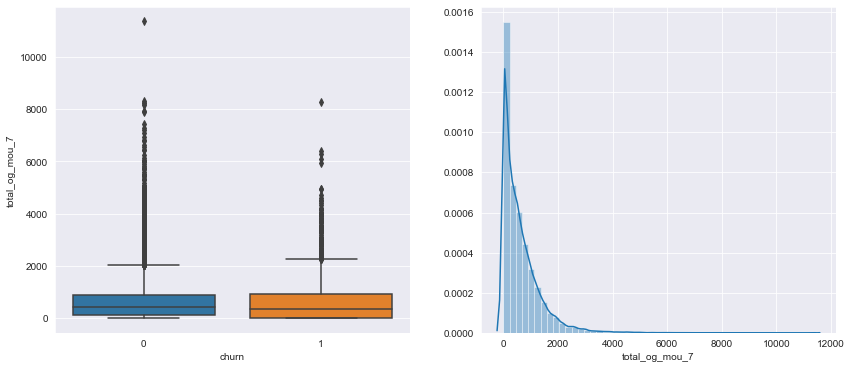

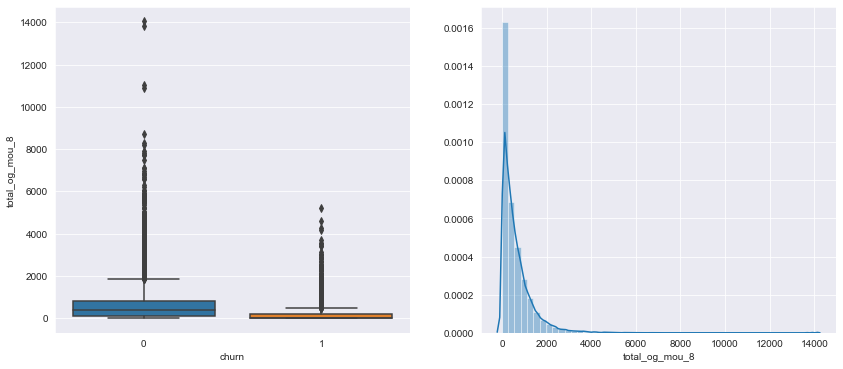

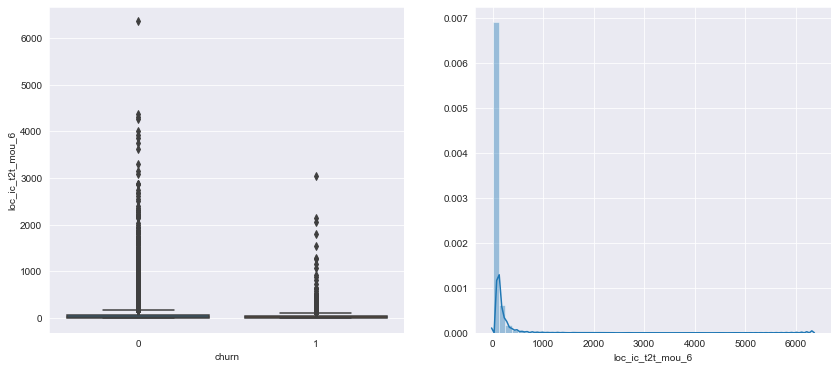

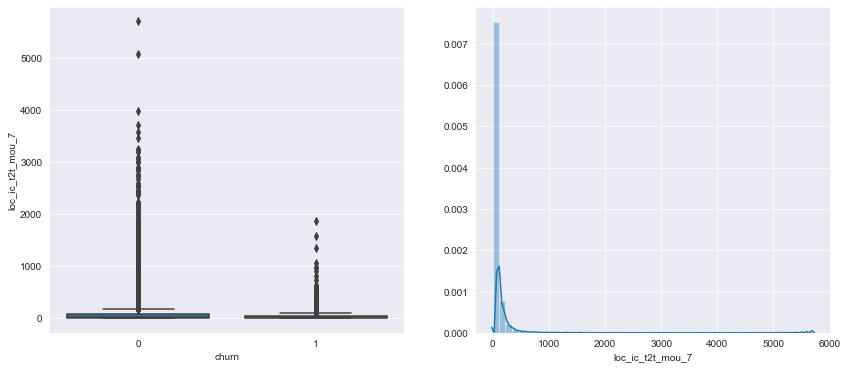

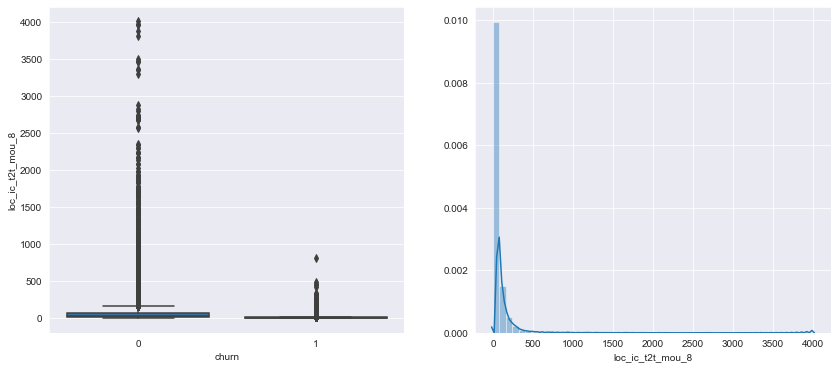

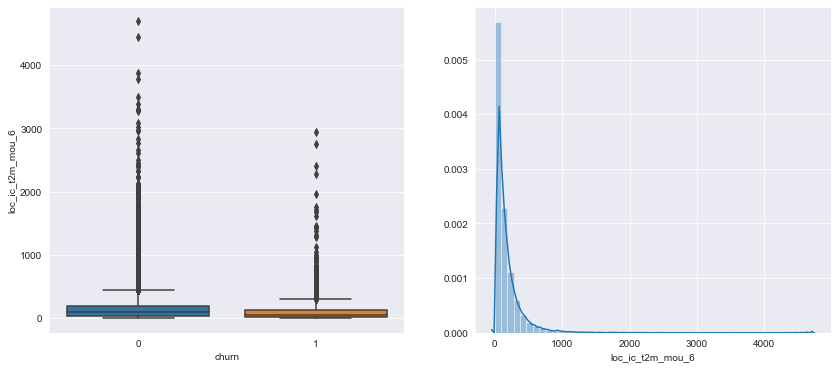

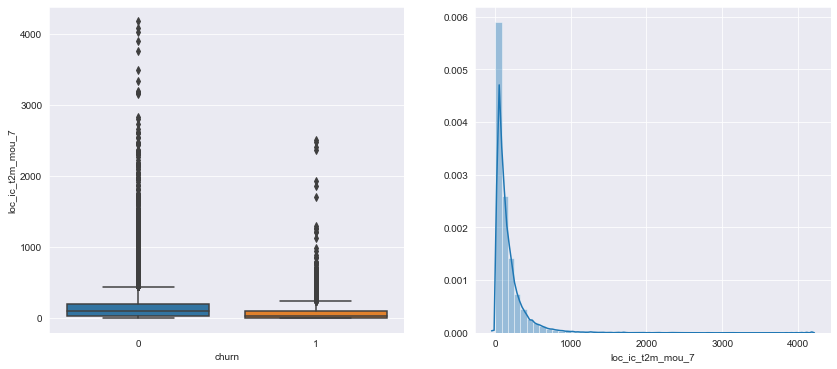

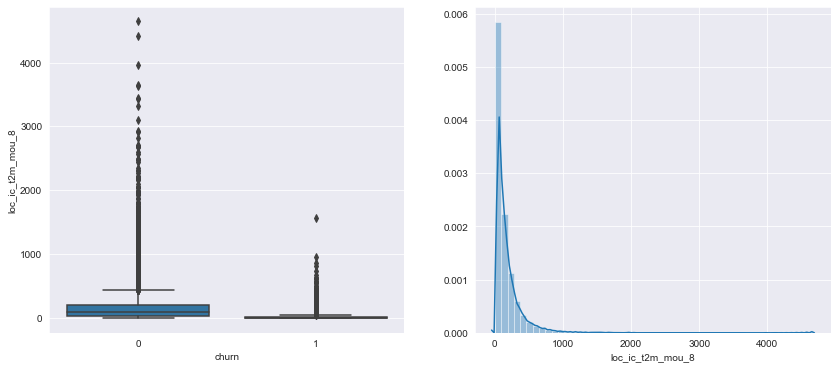

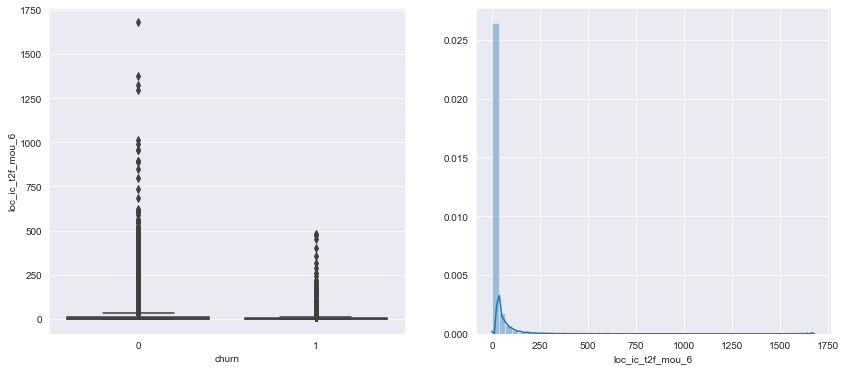

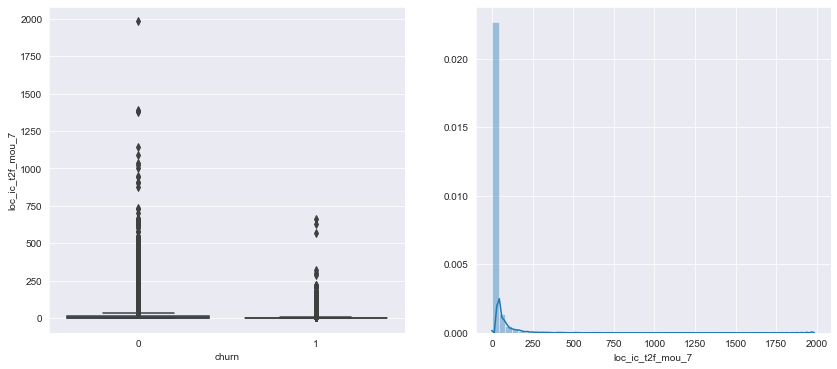

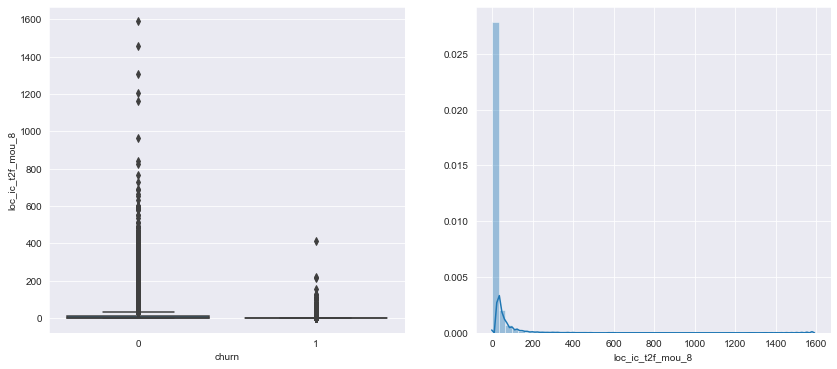

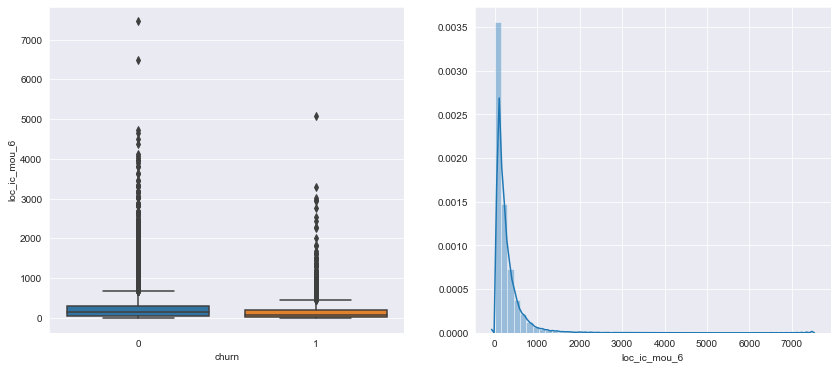

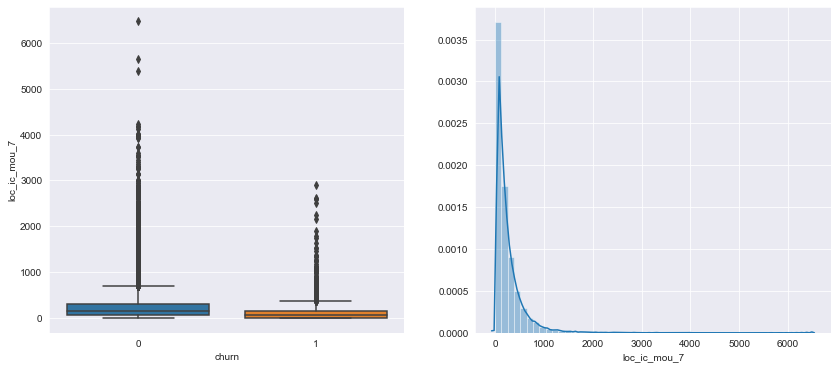

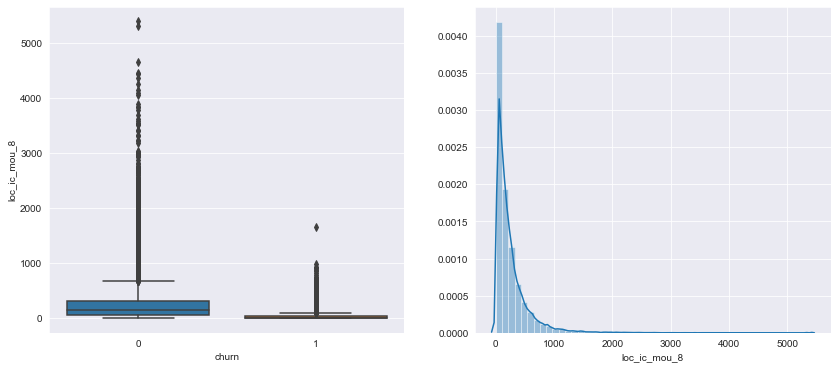

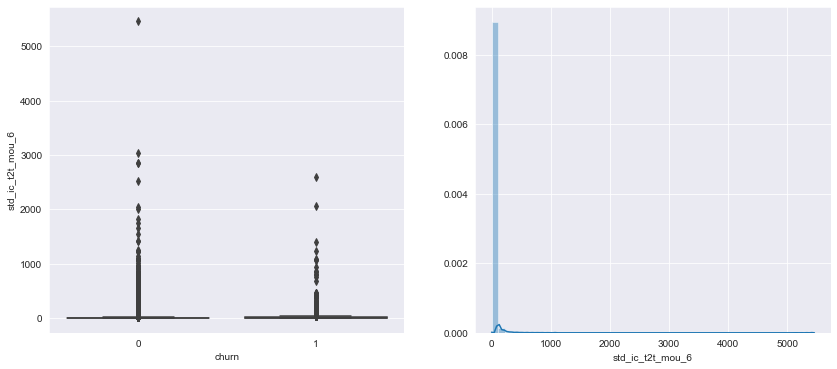

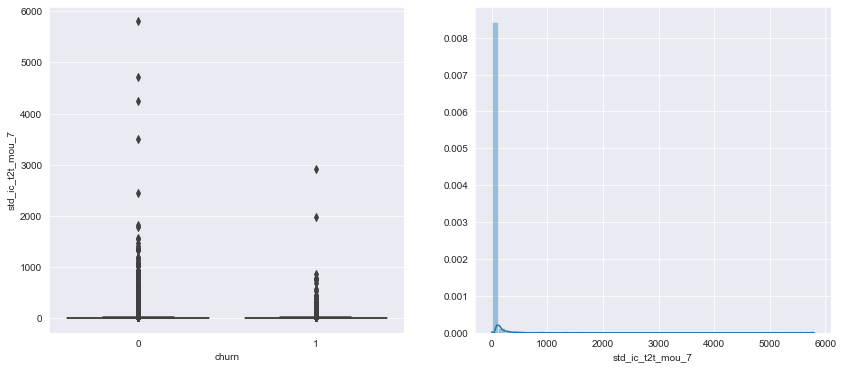

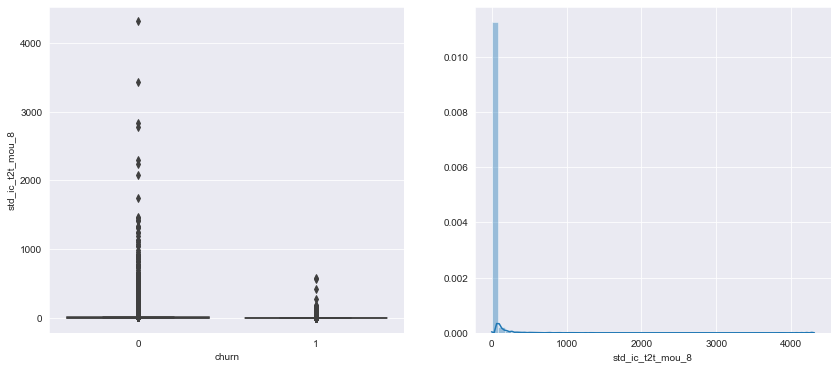

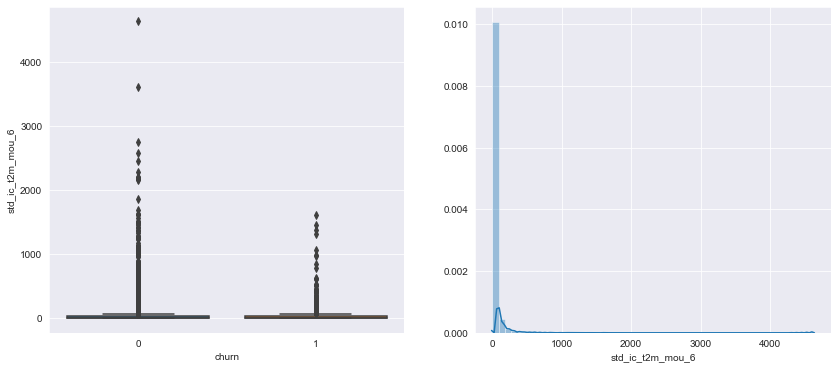

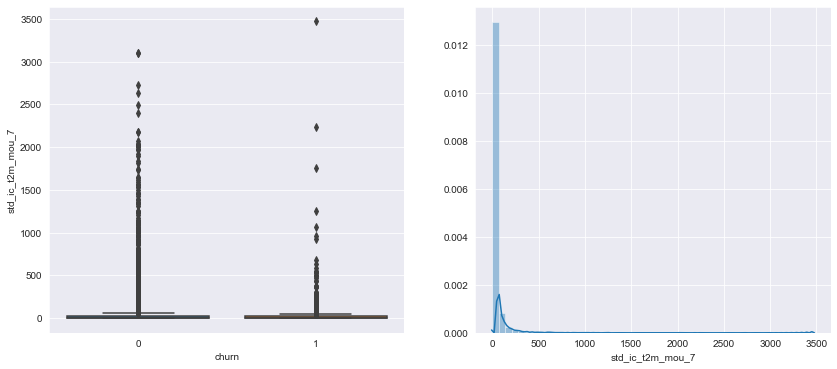

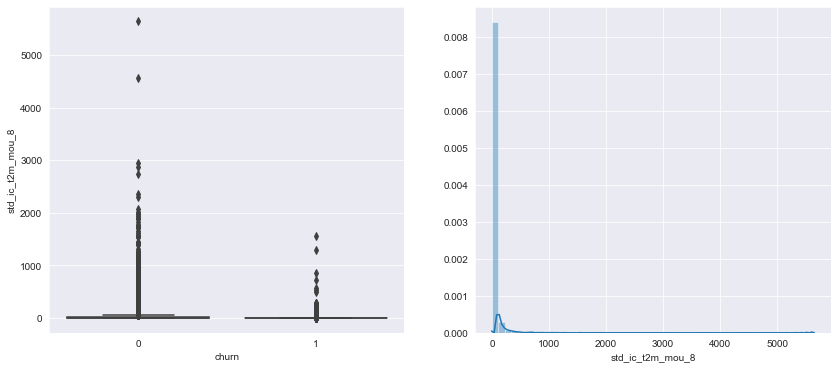

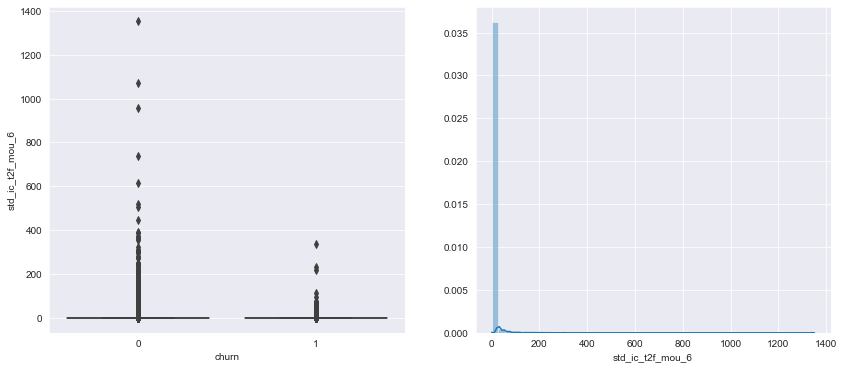

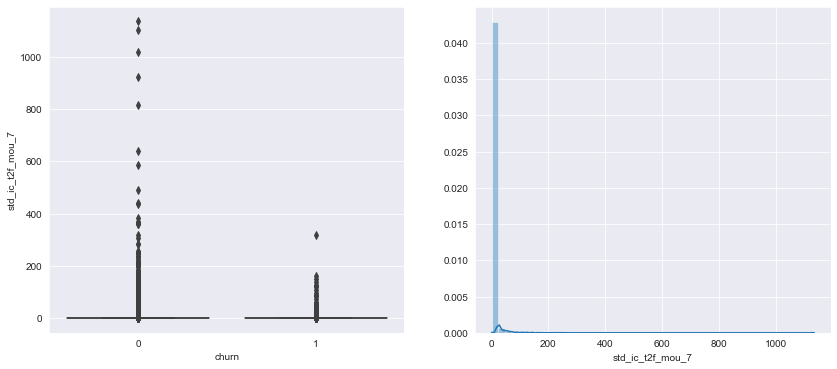

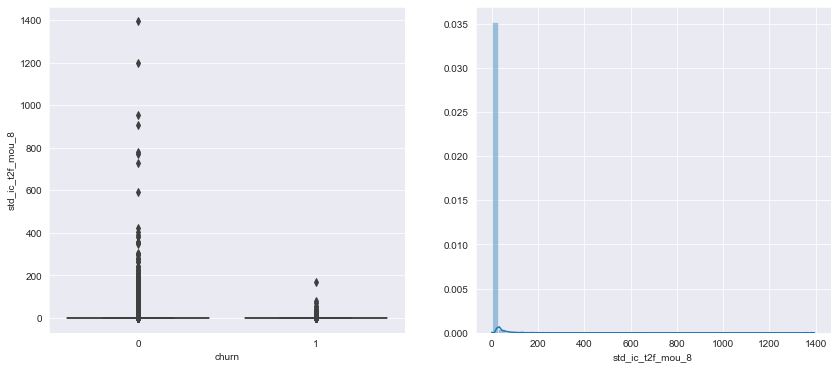

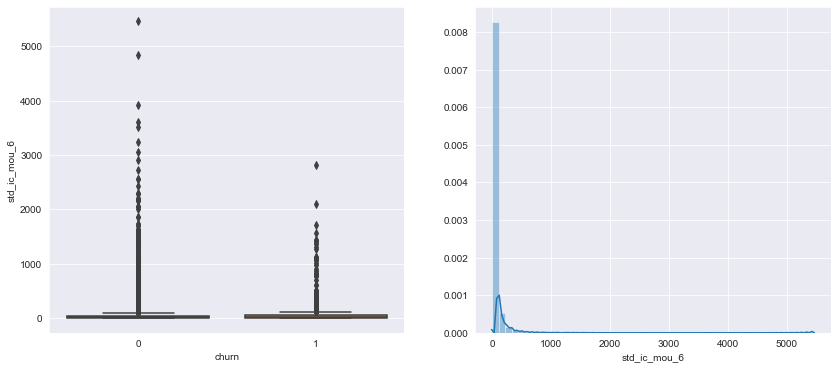

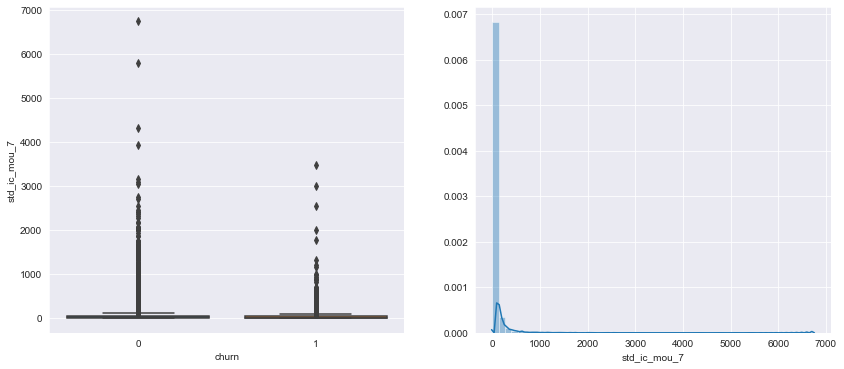

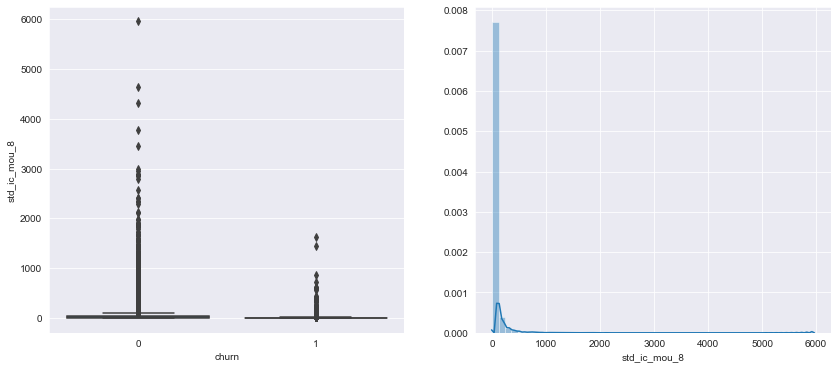

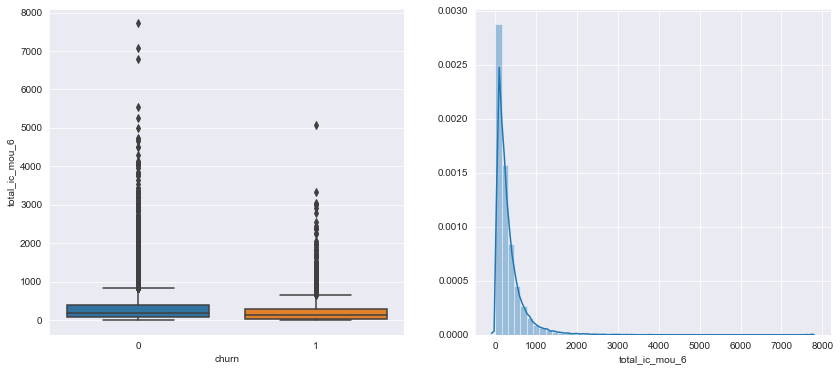

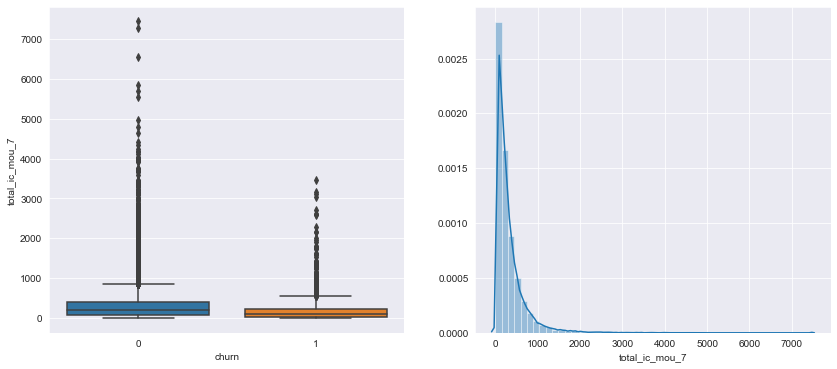

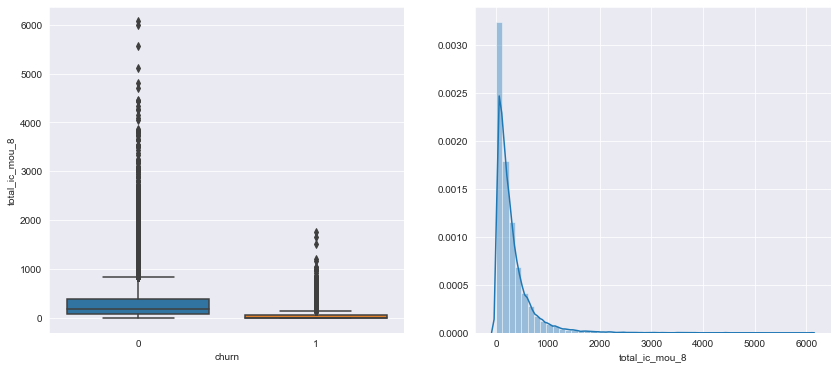

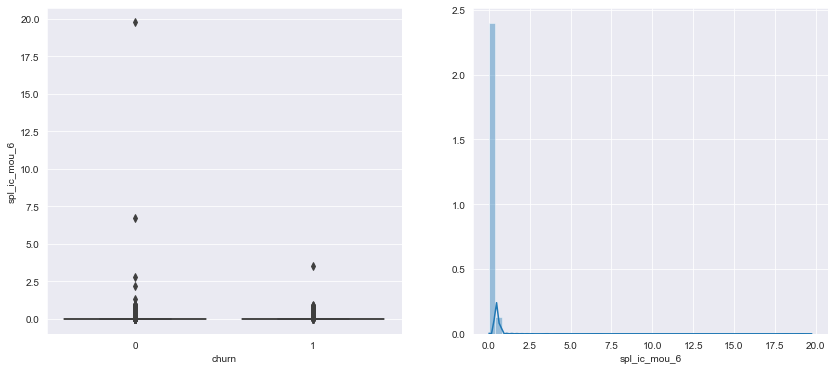

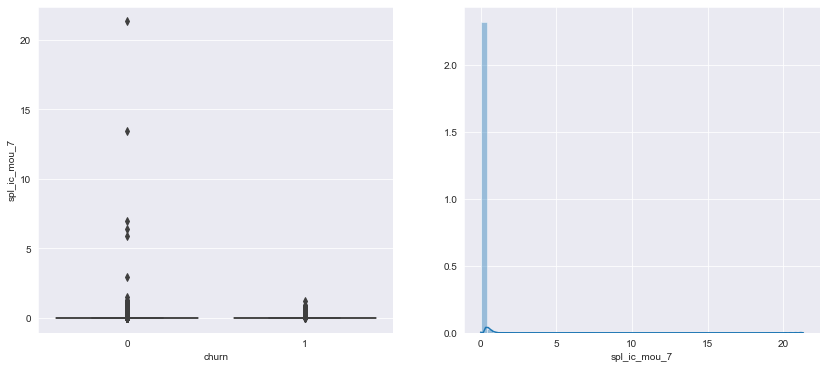

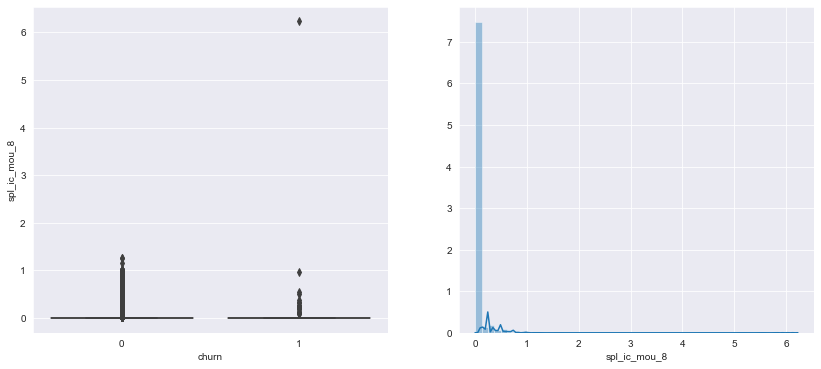

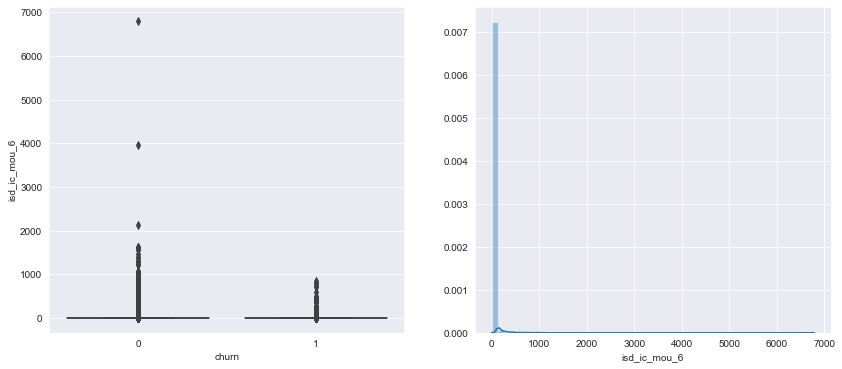

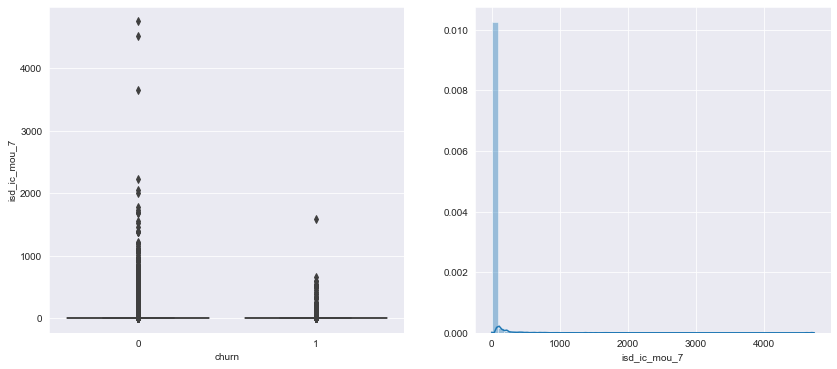

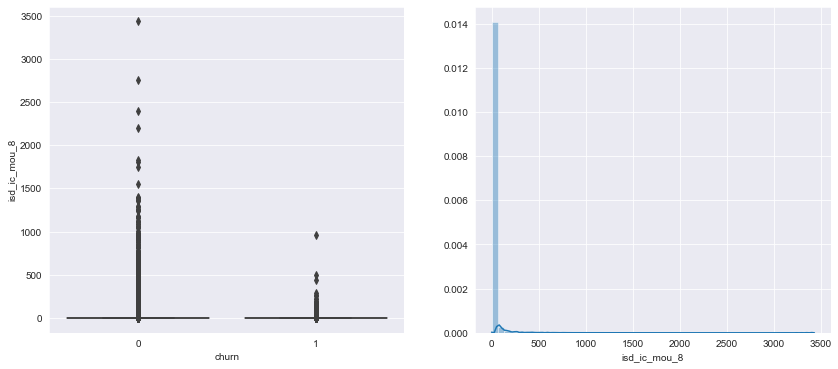

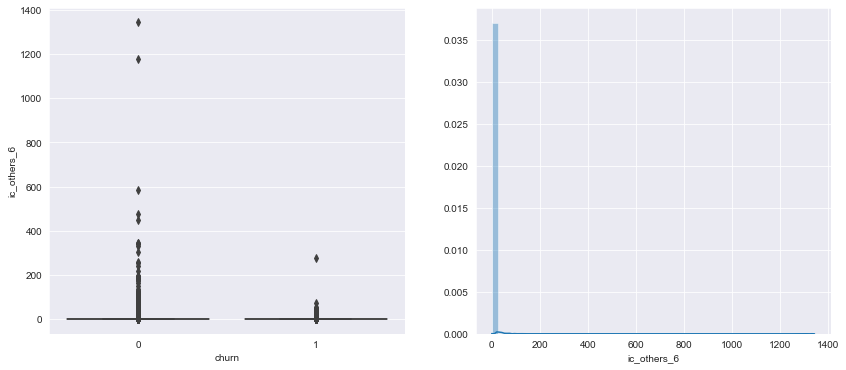

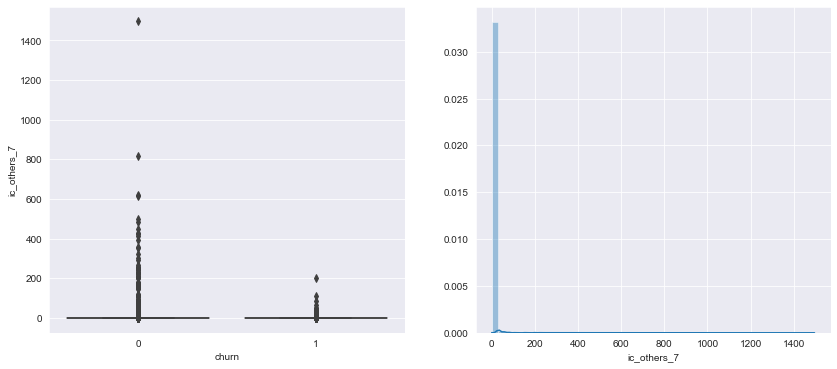

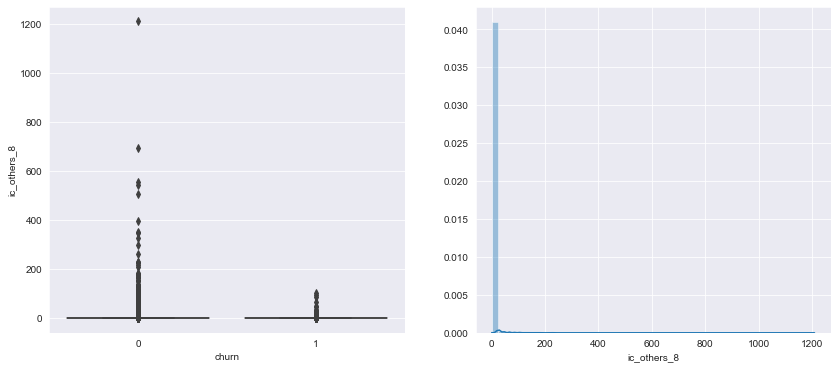

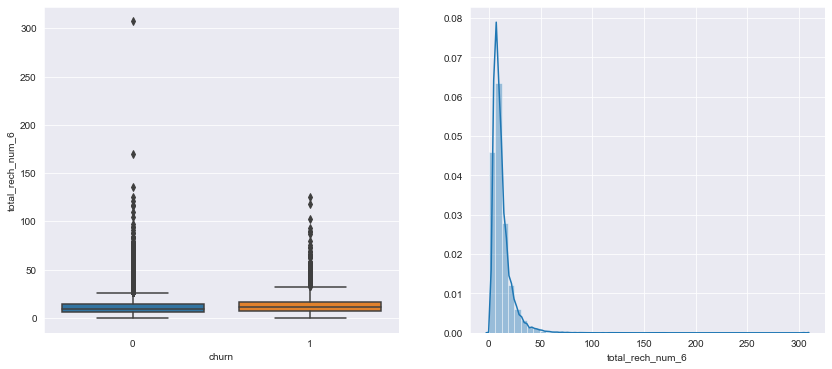

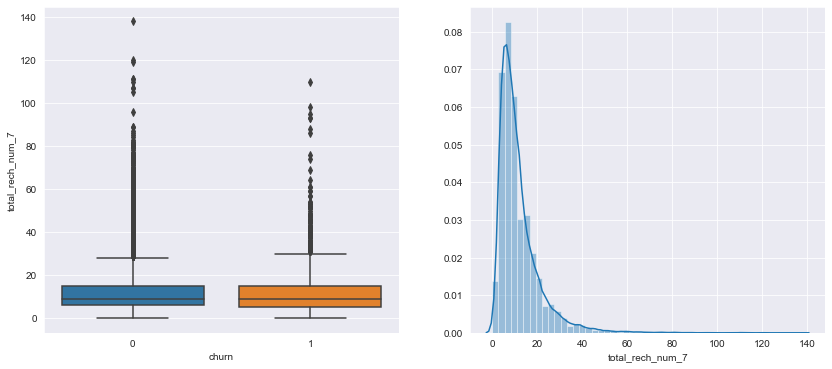

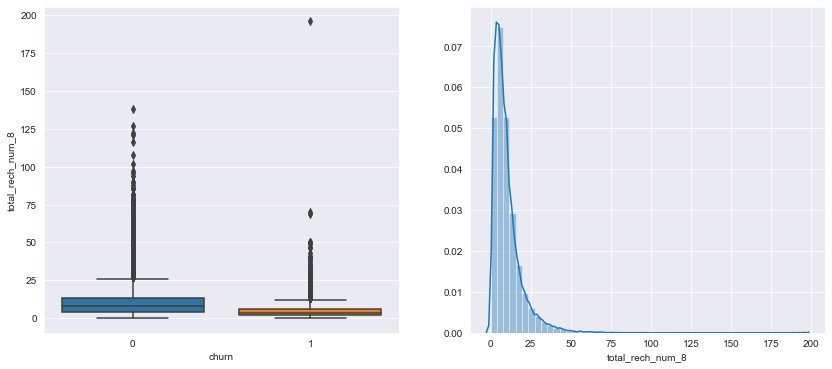

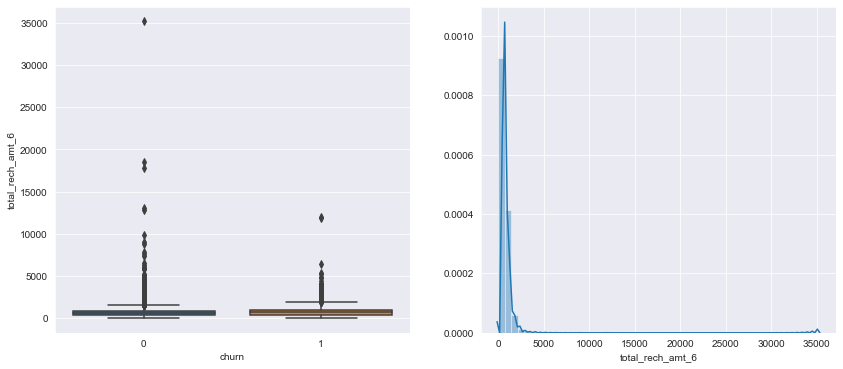

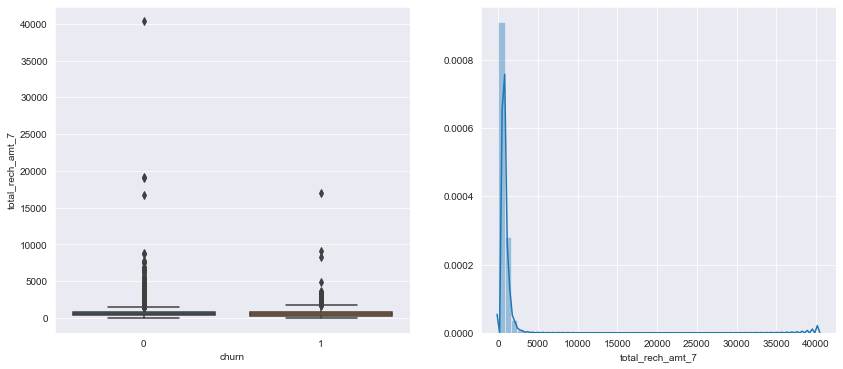

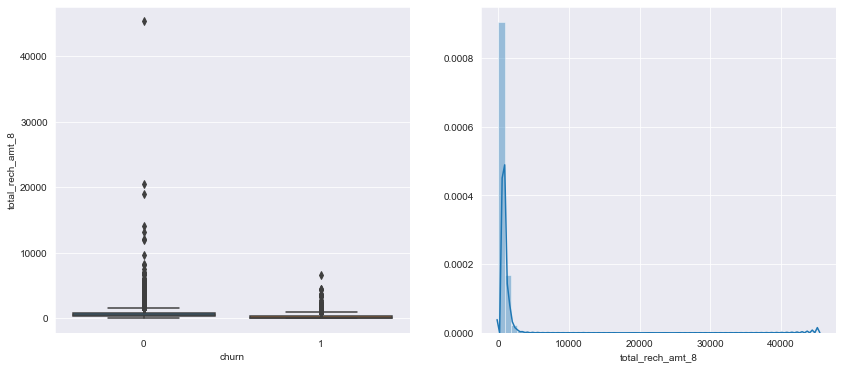

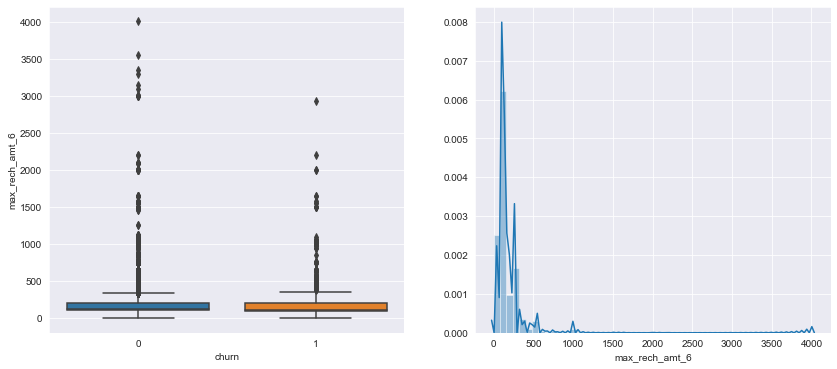

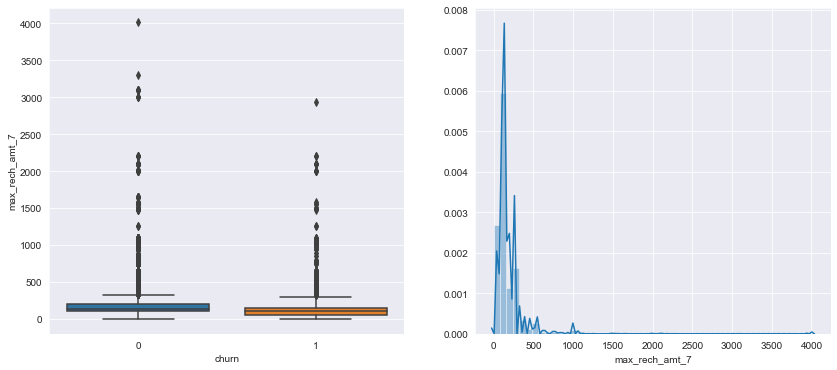

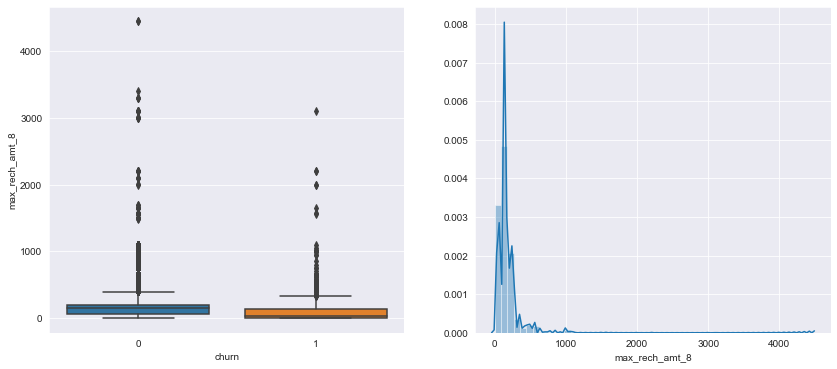

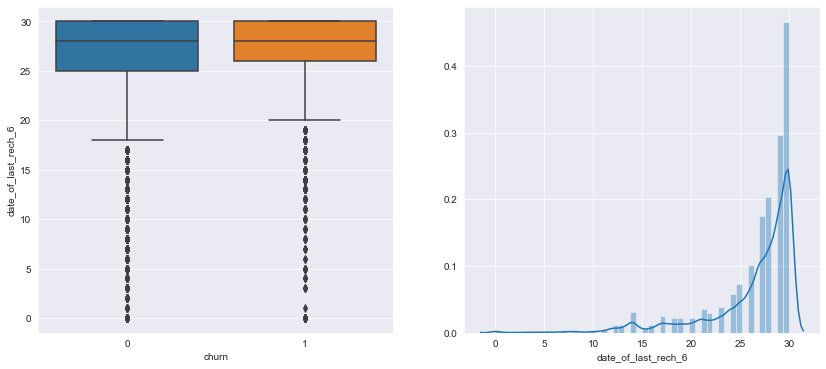

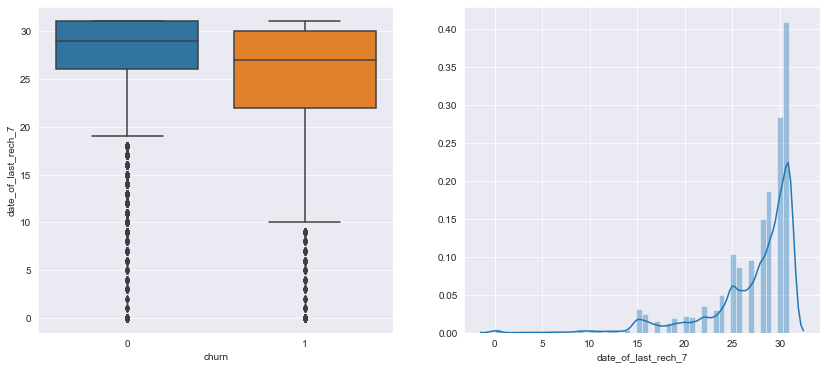

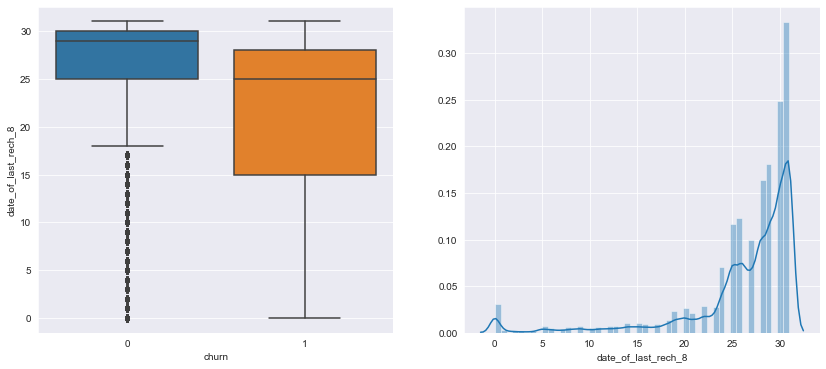

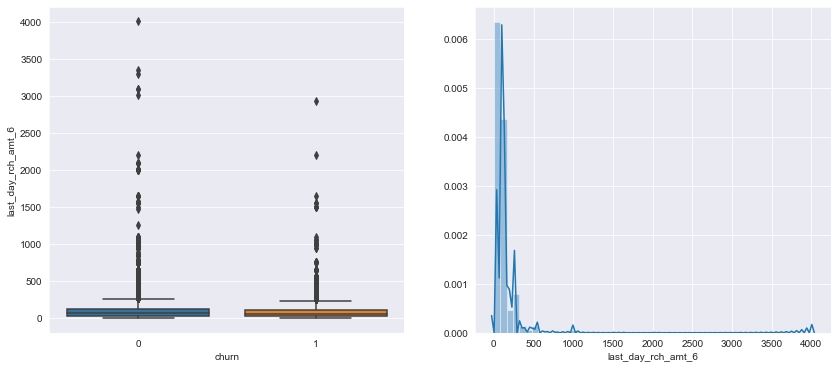

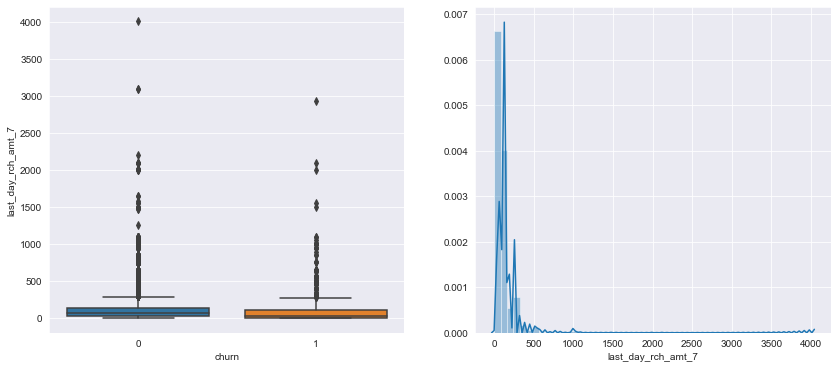

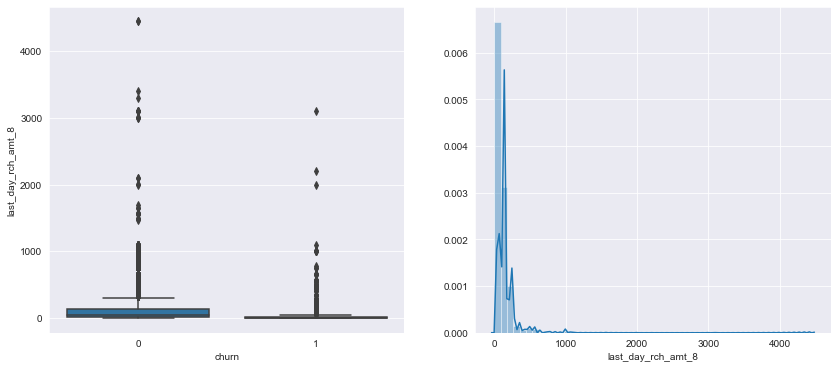

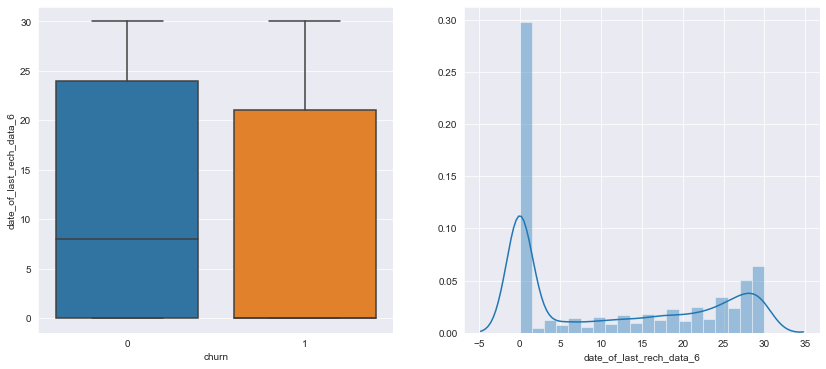

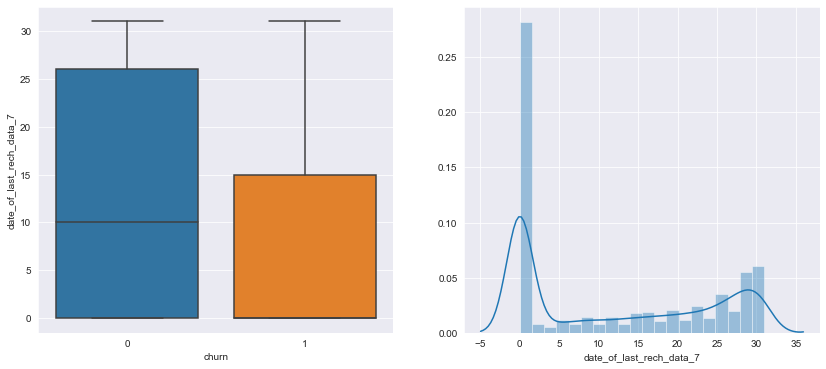

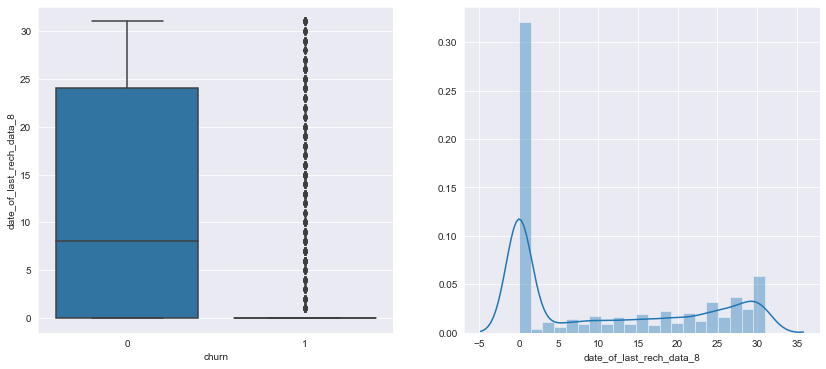

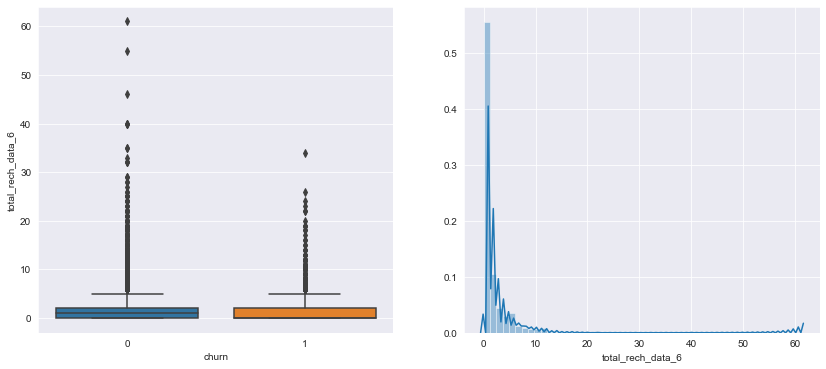

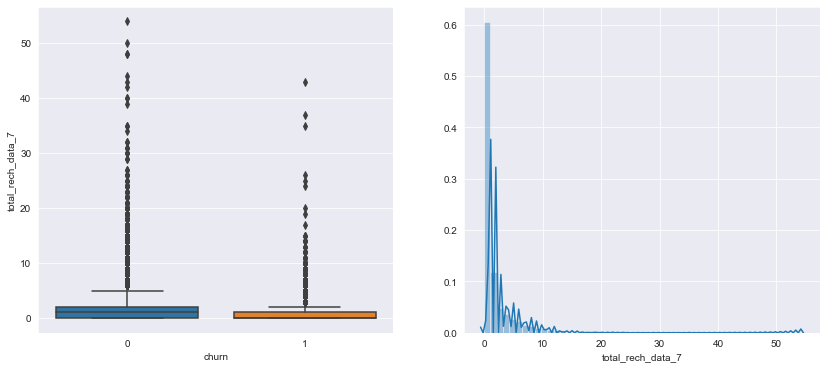

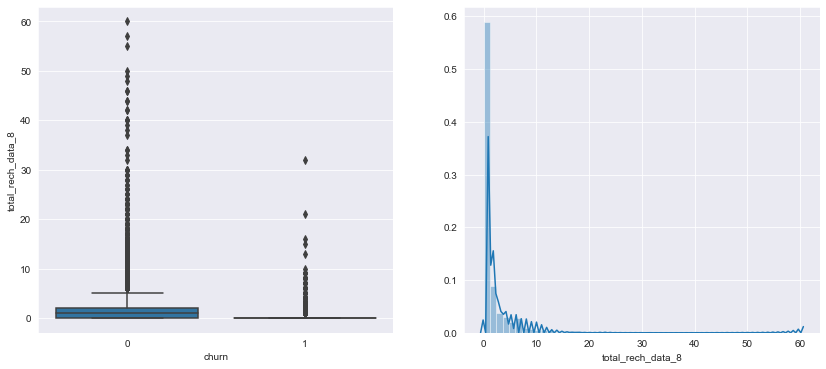

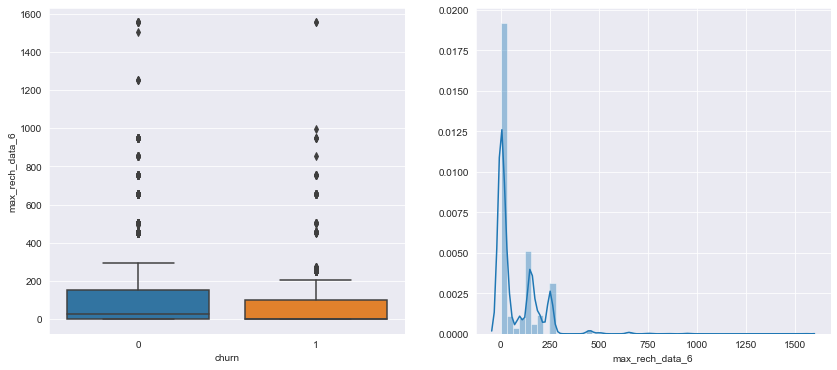

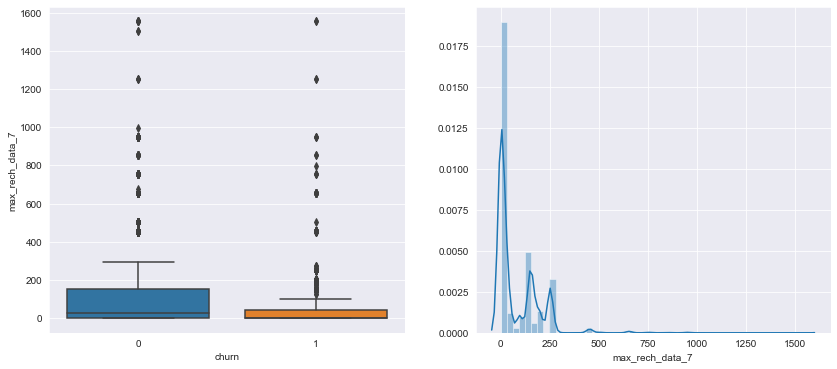

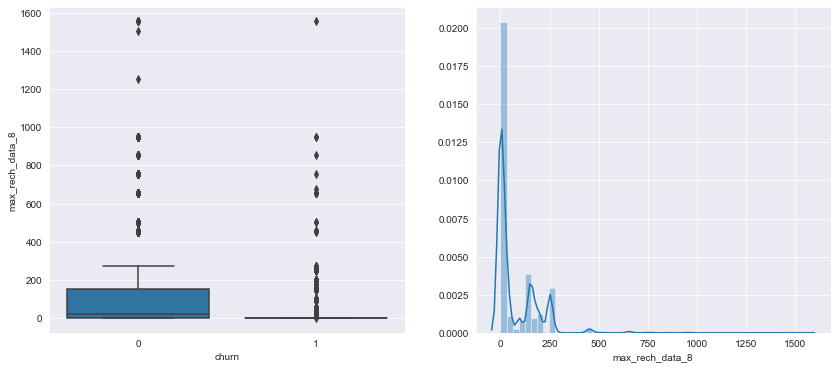

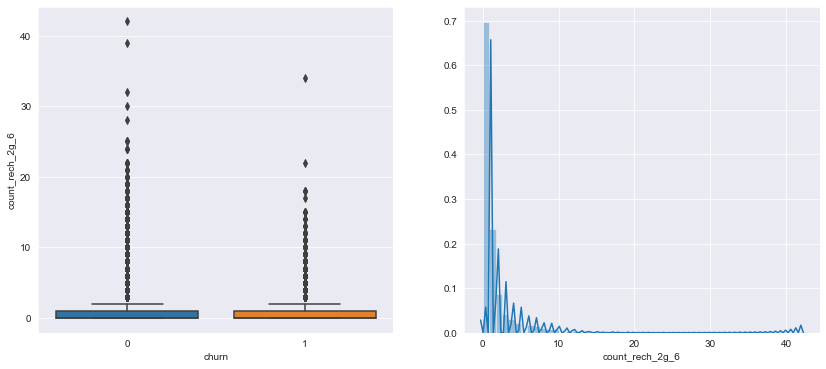

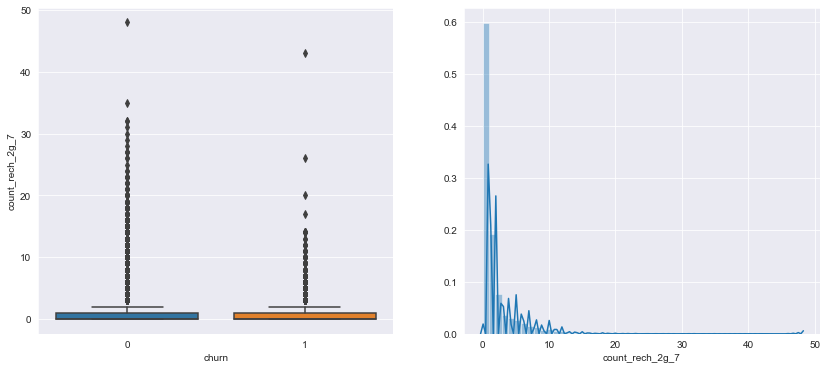

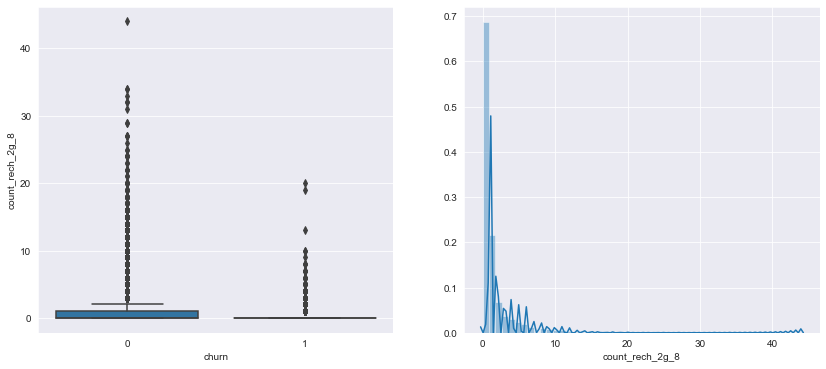

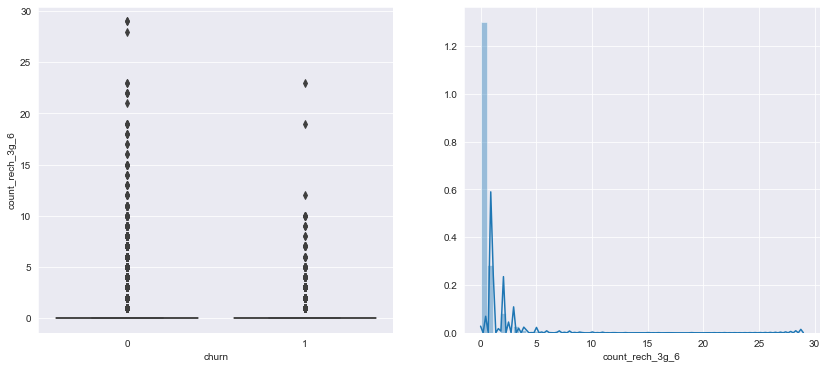

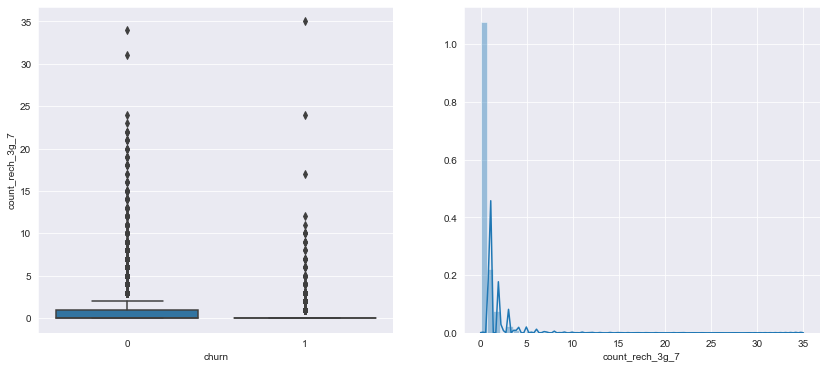

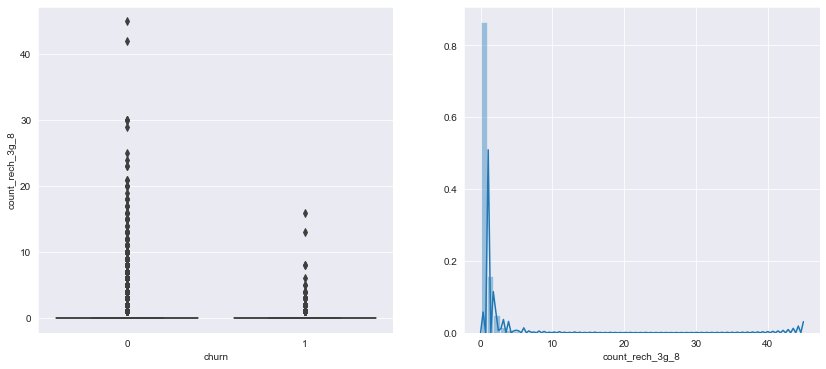

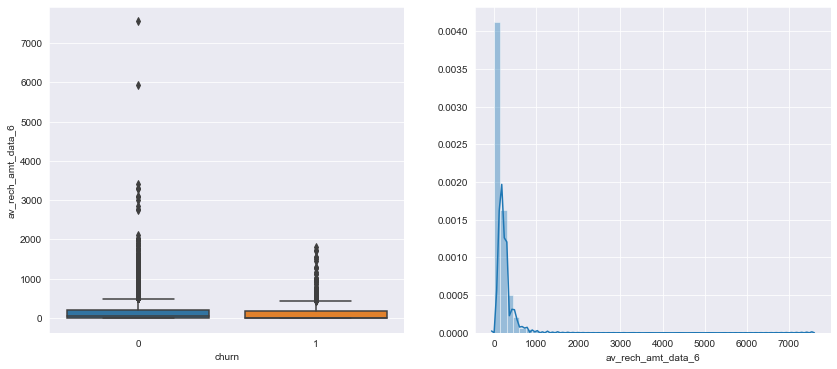

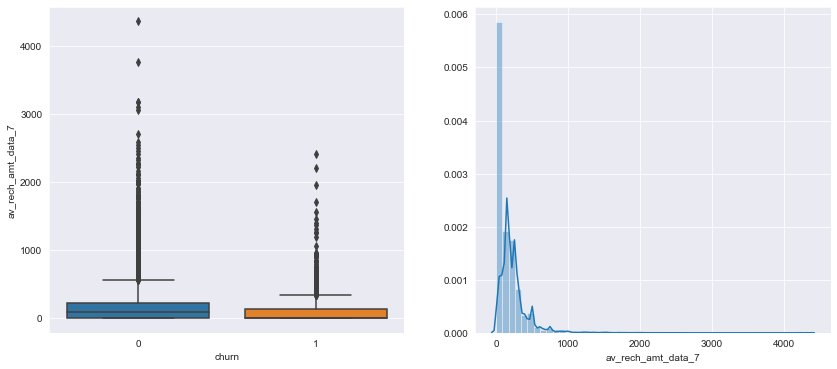

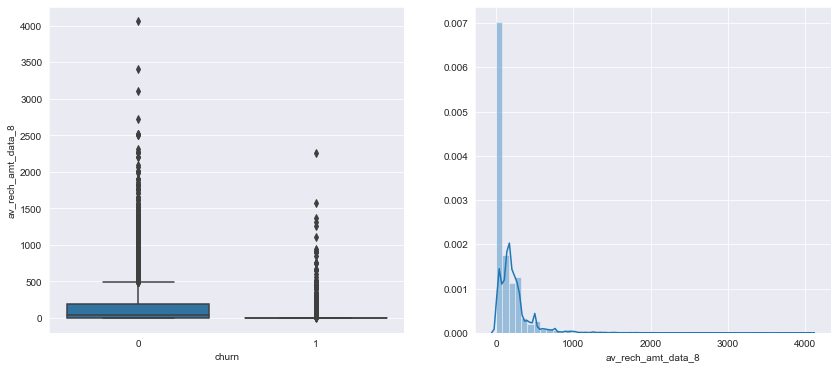

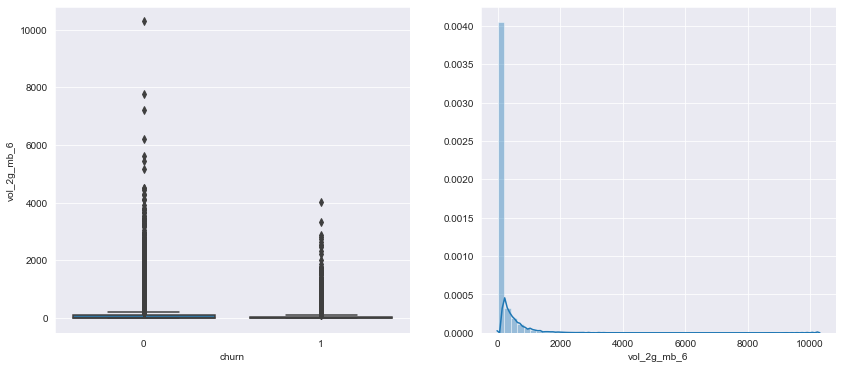

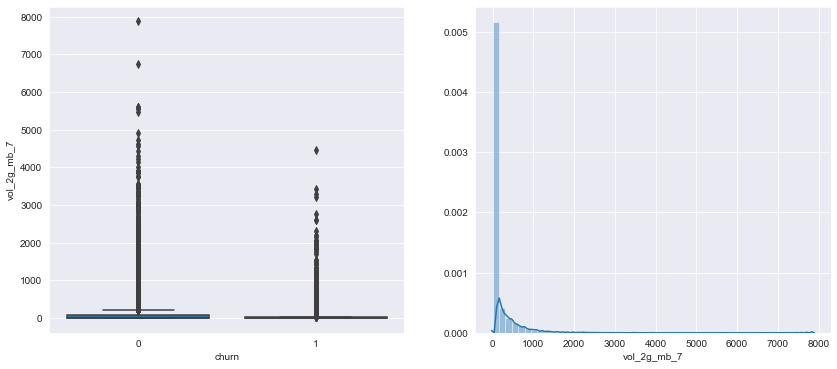

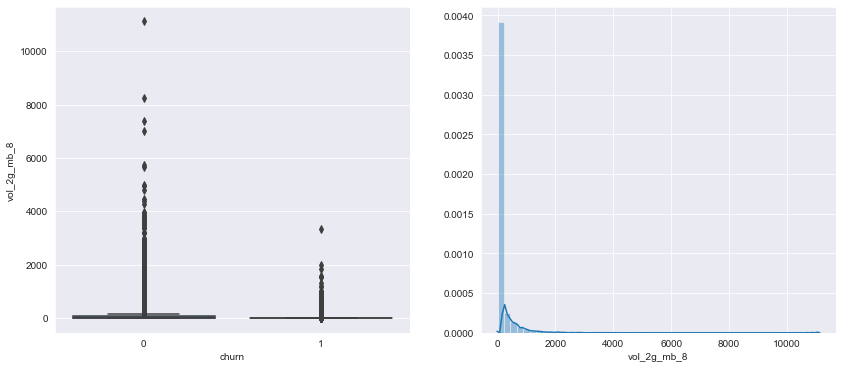

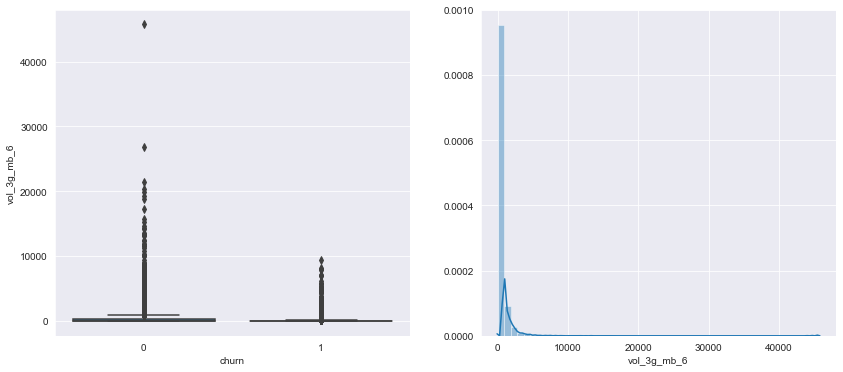

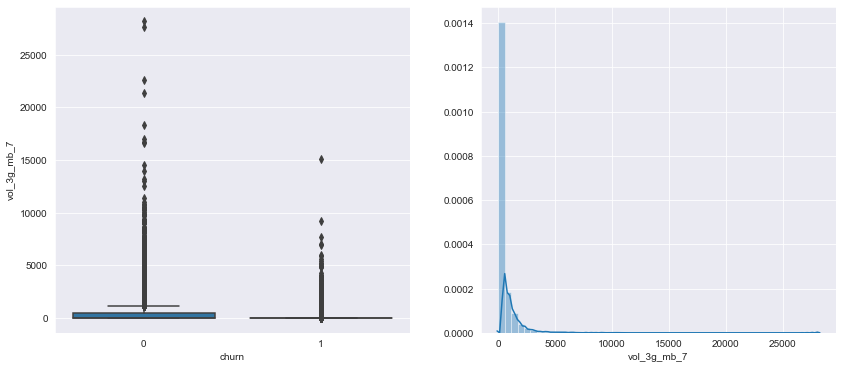

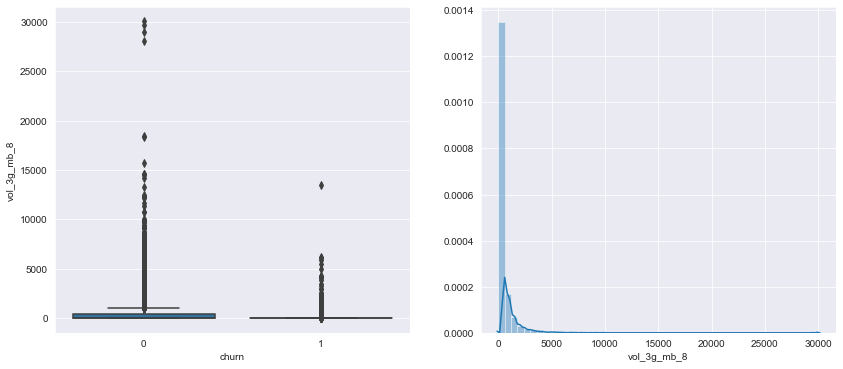

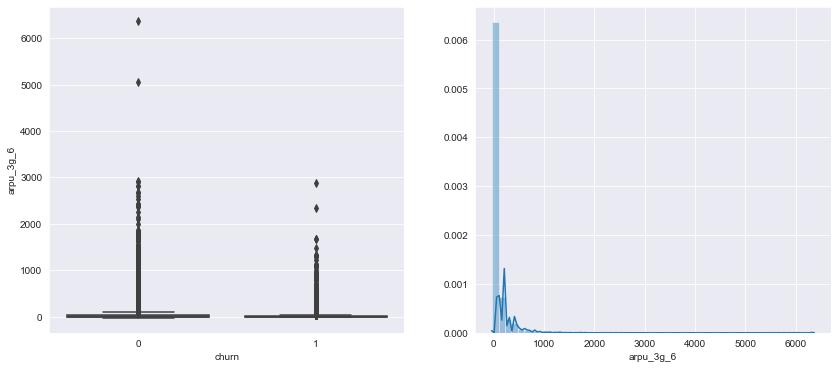

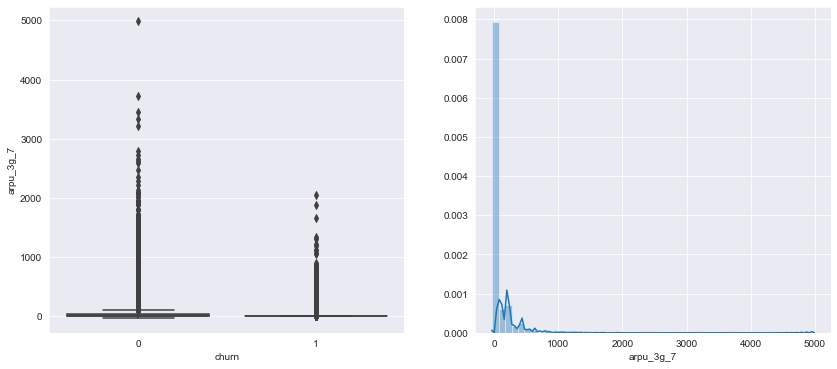

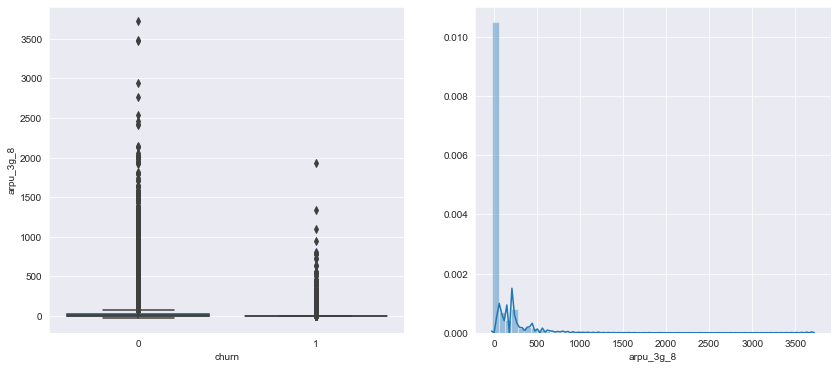

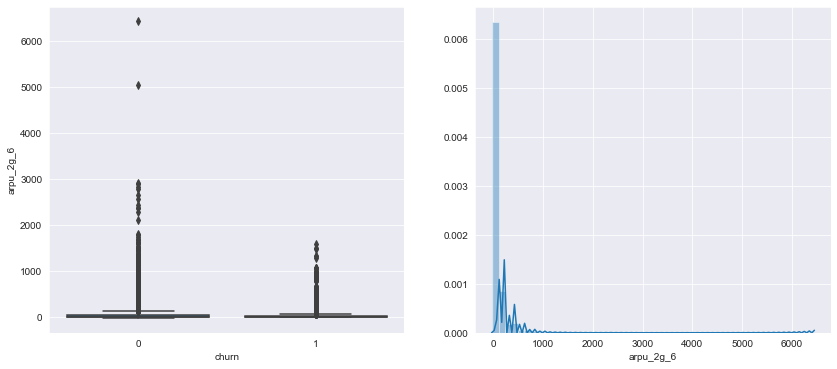

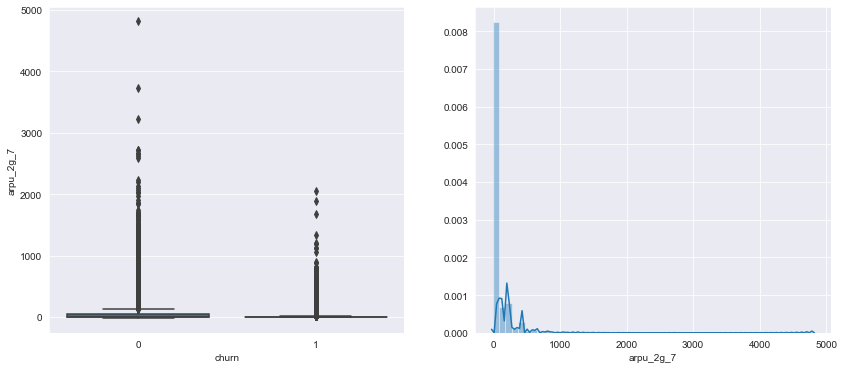

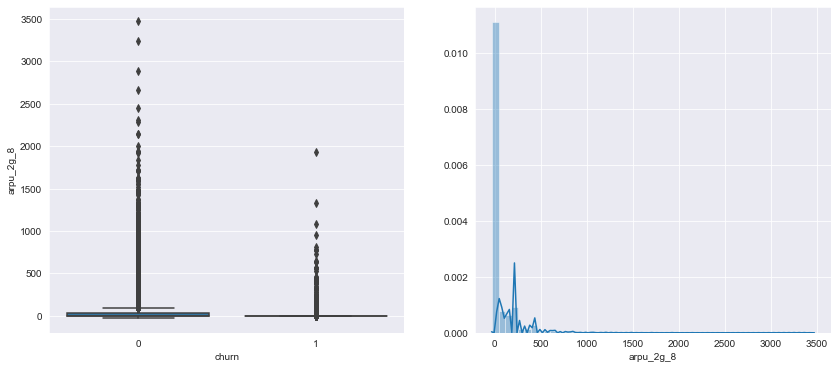

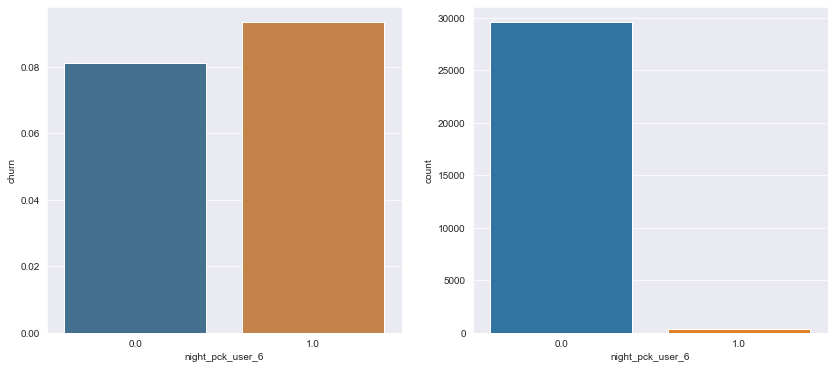

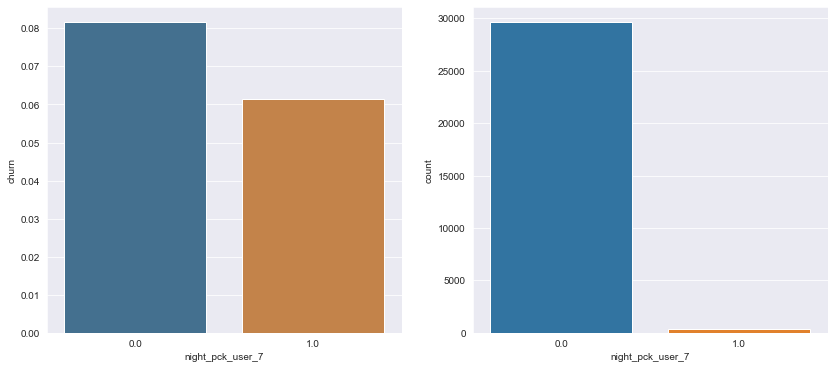

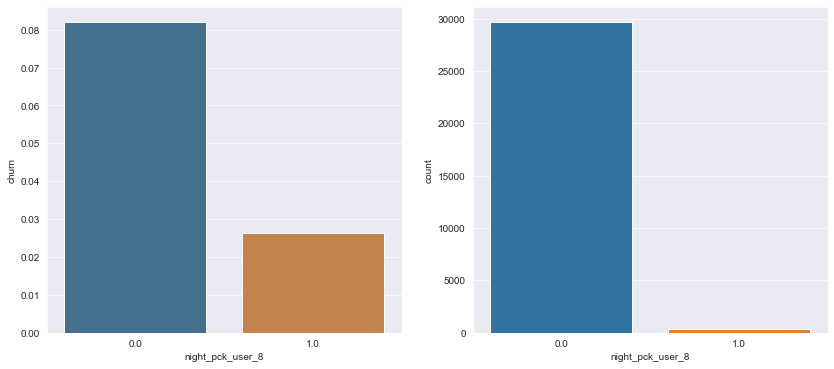

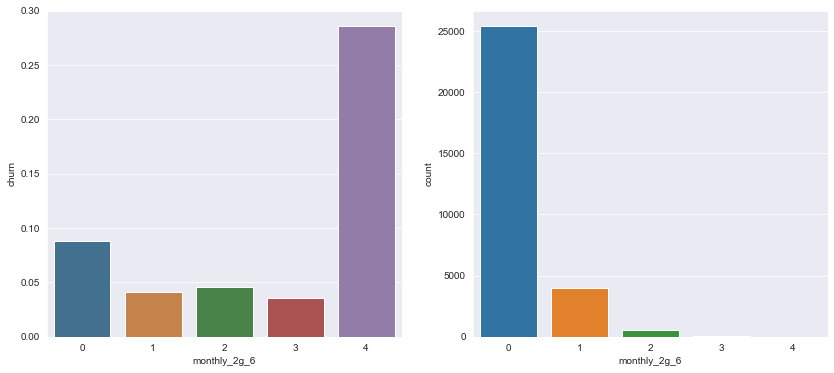

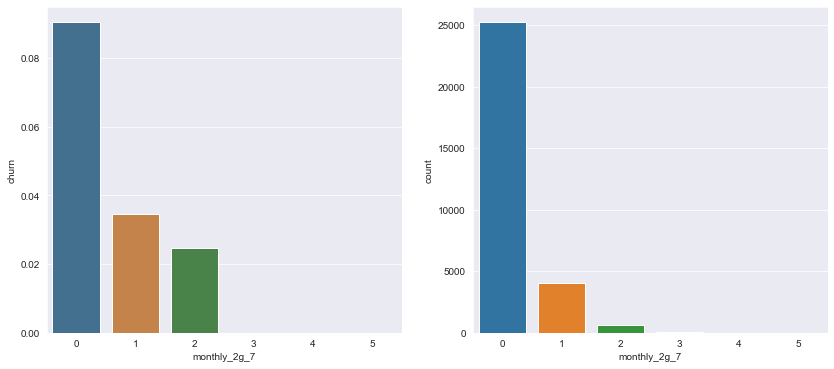

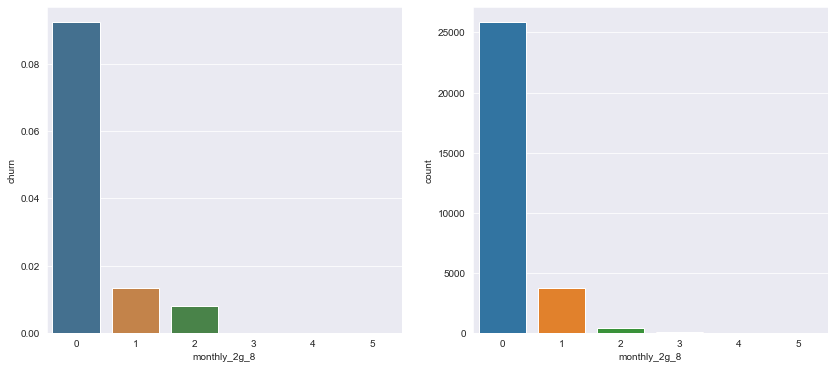

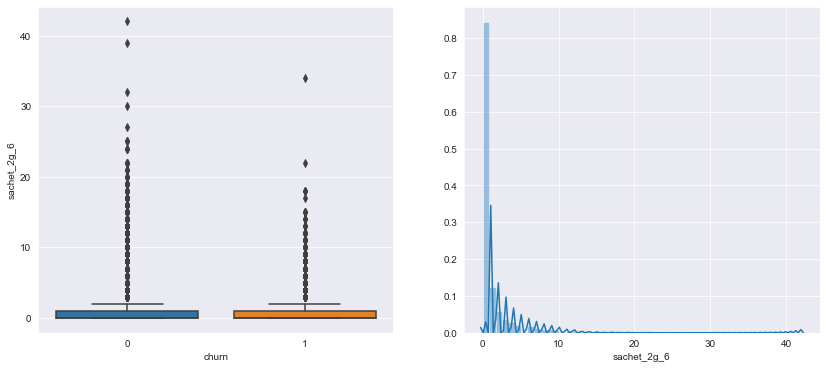

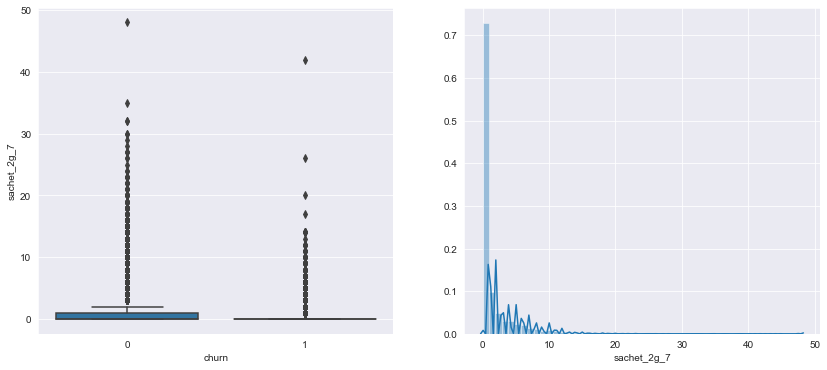

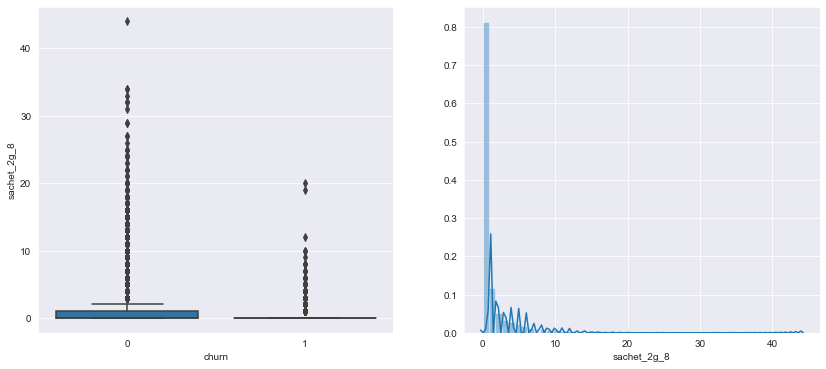

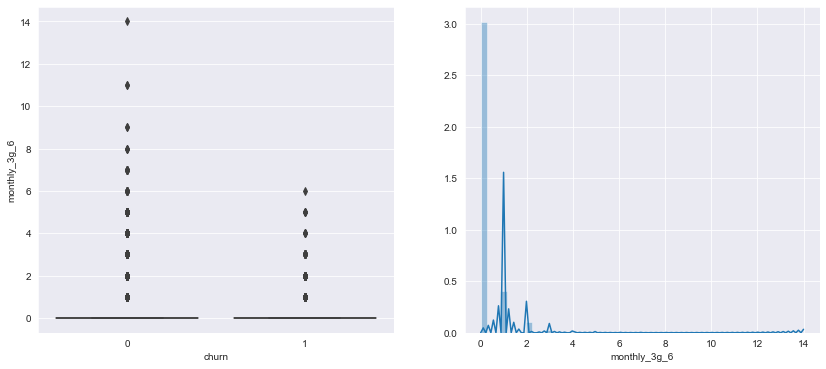

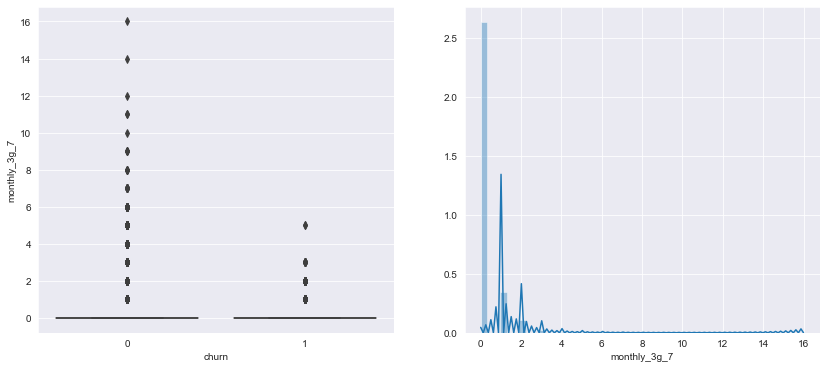

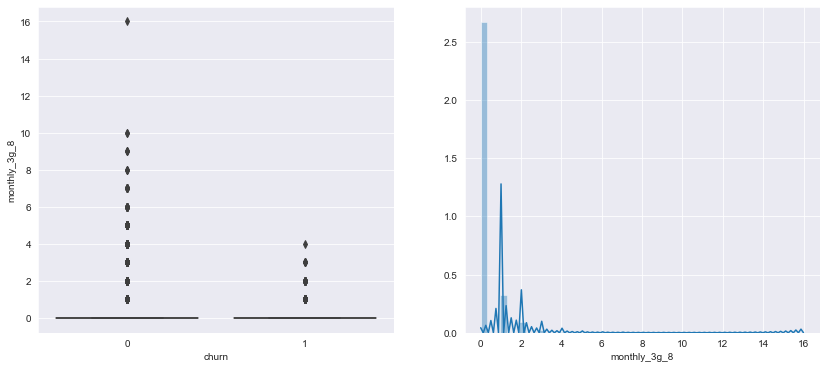

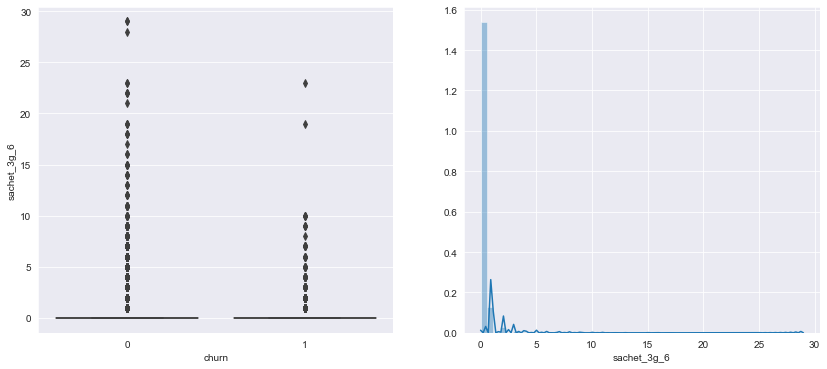

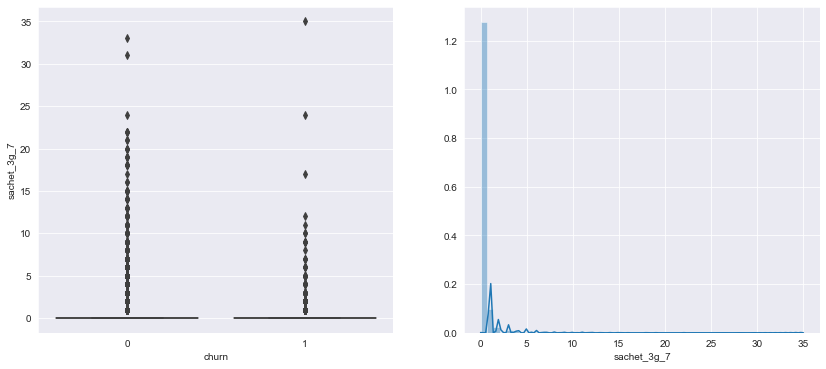

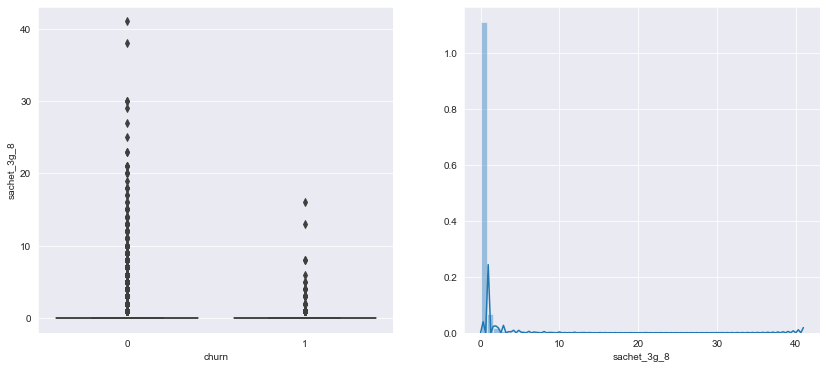

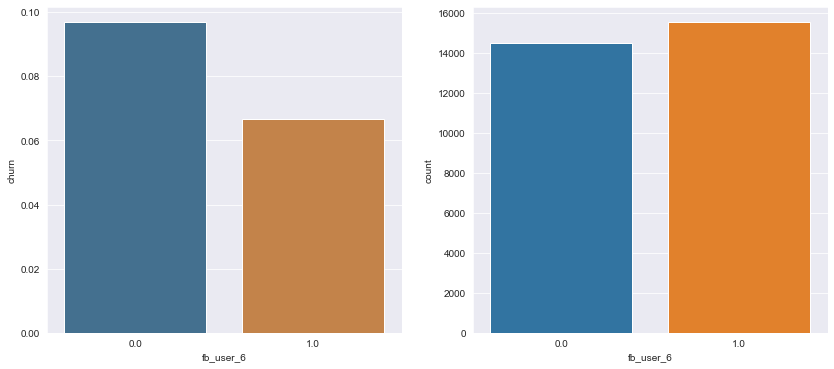

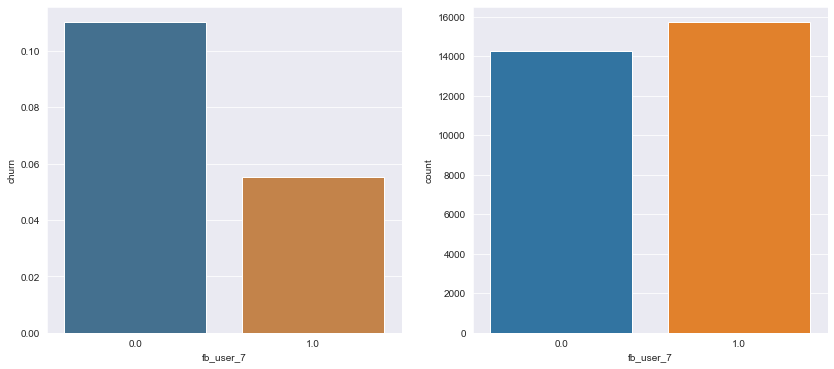

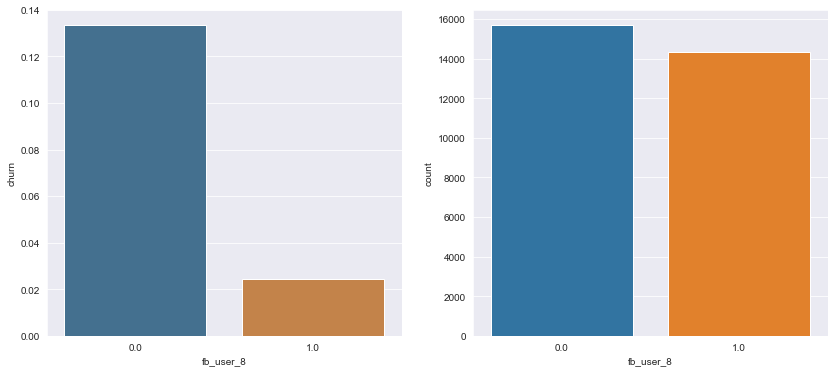

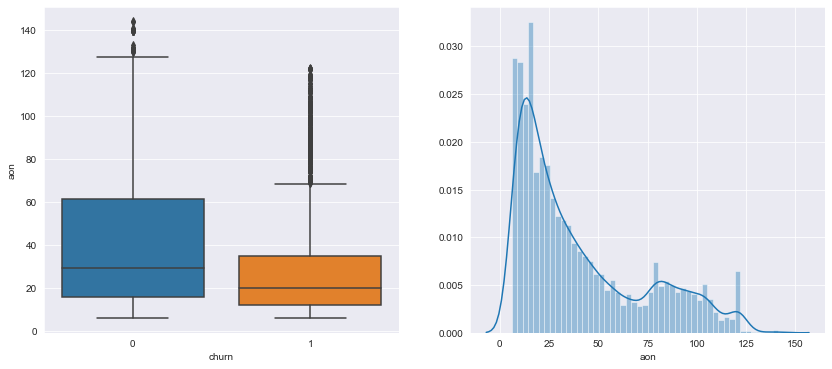

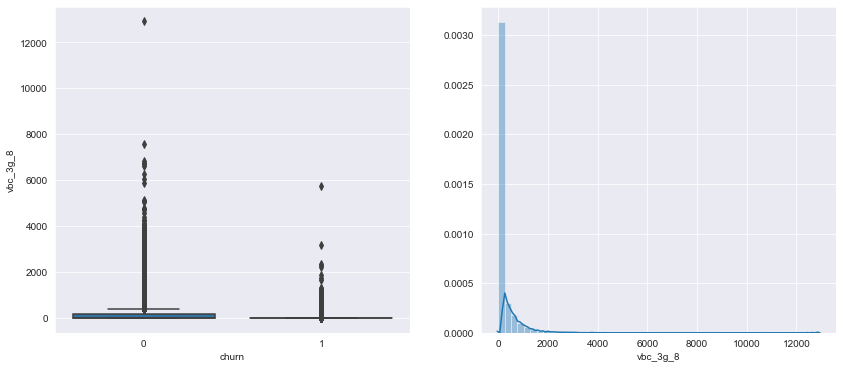

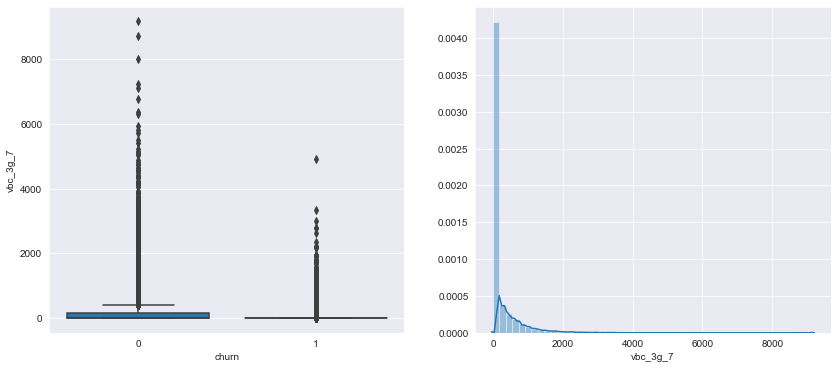

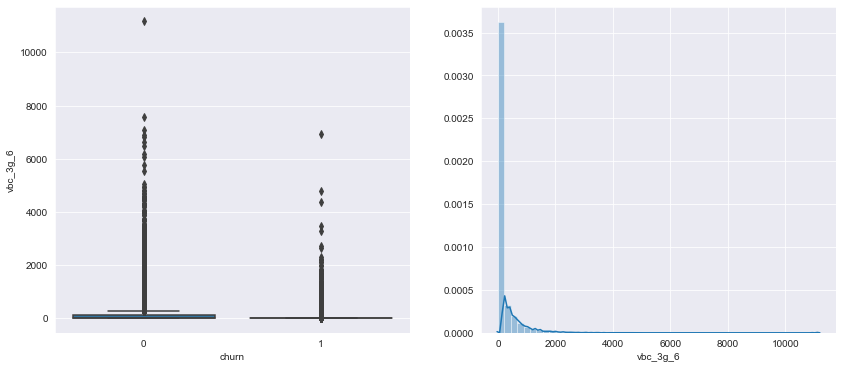

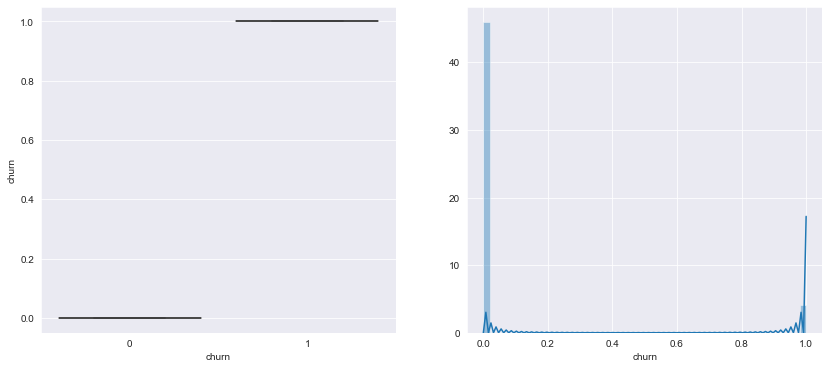

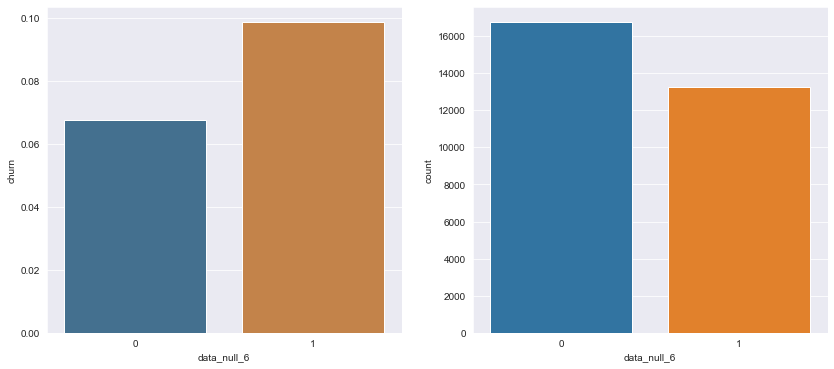

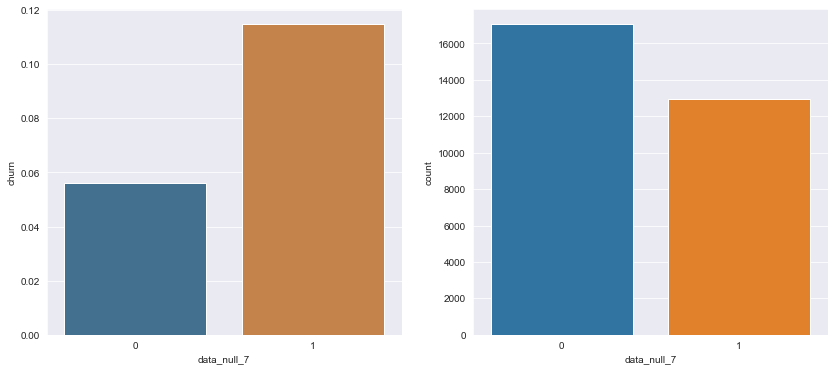

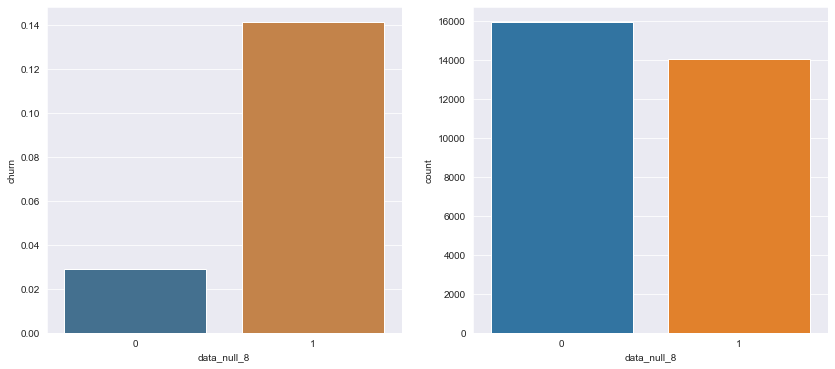

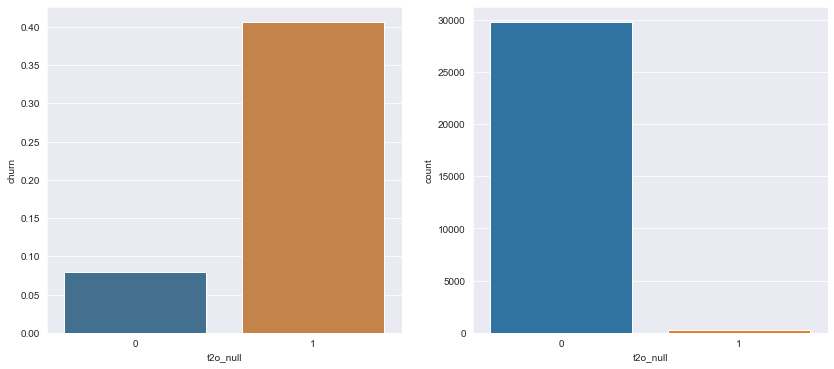

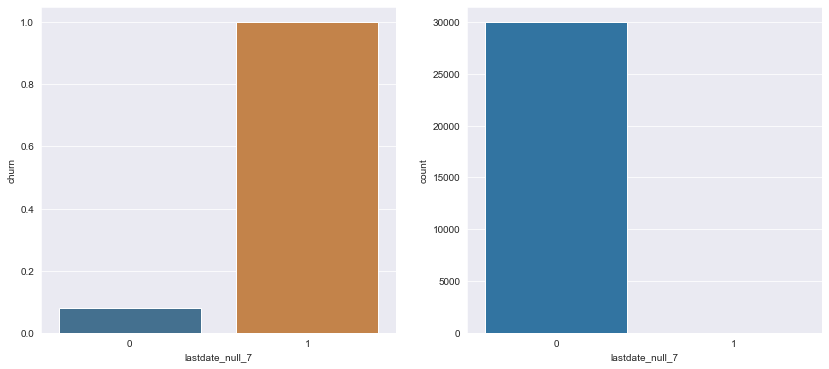

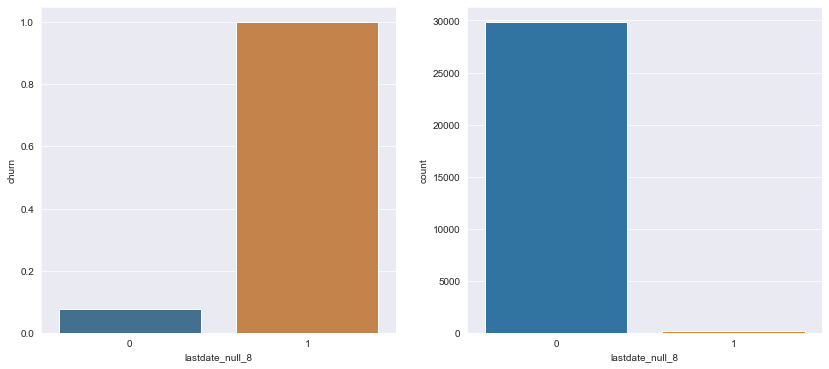

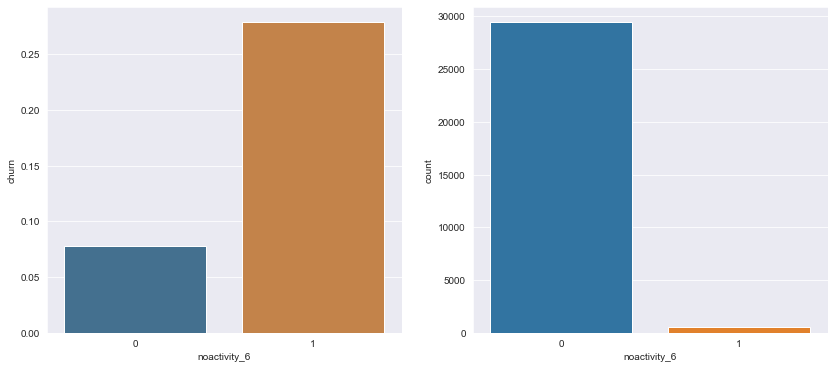

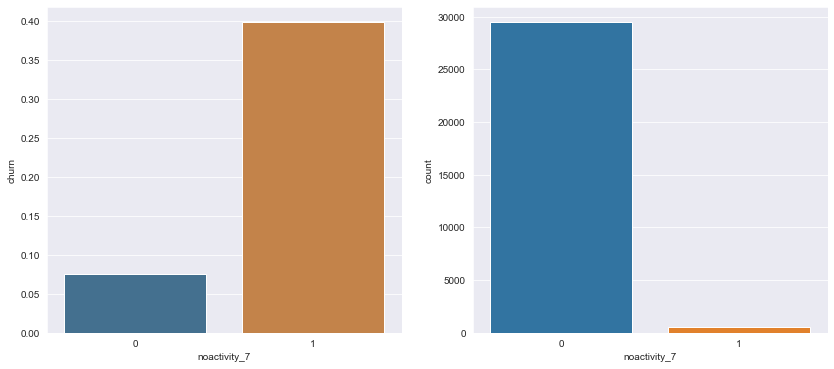

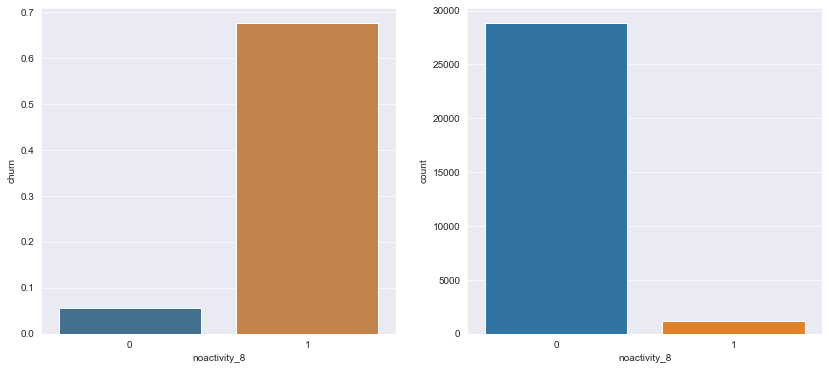

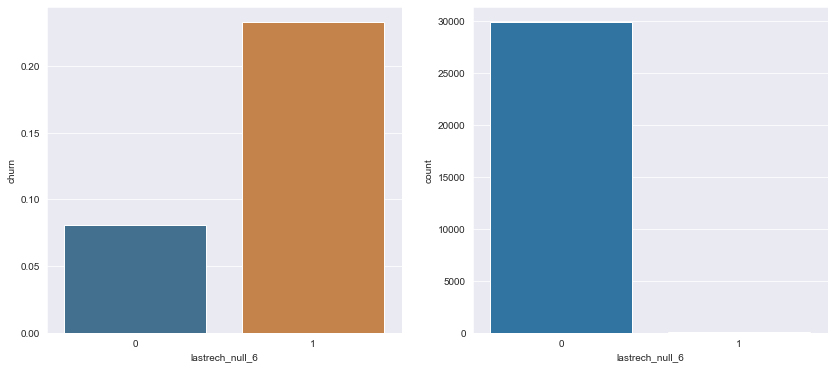

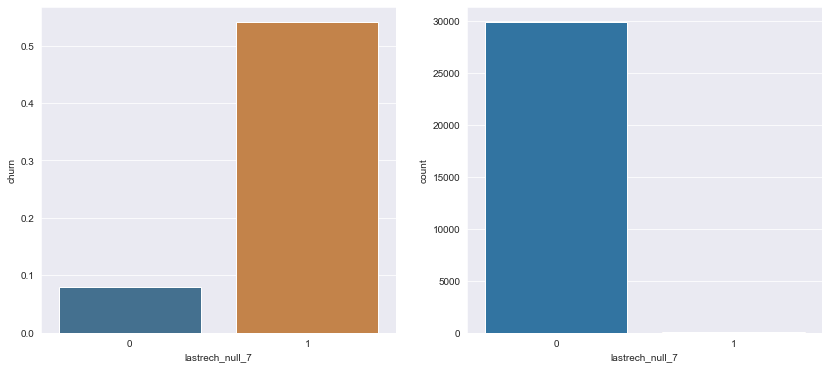

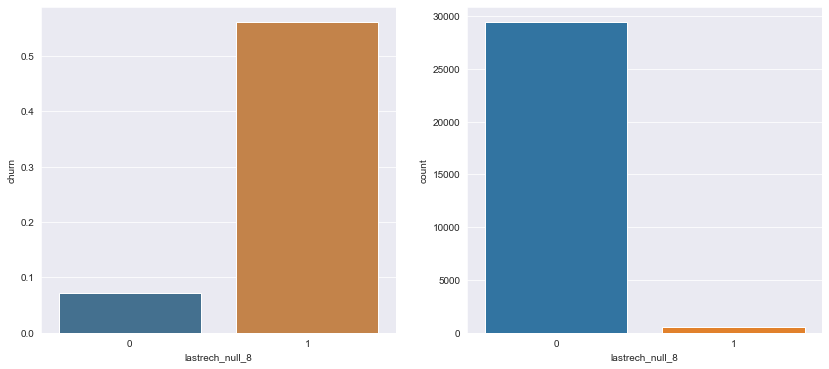

In [324]:
# using the above functions for creating distribution and bar plots depending up on the unique values
for col in tel_hc.columns:
    if col not in cols_catplot:
        num_plot(col)
    else:
        cat_plot(col)

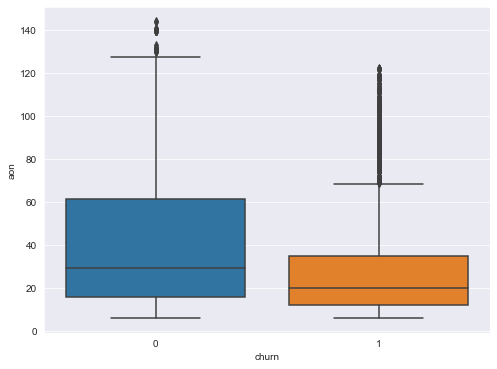

In [325]:
# Inferences from some of the columns

# churn vs tenure (in months)
plt.figure(figsize = (8,6))
sns.boxplot(x = 'churn', y= 'aon', data = tel_hc)
plt.show()

1. Clearly, the customers who are using the services of the telecom since 3 years are frequently churning where as the Old customers are rarely churning
2. Also, from the distribution graph, majority of the customers are fairly recent

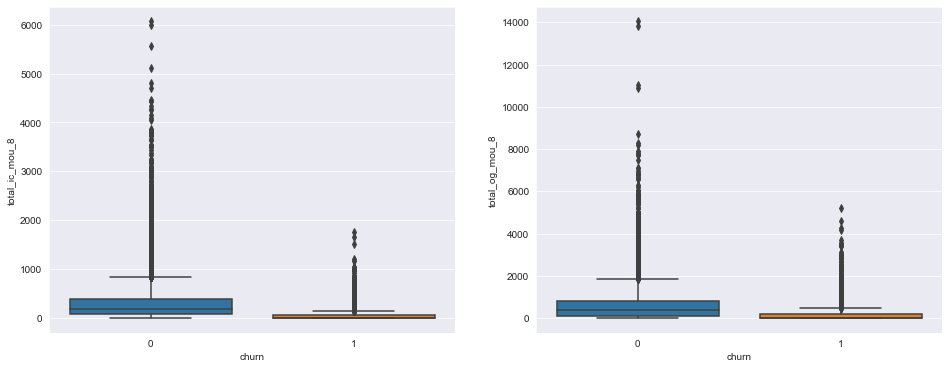

In [326]:
# churn vs user acticity in action phase (month8)
fig, (ax1,ax2) = plt.subplots(1,2, figsize =(16,6))
sns.boxplot(x = tel_hc['churn'], y = tel_hc['total_ic_mou_8'], ax = ax1)

sns.boxplot(x = tel_hc['churn'], y = tel_hc['total_og_mou_8'], ax = ax2)
plt.show()

No activity in action month (8) is a greater indicator of churn
1. Users who are not using any incoming or outgoing services
2. Users who are not recharging frequently and recharging with smaller amounts are likely to churn
3. User who are not availing any data services in the action month are also likely to churn

<Figure size 576x432 with 0 Axes>

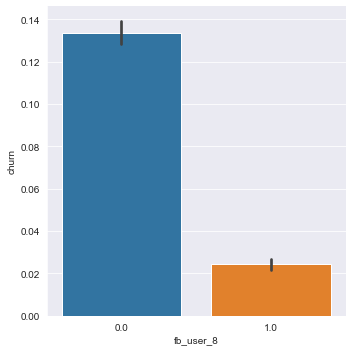

In [327]:
# churn vs fb_user_8 
plt.figure(figsize = (8,6))
sns.catplot(x= 'fb_user_8', y= 'churn', data=tel_hc, kind = 'bar')
plt.show()

1. The churn rate of customers who are using facebook services is less where as high for customers who are not using any facebook services

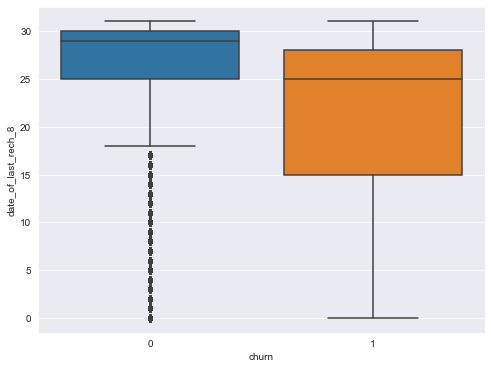

In [328]:
# churn vs date of last_recharge_8 (in months)
plt.figure(figsize = (8,6))
sns.boxplot(x = 'churn', y= 'date_of_last_rech_8', data = tel_hc)
plt.show()

The customers who are not recharging in the last week of action phase are likely to churn

### 5. Data Preparation for the Model - Train test split, Outlier Treatment, Scaling,  PCA<a id='V'></a>

In [329]:
# Train and test split of the data
tel_train, tel_test = train_test_split(tel_hc, test_size = 0.3, random_state = 0, stratify = tel_hc['churn'])

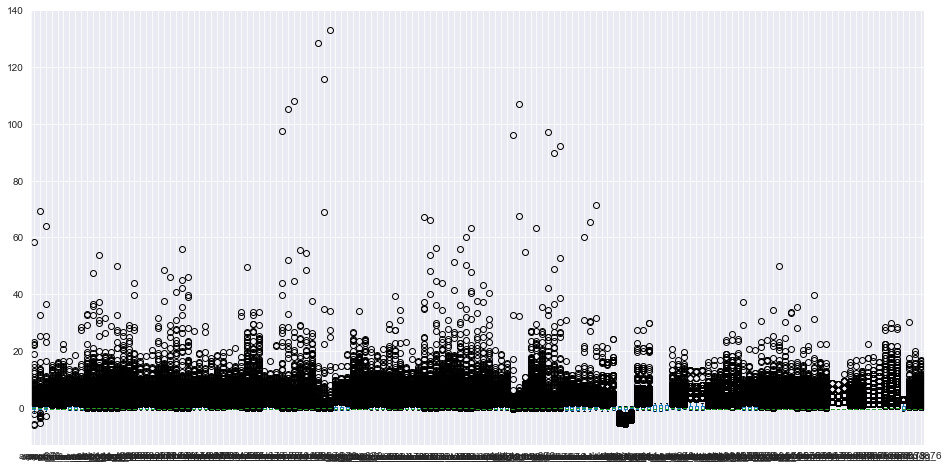

In [330]:
# Scaling the data
# Identifying the columns for which scaling is required
tel_scaled = tel_train
scaled_cols = [col for col in tel_scaled.columns if tel_scaled[col].nunique() > 2]

# initiating scaler object
scaler = StandardScaler()
# Fit, transforming the train data
tel_scaled[scaled_cols] = scaler.fit_transform(tel_scaled[scaled_cols])

# Identifying outliers in the train data
plt.figure(figsize = (16,8))
tel_scaled[scaled_cols].boxplot()
plt.show()

In [331]:
# outlier treatment for the train dataset
tel_scaled_train = tel_scaled[~(tel_scaled>20).any(axis = 1)]
print(tel_scaled_train.shape)
tel_scaled_train.head()

(20751, 170)


arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
33872 -0.679470 -0.667327 -0.714946    -0.565335    -0.552882    -0.504020   
79576 -0.311367 -0.161174  0.092577    -0.342227    -0.483627    -0.460131   
16016 -0.221965 -0.045573 -0.179544     1.015300     1.979341     1.683776   
54470  0.000836  0.444163  0.036209    -0.462090    -0.475552    -0.479010   
40020 -0.012496 -0.229615  0.025913     0.923396     0.471349     0.872893   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
33872     -0.663126     -0.749314     -0.679966      -0.211023      -0.162454   
79576     -0.398207     -0.561011     -0.482501       0.294941      -0.162454   
16016     -0.567197     -0.701905     -0.679863      -0.211023      -0.162454   
54470     -0.461090      0.218973     -0.371724      -0.211023       3.431757   
40020     -0.579412     -0.553439     -0.413113      -0.073843      -0.162454   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
33872      -0.163321      -0.228984      -0.212207      -0.187692   
79576      -0.163321      -0.111720      -0.212207      -0.187692   
16016      -0.163321      -0.228984      -0.212207      -0.187692   
54470      -0.163321      -0.228984       2.387544      -0.187692   
40020      -0.163321      -0.072717      -0.212207      -0.187692   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
33872         -0.360568         -0.344379         -0.326096         -0.440097   
79576          0.019783         -0.258708         -0.277757         -0.165669   
16016         -0.348583         -0.342191         -0.318122         -0.632397   
54470         -0.159572         -0.219115         -0.277633         -0.290995   
40020         -0.211579          0.107695          0.154547         -0.435664   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
33872         -0.645081         -0.631831         -0.301518         -0.298106   
79576         -0.462547         -0.360851         -0.220473          0.465400   
16016         -0.668499         -0.623055         -0.301518         -0.298106   
54470         -0.141263         -0.359452          1.410838          0.473271   
40020         -0.416757         -0.332362         -0.301518         -0.273567   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
33872         -0.297685         -0.240023         -0.190703          0.318203   
79576         -0.172864         -0.240023         -0.190703         -0.228627   
16016         -0.297685          0.017866          0.588241         -0.228627   
54470          1.381408         -0.240023         -0.190703         -0.228627   
40020         -0.142407         -0.240023         -0.190703         -0.228627   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
33872     -0.524113     -0.648542     -0.624581         -0.411623   
79576     -0.107293     -0.434296     -0.416184         -0.401166   
16016     -0.641302     -0.661788     -0.613867          1.385417   
54470     -0.209207     -0.206227     -0.332228         -0.411623   
40020     -0.429380     -0.205912     -0.116342          1.188243   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
33872         -0.412771         -0.373111         -0.438106         -0.438376   
79576         -0.383899         -0.350986         -0.352565         -0.406672   
16016          2.495534          2.177495         -0.438106         -0.422188   
54470         -0.412771         -0.373111         -0.427513         -0.399678   
40020          0.496525          0.945464         -0.374041         -0.341388   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
33872         -0.384115         -0.145614         -0.144722         -0.150307   
79576         -0.323194          1.434468          0.106579          0.632494   
16016         -0.378878         

In [332]:
# Creating churn targets- train and test
y_train = tel_scaled_train.pop('churn')
y_test = tel_test.pop('churn')

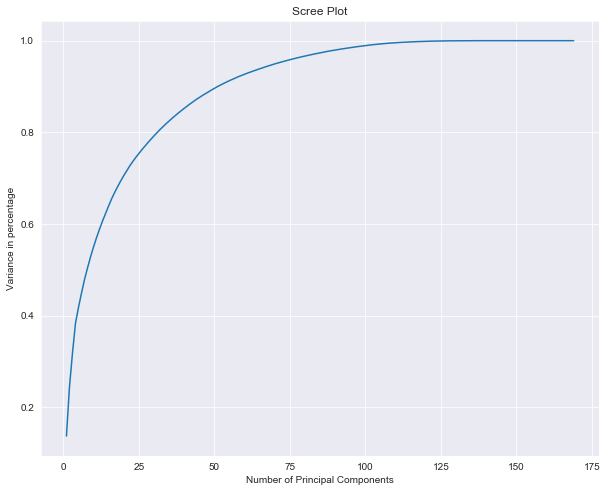

In [333]:
# Initiating the PCA with random state 100
pca = PCA(svd_solver = 'randomized', random_state = 100)

# fitting the scaled data with pca
pca.fit(tel_scaled_train)

# Identifying the variance of all pcas
pc_var = pca.explained_variance_ratio_

# plotting the scree plot to estimate the number of components required
plt.figure(figsize = (10,8))
plt.plot(range(1,len(pc_var.cumsum())+1,1), pc_var.cumsum())
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance in percentage')
plt.title('Scree Plot')
plt.show()

In [334]:
# Based on the above plot identifying the components required for the 98% Variance of the data
len(pc_var.cumsum()[pc_var.cumsum()<=0.98])

90

Considering 90 components which would cover 98% of variance of the total data

In [335]:
# initializing the pca with 5 principal components
pca = PCA(n_components = 90, svd_solver = 'randomized', random_state = 100)

# fitting and transforming the scaled country dataset using pca
tel_pca = pca.fit_transform(tel_scaled_train)

# converting the dataset into dataframe after applying pca
column_names = ['pc'+str(i) for i in range(1,91,1)]
tel_pca= pd.DataFrame(tel_pca, columns = column_names, index = tel_scaled_train.index)

# checking the country_pca dataset
tel_pca.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
33872  6.152085 -3.509936  1.606244  3.986772  0.337073 -4.449266 -3.079624   
79576  2.767681  0.859804  0.711859 -2.414316 -0.331988  0.401896 -0.193541   
16016 -3.953898 -2.213126  3.404048 -1.199524  3.338164  0.859123 -0.935374   
54470 -0.544129 -0.272185 -1.659522 -1.331255 -1.065480  0.348346  1.047287   
40020 -1.367198 -2.589113  1.108231  3.460257  1.555451  0.925545 -0.681224   

            pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
33872  2.157138 -2.265856 -2.080901 -1.522722  6.114858  0.212996 -0.489396   
79576  1.161398 -2.821719  0.009692 -1.479393 -0.963233  0.176843 -2.498141   
16016  0.187476 -0.479534 -0.970388  0.391569 -0.435293 -0.828144  0.388202   
54470  4.702365 -1.088000 -0.910599  1.303288  0.226367  0.488709 -1.410866   
40020  1.148334 -1.189847  0.438265 -0.585760 -1.479922 -0.884612 -1.077182   

           pc15      pc16      pc17      pc18      pc19      pc20      pc21  \
33872 -0.556025 -1.914996 -0.354175 -0.694206  0.407106  0.027891 -0.500080   
79576 -0.156291  0.339211 -0.120769  0.618935  0.045666 -0.236653  1.351679   
16016 -0.108201 -0.108021  0.481918  1.103661  1.470209  0.805037  0.125236   
54470  0.210938  1.751094  0.441748 -0.272999  1.136986 -0.809532  2.772718   
40020 -0.003270  0.598160 -0.280857 -0.920251 -0.279754 -1.108457 -0.617502   

           pc22      pc23      pc24      pc25      pc26      pc27      pc28  \
33872 -1.955677  0.277828 -0.480771 -0.527545 -0.470013 -0.988067  1.654444   
79576  0.473905  0.027503  0.291662 -0.441469 -0.479835 -0.667967  0.044138   
16016  0.126308 -0.496429  0.232829  0.082841  0.248788  0.877750  0.016836   
54470 -2.180922  0.529004  0.347423  0.132950 -0.438382  1.530565  0.562669   
40020 -2.488075  0.459209  0.585954 -0.350100  0.024158 -0.935948 -0.606863   

           pc29      pc30      pc31      pc32      pc33      pc34      pc35  \
33872 -1.448971  0.673702 -0.460274  0.145494  1.570663  0.771844 -0.461485   
79576  0.397041 -0.128297 -0.303747 -0.964196 -0.422970 -0.174148 -0.684413   
16016 -0.321017  0.278106 -0.444895  0.182209 -0.710603 -0.672634  0.454988   
54470  1.634737 -0.955161  0.527321 -0.182541  1.250408 -0.425527 -0.691094   
40020  0.439075  0.132675  1.334137  0.213564  0.330893  0.396009  0.449082   

           pc36      pc37      pc38      pc39      pc40      pc41      pc42  \
33872 -0.094102 -0.144836  0.124048 -0.003565  0.366741  0.388673  0.035240   
79576  0.335222  0.224478  1.347617 -1.315156  1.485120 -0.344868 -0.333431   
16016  0.014948  1.501708  1.113674  0.744166 -0.870496 -0.032338 -0.270115   
54470 -1.584007 -0.201314  0.005858 -0.026535 -0.015754  0.281263 -0.335706   
40020 -0.073315 -0.370945  0.232759  0.596870 -0.228248 -0.451247  0.150801   

           pc43      pc44      pc45      pc46      pc47      pc48      pc49  \
33872 -0.872295  0.079015 -0.126397  0.165362  0.515747 -0.455987  0.240152   
79576 -0.535305  0.365897 -0.492923 -0.165987  0.109830  0.511082 -0.239274   
16016 -0.209638  0.078730 -0.203535  0.055064 -0.494513  1.526075 -0.255627   
54470  0.031293 -0.497402 -0.227010  0.231159  1.553325  3.049170  0.136404   
40020 -0.077852 -0.106772  0.218473  1.069663 -0.048993 -0.212415 -0.121337   

           pc50      pc51      pc52      pc53      pc54      pc55      pc56  \
33872  0.228898 -0.155241 -0.486649  0.023490 -0.037136 -0.034897  0.150135   
79576 -0.008764  0.029923  0.496017  0.176530  0.235448  0.123561 -0.296553   
16016 -1.064993  1.369286 -0.124883 -0.013316 -0.436740  0.131081 -0.106726   
54470  0.982297 -1.200052 -0.229282 -0.481173 -0.110935 -1.849315 -0.179049   
40020 -0.027314 -0.034748  0.126101 -0.132630 -0.080751 -0.124142 -0.497064   

           pc57      pc58      pc59      pc60      pc61      pc62      pc63  \
33872 -0.325684  0.075635  0.547990 -0.417406  0.376515  0.085336  0.162350   
79576 -0.059664 -0.047183 -0.285930  0.046427  0.77415

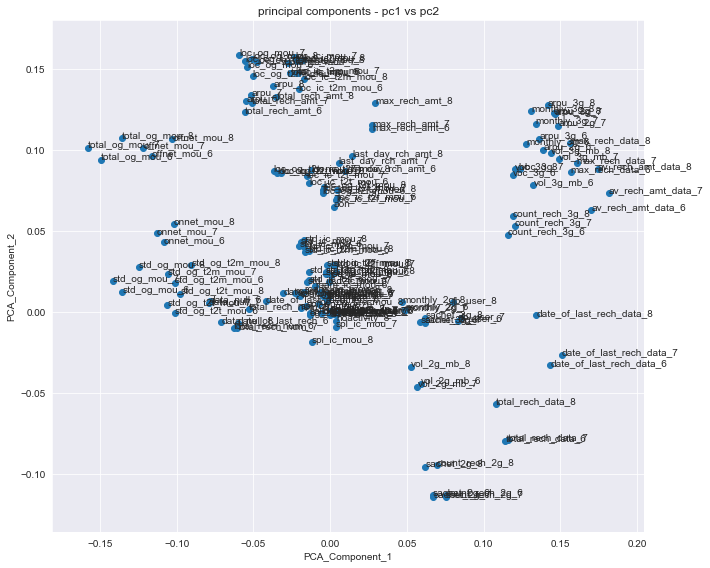

In [336]:
# Visualizing PC Components (themes) vs features

# creating pca_components dataframe
pca_comp = pd.DataFrame({'pca1': pca.components_[0], 'pca2': pca.components_[1], 'features': tel_scaled_train.columns})

# intiliaing figure
plt.figure(figsize = (10,8))
plt.scatter(pca_comp['pca1'], pca_comp['pca2'])
plt.xlabel('PCA_Component_1')
plt.ylabel('PCA_Component_2')
plt.title('principal components - pc1 vs pc2')
for i, txt in enumerate(pca_comp.features):
    plt.annotate(txt, (pca_comp.pca1[i],pca_comp.pca2[i]))
plt.tight_layout()
plt.show()

In [337]:
# Creating X_train dataset for modelling
X_train = tel_pca.copy()

# applying scaler and pca tranformations for test data
tel_test[scaled_cols] = scaler.transform(tel_test[scaled_cols])
X_test = pca.transform(tel_test)
column_names = ['pc'+str(i) for i in range(1,91,1)]
X_test = pd.DataFrame(X_test, columns = column_names, index = tel_test.index)

### 6. Model Functions and overall procedure of modelling <a id='VI'></a>

**Overall Modelling procedure followed for the below models:**
1. Evaluation Metric for the models: F1 score is the ideal metric for imbalanced dataset. Area under ROC Curve can also be used as the evaluation metric. As the data is highly imbalanced accuracy is not the best evaluation metric
2. PCA Models: Tried Logistic Regression, Random Forest Model, Gradient Boosting classifer and XGB classifer. Tried various data imbalance techniques such as SMOTE, tuning class_Wieght parameter etc,
3. Original Feature based model: Random Forest with and without SMOTE
2. For all the above modelsHyper-parameters are tuned using `f1_score` or `roc_auc` metric through Grid-search.
3. Compared different models and finalize the model having maximum `f1_score`, `roc_auc` etc.
4. Finalize the threshold for the final model selected to maximize recall. we are maximizing recall we need to identify most of the churners which is only possible by maximizing recall.
5. Identifying feature importance through the model built on original features

In [338]:
# creating a function for gridsearch which can be used various models

# Create a function gridsearch which would be used for fine tuning hyper-parameters
def gridsearch_classifier(estimator, params, score, X_train, y_train, refit_score):
    kfolds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 16)
    grid_search = GridSearchCV(estimator, params, scoring = score, refit = refit_score, cv = kfolds, return_train_score = True, n_jobs = - 1, verbose=2)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    cv_results = grid_search.cv_results_
    cv_results = pd.DataFrame(cv_results)
    return cv_results

def randsearch_classifier(estimator, params, score, X_train, y_train, refit_score):
    kfolds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 16)
    rand_search = RandomizedSearchCV(estimator, params, scoring = score, cv = kfolds, refit = refit_score, return_train_score = True, n_jobs = - 1, verbose=2)
    rand_search.fit(X_train, y_train)
    print(rand_search.best_params_)
    cv_results = rand_search.cv_results_
    cv_results = pd.DataFrame(cv_results)
    return cv_results

# Creating a function for metrics, confusion matrix and classification report 
def classification_rep(y_train, X_train, model):
    probs = np.array([x[-1] for x in model.predict_proba(X_train)])
    print('The roc_auc score is {}'.format(roc_auc_score(y_train, probs).round(4)))
    print('confusion matrix:')
    print(confusion_matrix(y_train, model.predict(X_train)))
    print('classification report:')
    print(classification_report(y_train, model.predict(X_train)))
    
# Creating a function metrics_curve for drawing ROC_curve and 
def metrics_curves(y_train, X_train, model):  
    
    probs = np.array([x[-1] for x in model.predict_proba(X_train)])
    fpr, tpr, thresholds = roc_curve( y_train, probs)
    auc_score = roc_auc_score( y_train, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
    p, r, thresholds = precision_recall_curve(y_train, probs)
    pre_recal = pd.DataFrame({'precision':p[:-1], 'recall':r[:-1], 'thresholds': thresholds})
    pre_recal.plot.line(x='thresholds', y=['precision','recall'], figsize = (8,8))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Precision vs Recall Trade-Off Curve')
    plt.show()
    
    thresh = [i/100 for i in range(0,105,5)]
    results_df = pd.DataFrame( columns = ['thresh','accuracy','prec', 'recal'])

    for i in thresh:
        pred =  [1 if t > i else 0 for t in probs]
        pr = metrics.precision_score(y_train, pred)
        rc = metrics.recall_score(y_train, pred)
        ac = metrics.accuracy_score(y_train, pred)
        results_df.loc[i] = [i, ac, pr, rc]
    
    return results_df

# creating function for evaluating cross validation score on oversampled train dataset using SMOTE
def repeated_evaluation_smote(model, X_train, y_train):
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)
    X_trainr = X_train.copy()
    X_trainr = X_trainr.reset_index()
    X_trainr = X_trainr.drop('index', axis = 1)
    
    y_trainr = y_train.copy()
    y_trainr = y_train.reset_index()
    y_trainr = y_trainr.drop('index', axis = 1)
    y_trainr = y_trainr['churn']
    train_auc_scores = []
    test_auc_scores = []
    train_pr_scores = []
    test_pr_scores = []
    train_re_scores = []
    test_re_scores = []
    train_acc_scores = []
    test_acc_scores = []
    for train_index, test_index in rskf.split(X_trainr, y_trainr):
        d_Xtrain, d_Xtest = X_trainr.loc[train_index, ], X_trainr.loc[test_index,]
        d_ytrain, d_ytest = y_trainr.loc[train_index,], y_trainr.loc[test_index,]
        
        d_smt = SMOTE(random_state = 0, n_jobs = -1)
        d_Xtrain_smt, d_ytrain_smt = d_smt.fit_sample(d_Xtrain, d_ytrain)

        model.fit(d_Xtrain_smt, d_ytrain_smt)
        train_auc_scores.append(roc_auc_score(d_ytrain_smt, (model.predict_proba(d_Xtrain_smt)[:,1])))
        test_auc_scores.append(roc_auc_score(d_ytest, (model.predict_proba(d_Xtest)[:,1])))
        train_pr_scores.append(metrics.precision_score(d_ytrain_smt, (model.predict(d_Xtrain_smt))))
        test_pr_scores.append(metrics.precision_score(d_ytest, (model.predict(d_Xtest))))
        train_re_scores.append(metrics.recall_score(d_ytrain_smt, (model.predict(d_Xtrain_smt))))
        test_re_scores.append((metrics.recall_score(d_ytest, (model.predict(d_Xtest)))))
        train_acc_scores.append(metrics.accuracy_score(d_ytrain_smt, (model.predict(d_Xtrain_smt))))
        test_acc_scores.append(metrics.accuracy_score(d_ytest, (model.predict(d_Xtest))))
                           
    results = pd.DataFrame({'train_auc_scores': train_auc_scores, 'test_auc_scores': test_auc_scores, 
                           'train_pr_scores': train_pr_scores, 'test_pr_scores': test_pr_scores,
                           'train_re_scores': train_re_scores, 'test_re_scores': test_re_scores,
                           'train_acc_scores': train_acc_scores, 'test_acc_scores': test_acc_scores,})
    return results

In [339]:
# creating model_Results dataframe which would be used for comparing models
model_results = pd.DataFrame({'Model':[], 'Description':[], 'original/PCA': [], 'Train_auc_mean': [], 'cv_auc_mean':[], 'cv_auc_std' :[], 'test_auc_mean':[], 'train_f1_score':[], 'test_f1_score': []})

In [340]:
model_results.head()

Empty DataFrame
Columns: [Model, Description, original/PCA, Train_auc_mean, cv_auc_mean, cv_auc_std, test_auc_mean, train_f1_score, test_f1_score]
Index: []

### 6.1 Logistic Regression <a id='VI.1'></a>

#### Logistic Model with no sampling techniques

The roc_auc score is 0.9127
confusion matrix:
[[15979  3080]
 [  244  1448]]
classification report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     19059
           1       0.32      0.86      0.47      1692

    accuracy                           0.84     20751
   macro avg       0.65      0.85      0.69     20751
weighted avg       0.93      0.84      0.87     20751



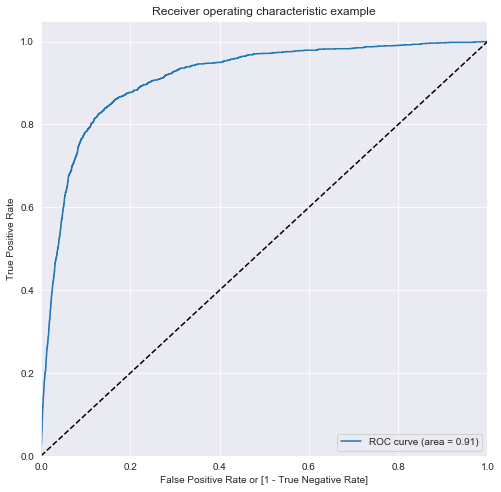

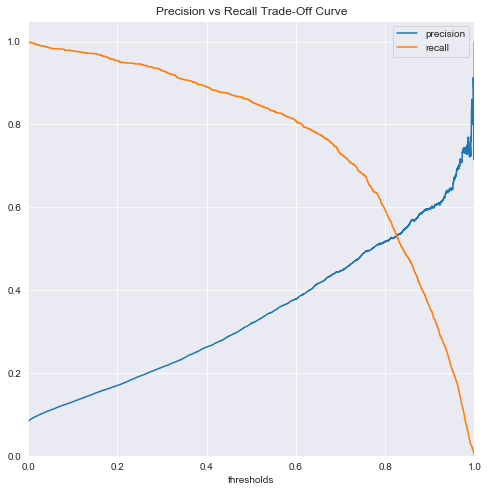

thresh  accuracy      prec     recal
0.00    0.00  0.081538  0.081538  1.000000
0.05    0.05  0.350393  0.110185  0.984634
0.10    0.10  0.466532  0.130438  0.978132
0.15    0.15  0.552455  0.150997  0.971040
0.20    0.20  0.615488  0.169627  0.953901
0.25    0.25  0.671341  0.192197  0.946217
0.30    0.30  0.715435  0.213830  0.930260
0.35    0.35  0.753409  0.236498  0.908392
0.40    0.40  0.787143  0.262589  0.890662
0.45    0.45  0.814467  0.289175  0.874704
0.50    0.50  0.839815  0.319788  0.855792
0.55    0.55  0.860103  0.349715  0.832742
0.60    0.60  0.876102  0.378490  0.809102
0.65    0.65  0.892969  0.416218  0.776596
0.70    0.70  0.904053  0.445931  0.728723
0.75    0.75  0.915715  0.487908  0.679669
0.80    0.80  0.921642  0.517010  0.592790
0.85    0.85  0.926076  0.553888  0.479905
0.90    0.90  0.927955  0.597044  0.358156
0.95    0.95  0.926172  0.646520  0.208629
1.00    1.00  0.918462  0.000000  0.000000

In [341]:
# Creating logistic model with class_weight = balanced
log_m = LogisticRegression(random_state = 0, n_jobs = -1, class_weight= 'balanced')
log_m.fit(X_train, y_train)

# identifying metrics for the train dataset
classification_rep(y_train, X_train, log_m)
metrics_curves(y_train, X_train, log_m)

In [342]:
##- Hyper-parametr tuning using gridsearch- penalty (regularization) and C - regularization

lr_m = LogisticRegression(random_state = 0, n_jobs = -1)
#param grid for gridsearch
params = {'penalty' : ['l1', 'l2'], 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': ['balanced', {0:1, 1:1}, {0:1, 1:5}, 
                                                                                                 {0:1, 1:5}, {0:1, 1:10}, 
                                                                                                 {0:1, 1:50}, {0:1,1:100}]}

# using the gridsearch function created for grid search and tuning hyper parameter
cv_results = gridsearch_classifier(lr_m, params, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'], X_train, y_train, 'f1')
cv_results[['param_C', 'param_penalty', 'param_class_weight', 'mean_test_recall', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_roc_auc', 'mean_test_f1']].sort_values(by = 'mean_test_f1', ascending = False).head(10)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:  1.1min finished


{'C': 0.1, 'class_weight': {0: 1, 1: 5}, 'penalty': 'l1'}


param_C param_penalty param_class_weight  mean_test_recall  \
46     0.1            l1       {0: 1, 1: 5}          0.739362   
48     0.1            l1       {0: 1, 1: 5}          0.739362   
62       1            l1       {0: 1, 1: 5}          0.739362   
60       1            l1       {0: 1, 1: 5}          0.739362   
63       1            l2       {0: 1, 1: 5}          0.739362   
61       1            l2       {0: 1, 1: 5}          0.739362   
76      10            l1       {0: 1, 1: 5}          0.738771   
74      10            l1       {0: 1, 1: 5}          0.738771   
49     0.1            l2       {0: 1, 1: 5}          0.738771   
47     0.1            l2       {0: 1, 1: 5}          0.738771   

    mean_test_accuracy  mean_test_precision  mean_test_roc_auc  mean_test_f1  
46            0.902077             0.441048           0.904219      0.551928  
48            0.902077             0.441048           0.904219      0.551928  
62            0.901836             0.440438           0.903610      0.551428  
60            0.901836             0.440438           0.903610      0.551428  
63            0.901691             0.439934           0.903517      0.551048  
61            0.901691             0.439934           0.903517      0.551048  
76            0.901643             0.439772           0.903505      0.550745  
74            0.901643             0.439772           0.903505      0.550745  
49            0.901643             0.439662           0.903667      0.550689  
47            0.901643             0.439662           0.903667      0.550689

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


The Cross-validation auc score mean on train dataset is 0.9039
The Cross-validation auc score std on train dataset is 0.0037
The Cross-validation f1score mean on train dataset is 0.5478
The Cross-validation f1score std on train dataset is 0.0104
---------Train Data Metrics------------
The roc_auc score is 0.9126
confusion matrix:
[[17498  1561]
 [  425  1267]]
classification report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     19059
           1       0.45      0.75      0.56      1692

    accuracy                           0.90     20751
   macro avg       0.71      0.83      0.75     20751
weighted avg       0.93      0.90      0.91     20751



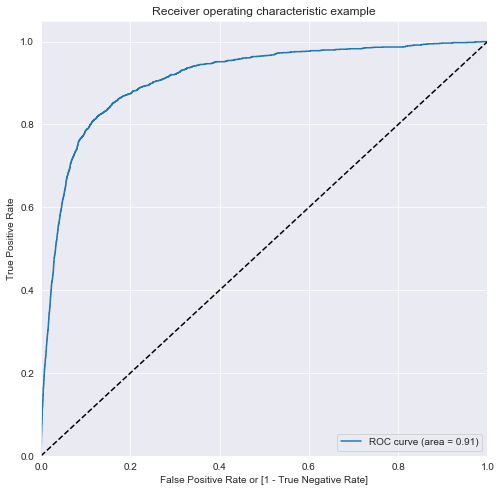

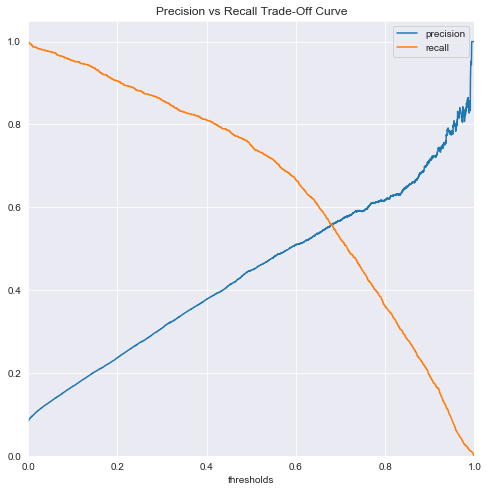

thresh  accuracy      prec     recal
0.00    0.00  0.081538  0.081538  1.000000
0.05    0.05  0.468893  0.130710  0.975768
0.10    0.10  0.609850  0.167635  0.954492
0.15    0.15  0.695436  0.203029  0.934988
0.20    0.20  0.754277  0.236749  0.905437
0.25    0.25  0.799335  0.273377  0.881206
0.30    0.30  0.831333  0.308231  0.858747
0.35    0.35  0.857067  0.343949  0.829787
0.40    0.40  0.875765  0.377961  0.810875
0.45    0.45  0.890993  0.411710  0.785461
0.50    0.50  0.904294  0.448020  0.748818
0.55    0.55  0.913546  0.479746  0.713948
0.60    0.60  0.920582  0.509955  0.666076
0.65    0.65  0.925257  0.537047  0.604019
0.70    0.70  0.928823  0.569043  0.523641
0.75    0.75  0.929690  0.591087  0.446809
0.80    0.80  0.929642  0.617172  0.361111
0.85    0.85  0.928967  0.649725  0.279551
0.90    0.90  0.927811  0.713656  0.191489
0.95    0.95  0.923474  0.779570  0.085697
1.00    1.00  0.918462  0.000000  0.000000

In [343]:
# Finalizing the model based on the hyper parameter tuned above
log_m = LogisticRegression(C = 0.1, penalty = 'l1', n_jobs = -1, class_weight= {0:1,1:5}, random_state = 0)
log_m.fit(X_train, y_train)

# cross validation roc_auc score for the train data
cv_auc_score = cross_val_score(log_m, X_train, y_train, scoring= 'roc_auc', cv = 5, n_jobs = -1, verbose = 1)
cv_f1_score = cross_val_score(log_m, X_train, y_train, scoring= 'f1', cv = 5, n_jobs = -1, verbose = 1)
print('The Cross-validation auc score mean on train dataset is {}'.format(cv_auc_score.mean().round(4)))
print('The Cross-validation auc score std on train dataset is {}'.format(cv_auc_score.std().round(4)))
print('The Cross-validation f1score mean on train dataset is {}'.format(cv_f1_score.mean().round(4)))
print('The Cross-validation f1score std on train dataset is {}'.format(cv_f1_score.std().round(4)))
# metrics for the train data
print('---------Train Data Metrics------------')
classification_rep(y_train, X_train, log_m)
metrics_curves(y_train, X_train, log_m)

In [344]:
# evaluation on test dataset
classification_rep(y_test, X_test, log_m)

The roc_auc score is 0.8927
confusion matrix:
[[7533  736]
 [ 209  523]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8269
           1       0.42      0.71      0.53       732

    accuracy                           0.90      9001
   macro avg       0.69      0.81      0.73      9001
weighted avg       0.93      0.90      0.91      9001



In [359]:
# appending the model and results for comparison later on
model_results.loc[0] = ['Log Reg weight_tuned', 'tuned_f1_score', 'PCA', 0.9126, 0.9039,0.0037, 0.8927, 0.56, 0.53]
model_results

Model                 Description original/PCA  \
0  Log Reg weight_tuned              tuned_f1_score          PCA   
1           Log Reg SMT  With SMOTE and tuned to f1          PCA   

   Train_auc_mean  cv_auc_mean  cv_auc_std  test_auc_mean  train_f1_score  \
0          0.9126       0.9039      0.0037         0.8927            0.56   
1          0.9268       0.9023      0.0070         0.8882            0.86   

   test_f1_score  
0           0.53  
1           0.45

#### Using smote for Logistic Regression

In [346]:
# using SMOTE to oversample and produce a balance datase
smt = SMOTE(random_state = 0, n_jobs = -1)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

print(y_train.value_counts())
np.unique(y_train_smt, return_counts=True)

0    19059
1     1692
Name: churn, dtype: int64


(array([0, 1], dtype=int64), array([19059, 19059], dtype=int64))

The roc_auc score is 0.9267
confusion matrix:
[[16098  2961]
 [ 2358 16701]]
classification report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86     19059
           1       0.85      0.88      0.86     19059

    accuracy                           0.86     38118
   macro avg       0.86      0.86      0.86     38118
weighted avg       0.86      0.86      0.86     38118



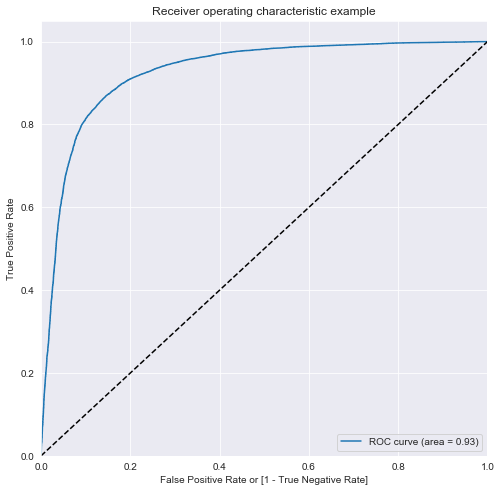

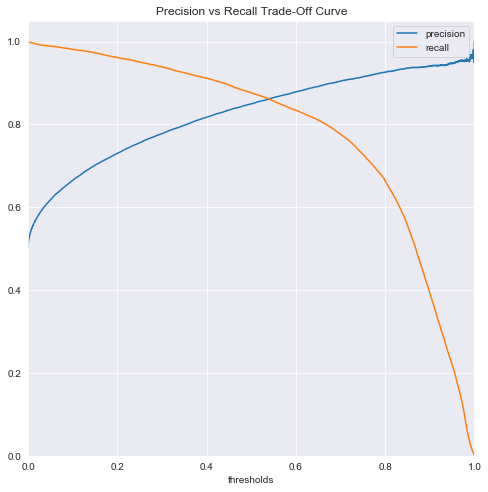

thresh  accuracy      prec     recal
0.00    0.00  0.500000  0.500000  1.000000
0.05    0.05  0.688966  0.618109  0.988929
0.10    0.10  0.743481  0.664984  0.981374
0.15    0.15  0.779553  0.701589  0.972926
0.20    0.20  0.803243  0.730250  0.961750
0.25    0.25  0.821712  0.755831  0.950470
0.30    0.30  0.835353  0.777807  0.938926
0.35    0.35  0.845296  0.797918  0.924812
0.40    0.40  0.853901  0.817382  0.911433
0.45    0.45  0.859122  0.834875  0.895325
0.50    0.50  0.860460  0.849405  0.876279
0.55    0.55  0.861325  0.864925  0.856393
0.60    0.60  0.859594  0.878877  0.834147
0.65    0.65  0.855895  0.891673  0.810221
0.70    0.70  0.847290  0.904634  0.776431
0.75    0.75  0.830290  0.914854  0.728370
0.80    0.80  0.805656  0.926433  0.664043
0.85    0.85  0.759169  0.936236  0.556220
0.90    0.90  0.683850  0.941199  0.392203
0.95    0.95  0.603862  0.947345  0.219949
1.00    1.00  0.500000  0.000000  0.000000

In [347]:
# Creating logistic model with class_weight = balanced
log_m_smt = LogisticRegression(random_state = 0, n_jobs = -1)
log_m_smt.fit(X_train_smt, y_train_smt)

# metrics on the oversampled train dataset
classification_rep(y_train_smt, X_train_smt, log_m_smt)
metrics_curves(y_train_smt, X_train_smt, log_m_smt)

In [348]:
#- Hyper-parametr tuning using gridsearch- penalty (regularization) and C - regularization
lr_m = LogisticRegression(random_state = 0, n_jobs = -1)
params = {'penalty' : ['l1', 'l2'], 'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight': 
          ['balanced', {0:1, 1:1}, {0:1, 1:5}, {0:1, 1:5}, {0:1, 1:10}, {0:1, 1:50}, {0:1,1:100}]}

# using the gridsearch function created for grid search and tuning hyper parameter
cv_results = gridsearch_classifier(lr_m, params, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'], X_train_smt, y_train_smt, 'f1')
cv_results[['param_C', 'param_penalty', 'mean_test_recall', 'param_class_weight', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_roc_auc', 'mean_test_f1']].sort_values(by = 'mean_test_f1', ascending = False).head(10)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:  1.8min finished


{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}


param_C param_penalty  mean_test_recall param_class_weight  \
98      100            l1          0.875544           balanced   
87       10            l2          0.875544       {0: 1, 1: 1}   
100     100            l1          0.875544       {0: 1, 1: 1}   
85       10            l2          0.875544           balanced   
99      100            l2          0.875544           balanced   
113    1000            l2          0.875544           balanced   
115    1000            l2          0.875544       {0: 1, 1: 1}   
101     100            l2          0.875544       {0: 1, 1: 1}   
71        1            l2          0.875544           balanced   
73        1            l2          0.875544       {0: 1, 1: 1}   

     mean_test_accuracy  mean_test_precision  mean_test_roc_auc  mean_test_f1  
98             0.860066             0.849274           0.925250      0.862205  
87             0.860066             0.849274           0.925250      0.862205  
100            0.860066             0.849274           0.925250      0.862205  
85             0.860066             0.849274           0.925250      0.862205  
99             0.860040             0.849230           0.925251      0.862182  
113            0.860040             0.849230           0.925251      0.862182  
115            0.860040             0.849230           0.925251      0.862182  
101            0.860040             0.849230           0.925251      0.862182  
71             0.860040             0.849230           0.925250      0.862182  
73             0.860040             0.849230           0.925250      0.862182

The roc_auc score is 0.9268
confusion matrix:
[[16101  2958]
 [ 2359 16700]]
classification report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86     19059
           1       0.85      0.88      0.86     19059

    accuracy                           0.86     38118
   macro avg       0.86      0.86      0.86     38118
weighted avg       0.86      0.86      0.86     38118



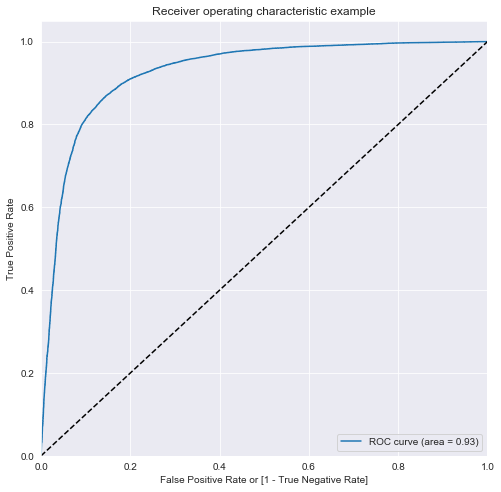

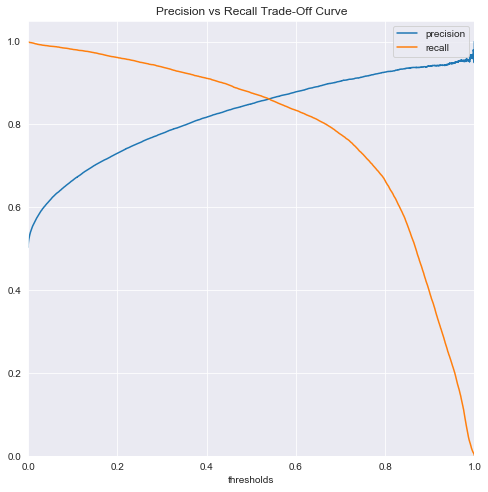

thresh  accuracy      prec     recal
0.00    0.00  0.500000  0.500000  1.000000
0.05    0.05  0.689123  0.618231  0.988929
0.10    0.10  0.743743  0.665232  0.981321
0.15    0.15  0.779684  0.701722  0.972926
0.20    0.20  0.803400  0.730406  0.961803
0.25    0.25  0.821869  0.756020  0.950470
0.30    0.30  0.835485  0.778024  0.938822
0.35    0.35  0.845375  0.798053  0.924760
0.40    0.40  0.853927  0.817420  0.911433
0.45    0.45  0.859122  0.834973  0.895168
0.50    0.50  0.860512  0.849527  0.876226
0.55    0.55  0.861430  0.865070  0.856446
0.60    0.60  0.859568  0.878828  0.834147
0.65    0.65  0.855895  0.891719  0.810168
0.70    0.70  0.847316  0.904689  0.776431
0.75    0.75  0.830238  0.914843  0.728265
0.80    0.80  0.805656  0.926433  0.664043
0.85    0.85  0.759195  0.936165  0.556325
0.90    0.90  0.684112  0.941162  0.392780
0.95    0.95  0.603940  0.947380  0.220106
1.00    1.00  0.500000  0.000000  0.000000

In [349]:
# Finalizing the model based on above hyper parameter tuning
log_m_smt = LogisticRegression(C = 100, penalty = 'l1', random_state = 0, n_jobs = -1)
log_m_smt.fit(X_train_smt, y_train_smt)

# revised metrics on the oversampled train dataset
classification_rep(y_train_smt, X_train_smt, log_m_smt)
metrics_curves(y_train_smt, X_train_smt, log_m_smt)

In [350]:
# Based on the function created for cross-validation smote
results = repeated_evaluation_smote(log_m_smt, X_train, y_train)
results.mean(), results.std()

(train_auc_scores    0.928544
 test_auc_scores     0.902367
 train_pr_scores     0.852519
 test_pr_scores      0.324136
 train_re_scores     0.879624
 test_re_scores      0.832740
 train_acc_scores    0.863726
 test_acc_scores     0.844586
 dtype: float64, train_auc_scores    0.001697
 test_auc_scores     0.007163
 train_pr_scores     0.001335
 test_pr_scores      0.011348
 train_re_scores     0.003083
 test_re_scores      0.021663
 train_acc_scores    0.001511
 test_acc_scores     0.007336
 dtype: float64)

In [351]:
# Evaluating the model on test dataset
classification_rep(y_test, X_test, log_m_smt)

The roc_auc score is 0.8882
confusion matrix:
[[6988 1281]
 [ 144  588]]
classification report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8269
           1       0.31      0.80      0.45       732

    accuracy                           0.84      9001
   macro avg       0.65      0.82      0.68      9001
weighted avg       0.93      0.84      0.87      9001



In [360]:
# appending the model and results to the dataframe
model_results.loc[1] = ['Log Reg SMT', 'With SMOTE and tuned to f1', 'PCA', 0.9268, 0.9023,0.007, 0.8882, 0.86, 0.45]
model_results

Model                 Description original/PCA  \
0  Log Reg weight_tuned              tuned_f1_score          PCA   
1           Log Reg SMT  With SMOTE and tuned to f1          PCA   

   Train_auc_mean  cv_auc_mean  cv_auc_std  test_auc_mean  train_f1_score  \
0          0.9126       0.9039      0.0037         0.8927            0.56   
1          0.9268       0.9023      0.0070         0.8882            0.86   

   test_f1_score  
0           0.53  
1           0.45

### 6.2 Random Forest Model <a id='VI.2'></a>

#### Random Forest Model with no oversampling techniques

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


The roc_auc score is 0.9714
confusion matrix:
[[19056     3]
 [ 1077   615]]
classification report:


[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           0       0.95      1.00      0.97     19059
           1       1.00      0.36      0.53      1692

    accuracy                           0.95     20751
   macro avg       0.97      0.68      0.75     20751
weighted avg       0.95      0.95      0.94     20751



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished


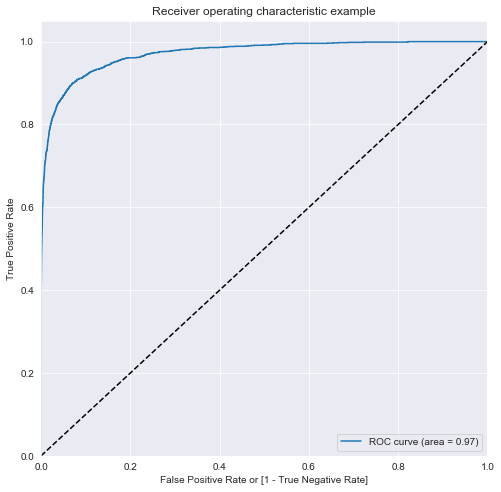

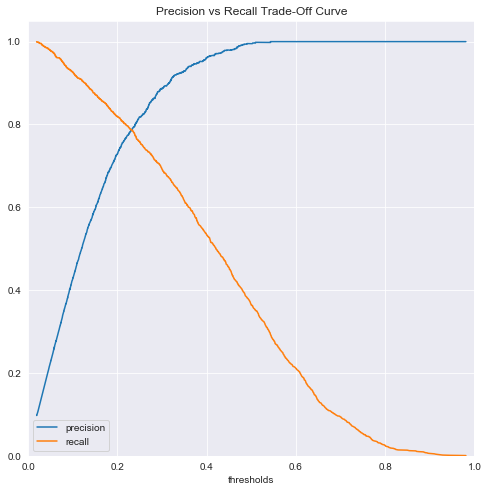

In [871]:
# using a base model with 40 trees
rf_m = RandomForestClassifier(n_estimators = 40, max_depth =10, n_jobs = -1, random_state = 0, oob_score= True, verbose = 1)
rf_m.fit(X_train, y_train)

classification_rep(y_train, X_train, rf_m)
results_df = metrics_curves(y_train, X_train, rf_m)
results_df

In [872]:
# Tuning hyper parameters - Tuning n_estimators, max_depth, min_samples split and max_features
rf_m = RandomForestClassifier(random_state = 0, n_jobs = -1, class_weight= 'balanced', verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [10,20], 'n_estimators' : [100], 'max_depth' : [5,10,12], 'max_features' : ['auto', 0.2, 0.5, 0.8]}

# using the gridsearch for identifying best parameters
cv_results = gridsearch_classifier(rf_m, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'], X_train, y_train, 'roc_auc')
cv_results[cv_results['rank_test_roc_auc'] == 1]

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 10.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.7s finished


{'max_depth': 10, 'max_features': 0.5, 'min_samples_split': 20, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13      70.925975      3.023731        18.290533         3.64519   

   param_max_depth param_max_features param_min_samples_split  \
13              10                0.5                      20   

   param_n_estimators                                             params  \
13                100  {'max_depth': 10, 'max_features': 0.5, 'min_sa...   

    split0_test_recall  split1_test_recall  split2_test_recall  \
13             0.54078            0.537234            0.572695   

    mean_test_recall  std_test_recall  rank_test_recall  split0_train_recall  \
13          0.550236         0.015946                10             0.952128   

    split1_train_recall  split2_train_recall  mean_train_recall  \
13             0.942376             0.953901           0.949468   

    std_train_recall  split0_test_accuracy  split1_test_accuracy  \
13          0.005067              0.908631              0.914992   

    split2_test_accuracy  mean_test_accuracy  std_test_accuracy  \
13               0.91051            0.911378           0.002668   

    rank_test_accuracy  split0_train_accuracy  split1_train_accuracy  \
13                  14               0.960243               0.949328   

    split2_train_accuracy  mean_train_accuracy  std_train_accuracy  \
13               0.952581              0.95405            0.004576   

    split0_test_precision  split1_test_precision  split2_test_precision  \
13               0.449853               0.480952                0.46077   

    mean_test_precision  std_test_precision  rank_test_precision  \
13             0.463858            0.012883                   14   

    split0_train_precision  split1_train_precision  split2_train_precision  \
13                0.684076                0.625662                0.640476   

    mean_train_precision  std_train_precision  split0_test_roc_auc  \
13              0.650072             0.024794             0.895251   

    split1_test_roc_auc  split2_test_roc_auc  mean_test_roc_auc  \
13             0.888478             0.898211            0.89398   

    std_test_roc_auc  rank_test_roc_auc  split0_train_roc_auc  \
13          0.004074                  1              0.985901   

    split1_train_roc_auc  split2_train_roc_auc  mean_train_roc_auc  \
13              0.982184               0.98294            0.983675   

    std_train_roc_auc  split0_test_f1  split1_test_f1  split2_test_f1  \
13           0.001604        0.491143        0.507538        0.510672   

    mean_test_f1  std_test_f1  rank_test_f1  split0_train_f1  split1_train_f1  \
13      0.503118     0.008563             3         0.796145         0.752034   

    split2_train_f1  mean_train_f1  std_train_f1  
13         0.766382        0.77152      0.018371

In [875]:
# further fine tuning - max_depth based on the earlier estimate
# Trying higher values for min_samples split and min_samples leaf
rf_m = RandomForestClassifier(random_state = 0, n_jobs = -1, class_weight= 'balanced', verbose=1, oob_score = True)
params_rf = {'min_samples_split' : range(20,100,40), 'n_estimators' : [100], 'max_depth' : [8,9,10,], 'max_features' : ['auto', 0.5], 'min_samples_leaf' :range(10,110,50)}

# using the gridsearch for identifying best parameters
cv_results = gridsearch_classifier(rf_m, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'], X_train, y_train, 'roc_auc')
cv_results[cv_results['rank_test_roc_auc'] == 1]

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  6.6min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.4s finished


{'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
20      47.975056      0.622257        13.067395        0.110772   

   param_max_depth param_max_features param_min_samples_leaf  \
20              10                0.5                     10   

   param_min_samples_split param_n_estimators  \
20                      20                100   

                                               params  split0_test_recall  \
20  {'max_depth': 10, 'max_features': 0.5, 'min_sa...            0.585106   

    split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
20            0.553191            0.588652           0.57565         0.015946   

    rank_test_recall  split0_train_recall  split1_train_recall  \
20                23             0.937943              0.93883   

    split2_train_recall  mean_train_recall  std_train_recall  \
20             0.950355           0.942376          0.005653   

    split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
20               0.91051              0.913691              0.909787   

    mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
20             0.91133           0.001696                   2   

    split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
20               0.955978               0.947231               0.950195   

    mean_train_accuracy  std_train_accuracy  split0_test_precision  \
20             0.951135            0.003632               0.461538   

    split1_test_precision  split2_test_precision  mean_test_precision  \
20               0.474886               0.458564             0.464996   

    std_test_precision  rank_test_precision  split0_train_precision  \
20            0.007098                    2                0.662492   

    split1_train_precision  split2_train_precision  mean_train_precision  \
20                0.615698                0.628739              0.635643   

    std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
20             0.019718             0.897357             0.890469   

    split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
20             0.902181           0.896669          0.004806   

    rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
20                  1              0.985081              0.981988   

    split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
20              0.982652             0.98324            0.00133   

    split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
20        0.516028        0.511057        0.515528      0.514204     0.002235   

    rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
20             6         0.776514          0.74368         0.756795   

    mean_train_f1  std_train_f1  
20       0.758996      0.013494

In [876]:
 # further tuning min_samples_split and min_samples_leaf
rf_m = RandomForestClassifier(random_state = 0, n_jobs = -1, class_weight= 'balanced', verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [5,10,20], 'n_estimators' : [100], 'max_depth' : [10], 'max_features' : [0.5], 'min_samples_leaf' :[5,10]}

cv_results = gridsearch_classifier(rf_m, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'], X_train, y_train, 'roc_auc')
cv_results[cv_results['rank_test_roc_auc'] == 1]

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  2.3min remaining:   53.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.5min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.9s finished


{'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      34.970496      4.164578        18.800399        6.016254   
4      38.635697      2.303675         7.083393        1.585359   
5      25.477219      8.401060         3.500301        4.096165   

  param_max_depth param_max_features param_min_samples_leaf  \
3              10                0.5                     10   
4              10                0.5                     10   
5              10                0.5                     10   

  param_min_samples_split param_n_estimators  \
3                       5                100   
4                      10                100   
5                      20                100   

                                              params  split0_test_recall  \
3  {'max_depth': 10, 'max_features': 0.5, 'min_sa...            0.585106   
4  {'max_depth': 10, 'max_features': 0.5, 'min_sa...            0.585106   
5  {'max_depth': 10, 'max_features': 0.5, 'min_sa...            0.585106   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
3            0.553191            0.588652           0.57565         0.015946   
4            0.553191            0.588652           0.57565         0.015946   
5            0.553191            0.588652           0.57565         0.015946   

   rank_test_recall  split0_train_recall  split1_train_recall  \
3                 1             0.937943              0.93883   
4                 1             0.937943              0.93883   
5                 1             0.937943              0.93883   

   split2_train_recall  mean_train_recall  std_train_recall  \
3             0.950355           0.942376          0.005653   
4             0.950355           0.942376          0.005653   
5             0.950355           0.942376          0.005653   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
3               0.91051              0.913691              0.909787   
4               0.91051              0.913691              0.909787   
5               0.91051              0.913691              0.909787   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
3             0.91133           0.001696                   3   
4             0.91133           0.001696                   3   
5             0.91133           0.001696                   3   

   split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
3               0.955978               0.947231               0.950195   
4               0.955978               0.947231               0.950195   
5               0.955978               0.947231               0.950195   

   mean_train_accuracy  std_train_accuracy  split0_test_precision  \
3             0.951135            0.003632               0.461538   
4             0.951135            0.003632               0.461538   
5             0.951135            0.003632               0.461538   

   split1_test_precision  split2_test_precision  mean_test_precision  \
3               0.474886               0.458564             0.464996   
4               0.474886               0.458564             0.464996   
5               0.474886               0.458564             0.464996   

   std_test_precision  rank_test_precision  split0_train_precision  \
3            0.007098                    3                0.662492   
4            0.007098                    3                0.662492   
5            0.007098                    3                0.662492   

   split1_train_precision  split2_train_precision  mean_train_precision  \
3                0.615698                0.628739              0.635643   
4                0.615698                0.628739              0.635643   
5                0.615698                0.628739              0.635643   

   std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
3             0.019718             0.897357             0.890469   
4             0.019718   

The roc_auc score is 0.9803
confusion matrix:
[[18033  1026]
 [  115  1577]]
classification report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     19059
           1       0.61      0.93      0.73      1692

    accuracy                           0.95     20751
   macro avg       0.80      0.94      0.85     20751
weighted avg       0.96      0.95      0.95     20751



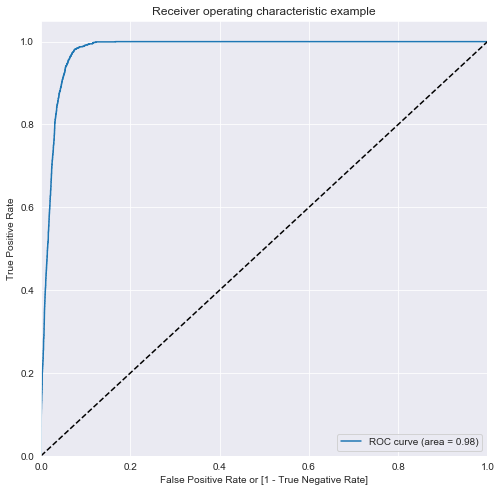

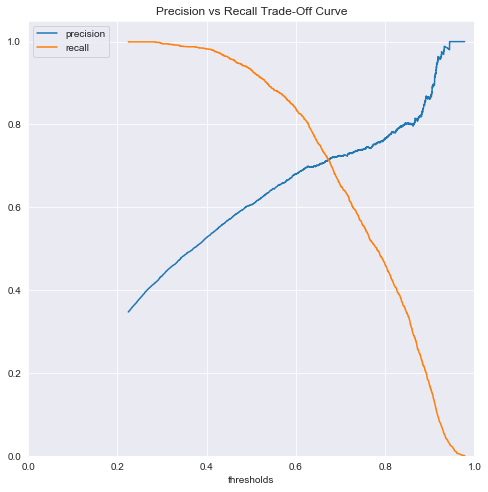

In [48]:
# using the finetuned hyper-parameters
# increasing the number of trees based on previous reuslt
rf_m1 = RandomForestClassifier(max_depth= 10, max_features = 0.5, min_samples_split = 20, n_estimators= 600, min_samples_leaf = 10, random_state = 0, n_jobs = -1, class_weight = 'balanced')
rf_m1.fit(X_train, y_train)
classification_rep(y_train, X_train, rf_m1)
metrics_curves(y_train, X_train, rf_m1)

In [49]:
# cross validation on the train dataset to see the cross val score
cv_score = cross_val_score(rf_m1, X_train, y_train, cv =5, n_jobs = -1, scoring = 'roc_auc')
cv_score.mean(), cv_score.std()

(0.8990228692633361, 0.0024455006240167027)

In [50]:
# evaluation on test_dataset
classification_rep(y_test, X_test, rf_m1)

The roc_auc score is 0.8876
confusion matrix:
[[7752  517]
 [ 317  415]]
classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8269
           1       0.45      0.57      0.50       732

    accuracy                           0.91      9001
   macro avg       0.70      0.75      0.72      9001
weighted avg       0.92      0.91      0.91      9001



In [361]:
model_results.loc[2] = ['Random Forest', 'tuned to roc_auc', 'PCA', 0.9803, 0.899,0.0024, 0.8876, 0.73, 0.50]
model_results

Model                 Description original/PCA  \
0  Log Reg weight_tuned              tuned_f1_score          PCA   
1           Log Reg SMT  With SMOTE and tuned to f1          PCA   
2         Random Forest            tuned to roc_auc          PCA   

   Train_auc_mean  cv_auc_mean  cv_auc_std  test_auc_mean  train_f1_score  \
0          0.9126       0.9039      0.0037         0.8927            0.56   
1          0.9268       0.9023      0.0070         0.8882            0.86   
2          0.9803       0.8990      0.0024         0.8876            0.73   

   test_f1_score  
0           0.53  
1           0.45  
2           0.50

#### Random Forest with Smote (oversampling minority)

In [883]:
# estimating the max_depth
rf_m_smt= RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [20], 'n_estimators' : [100], 'max_depth' : [15,20, 25], 'max_features' : [0.5], 'min_samples_leaf' :[20]}

#using gridsearch function for cross_validation and fitting the data
cv_results = gridsearch_classifier(rf_m_smt, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'], X_train_smt, y_train_smt, 'roc_auc')
cv_results[cv_results['rank_test_roc_auc'] == 1]

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  2.7min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   42.6s finished


{'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1     155.838323      0.486717         1.771264        0.368303   

  param_max_depth param_max_features param_min_samples_leaf  \
1              20                0.5                     20   

  param_min_samples_split param_n_estimators  \
1                      20                100   

                                              params  split0_test_recall  \
1  {'max_depth': 20, 'max_features': 0.5, 'min_sa...             0.92114   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
1             0.92413            0.910593          0.918621         0.005806   

   rank_test_recall  split0_train_recall  split1_train_recall  \
1                 2             0.956949             0.956792   

   split2_train_recall  mean_train_recall  std_train_recall  \
1             0.956556           0.956766          0.000162   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
1               0.90839              0.916968               0.90713   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
1             0.91083           0.004371                   1   

   split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
1               0.946954               0.945419               0.945656   

   mean_train_accuracy  std_train_accuracy  split0_test_precision  \
1              0.94601            0.000675               0.898235   

   split1_test_precision  split2_test_precision  mean_test_precision  \
1                0.91108                0.90433             0.904548   

   std_test_precision  rank_test_precision  split0_train_precision  \
1            0.005246                    1                0.938194   

   split1_train_precision  split2_train_precision  mean_train_precision  \
1                0.935514                0.936147              0.936618   

   std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
1             0.001144             0.964073             0.970717   

   split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
1             0.966136           0.966975          0.002776   

   rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
1                  1              0.988471              0.987834   

   split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
1              0.988238            0.988181           0.000263   

   split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
1        0.909543        0.917559        0.907451      0.911518     0.004356   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
1             1         0.947479         0.946033         0.946242   

   mean_train_f1  std_train_f1  
1       0.946585      0.000638

In [886]:
# further finetuning max_depth
rf_m_smt= RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [20], 'n_estimators' : [100], 'max_depth' : [20, 22, 24, 25], 'max_features' : [0.5], 'min_samples_leaf' :[20]}

#using gridsearch function for cross_validation and fitting the data
cv_results = gridsearch_classifier(rf_m_smt, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'], X_train_smt, y_train_smt, 'roc_auc')
cv_results[cv_results['rank_test_roc_auc'] == 1]

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:  3.2min remaining:  6.5min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.9s finished


{'max_depth': 22, 'max_features': 0.5, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1     171.241139      0.352939         3.921514        1.181876   

  param_max_depth param_max_features param_min_samples_leaf  \
1              22                0.5                     20   

  param_min_samples_split param_n_estimators  \
1                      20                100   

                                              params  split0_test_recall  \
1  {'max_depth': 22, 'max_features': 0.5, 'min_sa...            0.920825   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
1            0.922241            0.912325          0.918464         0.004379   

   rank_test_recall  split0_train_recall  split1_train_recall  \
1                 2             0.957107             0.956241   

   split2_train_recall  mean_train_recall  std_train_recall  \
1             0.957973           0.957107          0.000707   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
1              0.907445              0.916024              0.906658   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
1            0.910042           0.004242                   3   

   split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
1               0.947033               0.944908               0.946797   

   mean_train_accuracy  std_train_accuracy  split0_test_precision  \
1             0.946246            0.000951               0.896827   

   split1_test_precision  split2_test_precision  mean_test_precision  \
1               0.910914               0.902101             0.903281   

   std_test_precision  rank_test_precision  split0_train_precision  \
1            0.005811                    4                0.938204   

   split1_train_precision  split2_train_precision  mean_train_precision  \
1                0.935047                0.937028               0.93676   

   std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
1             0.001303             0.964047             0.970909   

   split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
1             0.966288           0.967081          0.002857   

   rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
1                  1              0.988628              0.987997   

   split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
1              0.988417            0.988347           0.000263   

   split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
1        0.908667        0.916543        0.907184      0.910798     0.004107   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
1             2         0.947561         0.945525         0.947385   

   mean_train_f1  std_train_f1  
1       0.946824      0.000921

In [887]:
# Tuning n_samples_split and samples_leaf and max_features
rf_m_smt= RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [10, 20, 50], 'n_estimators' : [100], 'max_depth' : [22], 'max_features' : [0.5], 'min_samples_leaf' :[10, 20, 50]}

#using gridsearch function for cross_validation and fitting the data
cv_results = gridsearch_classifier(rf_m_smt, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'], X_train_smt, y_train_smt, 'roc_auc')
cv_results[cv_results['rank_test_roc_auc'] == 1]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 10.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   47.3s finished


{'max_depth': 22, 'max_features': 0.5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     118.950931      0.217718        20.873196        0.160288   
1     136.245377      9.117534        22.606223        1.110006   

  param_max_depth param_max_features param_min_samples_leaf  \
0              22                0.5                     10   
1              22                0.5                     10   

  param_min_samples_split param_n_estimators  \
0                      10                100   
1                      20                100   

                                              params  split0_test_recall  \
0  {'max_depth': 22, 'max_features': 0.5, 'min_sa...            0.947112   
1  {'max_depth': 22, 'max_features': 0.5, 'min_sa...            0.947112   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
0            0.944593            0.935936          0.942547         0.004786   
1            0.944593            0.935936          0.942547         0.004786   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 1             0.982921             0.981584   
1                 1             0.982921             0.981584   

   split2_train_recall  mean_train_recall  std_train_recall  \
0             0.982056           0.982187          0.000554   
1             0.982056           0.982187          0.000554   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
0              0.928538              0.934047              0.924917   
1              0.928538              0.934047              0.924917   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
0            0.929167           0.003754                   1   
1            0.929167           0.003754                   1   

   split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
0               0.972178               0.970368               0.971746   
1               0.972178               0.970368               0.971746   

   mean_train_accuracy  std_train_accuracy  split0_test_precision  \
0             0.971431            0.000772               0.913189   
1             0.971431            0.000772               0.913189   

   split1_test_precision  split2_test_precision  mean_test_precision  \
0               0.925081               0.915755             0.918008   
1               0.925081               0.915755             0.918008   

   std_test_precision  rank_test_precision  split0_train_precision  \
0             0.00511                    1                0.962247   
1             0.00511                    1                0.962247   

   split1_train_precision  split2_train_precision  mean_train_precision  \
0                0.960049                0.962215              0.961504   
1                0.960049                0.962215              0.961504   

   std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
0             0.001028             0.973668             0.979474   
1             0.001028             0.973668             0.979474   

   split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
0             0.975593           0.976245          0.002415   
1             0.975593           0.976245          0.002415   

   rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
0                  1              0.996639              0.996478   
1                  1              0.996639              0.996478   

   split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
0              0.996556            0.996558           0.000066   
1              0.996556            0.996558           0.000066   

   split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
0        0.929841        0.934735        0.925736      0.930104     0.003679   
1        0.929841        0.934735        0.925736      0.930104     0.003679   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
0       

In [890]:
# fineTuning n_samples_split and samples_leaf and max_features
rf_m_smt= RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [15, 20, 25], 'n_estimators' : [100], 'max_depth' : [22], 'max_features' : [0.5], 'min_samples_leaf' :[5, 10, 15]}

#using gridsearch function for cross_validation and fitting the data
cv_results = gridsearch_classifier(rf_m_smt, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'], X_train_smt, y_train_smt, 'roc_auc')
cv_results[cv_results['rank_test_roc_auc'] == 1]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 11.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   45.3s finished


{'max_depth': 22, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     194.002614      2.622366         3.976701        2.240674   

  param_max_depth param_max_features param_min_samples_leaf  \
0              22                0.5                      5   

  param_min_samples_split param_n_estimators  \
0                      15                100   

                                              params  split0_test_recall  \
0  {'max_depth': 22, 'max_features': 0.5, 'min_sa...             0.95451   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
0            0.954982            0.943334          0.950942         0.005383   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 1             0.991736             0.991185   

   split2_train_recall  mean_train_recall  std_train_recall  \
0             0.992287           0.991736           0.00045   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
0              0.934991              0.943727              0.932866   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
0            0.937195             0.0047                   1   

   split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
0               0.983354               0.982134               0.983276   

   mean_train_accuracy  std_train_accuracy  split0_test_precision  \
0             0.982921            0.000557               0.918649   

   split1_test_precision  split2_test_precision  mean_test_precision  \
0               0.933959                0.92399             0.925533   

   std_test_precision  rank_test_precision  split0_train_precision  \
0            0.006345                    1                0.975385   

   split1_train_precision  split2_train_precision  mean_train_precision  \
0                0.973562                 0.97472              0.974556   

   std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
0             0.000753             0.978338              0.98331   

   split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
0             0.979927           0.980525          0.002073   

   rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
0                  1              0.998579               0.99849   

   split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
0               0.99861             0.99856           0.000051   

   split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
0        0.936236        0.944354        0.933562       0.93805     0.004589   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
0             1         0.983493         0.982295         0.983425   

   mean_train_f1  std_train_f1  
0       0.983071      0.000549

In [892]:
# Tuning max features
rf_m_smt= RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [15], 'n_estimators' : [100], 'max_depth' : [22], 'max_features' : [0.5, 'auto', 0.2, 0.8], 'min_samples_leaf' :[5]}

#using gridsearch function for cross_validation and fitting the data
cv_results = gridsearch_classifier(rf_m_smt, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'], X_train_smt, y_train_smt, 'roc_auc')
cv_results[cv_results['rank_test_roc_auc'] == 1]

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:  2.0min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.3min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.1s finished


{'max_depth': 22, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1      42.450162      2.705683        25.106537        1.380983   

  param_max_depth param_max_features param_min_samples_leaf  \
1              22               auto                      5   

  param_min_samples_split param_n_estimators  \
1                      15                100   

                                              params  split0_test_recall  \
1  {'max_depth': 22, 'max_features': 'auto', 'min...            0.951047   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
1            0.951676            0.939556          0.947426         0.005571   

   rank_test_recall  split0_train_recall  split1_train_recall  \
1                 4             0.991343              0.99032   

   split2_train_recall  mean_train_recall  std_train_recall  \
1             0.989533           0.990398          0.000741   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
1              0.938454               0.94538               0.93507   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
1            0.939635           0.004291                   1   

   split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
1                0.98363               0.982174               0.982056   

   mean_train_accuracy  std_train_accuracy  split0_test_precision  \
1              0.98262            0.000716               0.927683   

   split1_test_precision  split2_test_precision  mean_test_precision  \
1               0.939841               0.931201             0.932909   

   std_test_precision  rank_test_precision  split0_train_precision  \
1            0.005108                    1                0.976283   

   split1_train_precision  split2_train_precision  mean_train_precision  \
1                0.974444                0.974953              0.975227   

   std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
1             0.000775             0.979671             0.984285   

   split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
1             0.980708           0.981555          0.001976   

   rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
1                  1              0.998426              0.998302   

   split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
1              0.998248            0.998325           0.000074   

   split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
1         0.93922        0.945722         0.93536      0.940101     0.004276   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
1             1         0.983755         0.982318         0.982189   

   mean_train_f1  std_train_f1  
1       0.982754       0.00071

In [52]:
# fitting the final model with tuned hyper parameters and more number of trees
rf_m_smt = RandomForestClassifier(max_depth= 22, max_features = 'auto', min_samples_split = 15, min_samples_leaf = 5, n_estimators= 600, random_state = 0, n_jobs = -1)
rf_m_smt.fit(X_train_smt, y_train_smt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=22, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
# Based on the function created for cross-validation smote, estimating cross_val_score
results = repeated_evaluation_smote(rf_m_smt, X_train, y_train)
results.mean(), results.std()

(train_auc_scores    0.998888
 test_auc_scores     0.901174
 train_pr_scores     0.978967
 test_pr_scores      0.476110
 train_re_scores     0.994504
 test_re_scores      0.582149
 train_acc_scores    0.986568
 test_acc_scores     0.913499
 dtype: float64, train_auc_scores    0.000100
 test_auc_scores     0.004332
 train_pr_scores     0.000661
 test_pr_scores      0.018835
 train_re_scores     0.000785
 test_re_scores      0.024743
 train_acc_scores    0.000357
 test_acc_scores     0.004136
 dtype: float64)

In [54]:
# evaluation on the test dataset
classification_rep(y_test, X_test, rf_m_smt)

The roc_auc score is 0.8905
confusion matrix:
[[7788  481]
 [ 330  402]]
classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8269
           1       0.46      0.55      0.50       732

    accuracy                           0.91      9001
   macro avg       0.71      0.75      0.72      9001
weighted avg       0.92      0.91      0.91      9001



In [362]:
# comparison of the models
model_results.loc[3] = ['RF SMT', 'With SMOTE and tuned to roc_auc', 'PCA', 0.9988, 0.9011,0.00432, 0.8905, 0.99, 0.50]
model_results

Model                      Description original/PCA  \
0  Log Reg weight_tuned                   tuned_f1_score          PCA   
1           Log Reg SMT       With SMOTE and tuned to f1          PCA   
2         Random Forest                 tuned to roc_auc          PCA   
3                RF SMT  With SMOTE and tuned to roc_auc          PCA   

   Train_auc_mean  cv_auc_mean  cv_auc_std  test_auc_mean  train_f1_score  \
0          0.9126       0.9039     0.00370         0.8927            0.56   
1          0.9268       0.9023     0.00700         0.8882            0.86   
2          0.9803       0.8990     0.00240         0.8876            0.73   
3          0.9988       0.9011     0.00432         0.8905            0.99   

   test_f1_score  
0           0.53  
1           0.45  
2           0.50  
3           0.50

### 6.3 GBM Classifier <a id='VI.3'></a>

#### GBM Classifier without SMOTE

In [58]:
# defining function gbm_fit for fitting the dataset and cross validation
def gbm_fit(gbm_m, X_train, y_train, req_cv = True, fimp = True, kfolds = 5):
    
    gbm_m.fit(X_train, y_train)
    classification_rep(y_train, X_train, gbm_m)
    
    if req_cv:
        cv_score = cross_val_score(gbm_m, X_train, y_train, cv = kfolds, n_jobs = -1, verbose =1, scoring = 'roc_auc')
        print('cross validation scores:')
        print('cv score mean is {}'.format(cv_score.mean()))
        print('cv score std is {}'.format(cv_score.std()))
    if fimp:
        feat_imp = pd.DataFrame({'features': X_train.columns, 'imp':gbm_m.feature_importances_})
        feat_imp.plot(kind = 'bar')
        plt.show()
    return cv_score

def plot_results(df_results, param, score):
    plt.figure(figsize= (8,6))
    plt.plot(df_results[param], df_results[score])
#     plt.plot(df_results[param], df_results['mean_train_score'], 'bo-')
    plt.title('{} vs {}'.format(score, param))
    plt.xlabel(param)
    plt.ylabel(score)
    plt.show()

In [925]:
# fitting the base model
gbm_m = GradientBoostingClassifier(random_state = 0)
gbm_fit(gbm_m, X_train, y_train, fimp = False)

The roc_auc score is 0.9359
confusion matrix:
[[18881   178]
 [ 1002   690]]
classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     19059
           1       0.79      0.41      0.54      1692

    accuracy                           0.94     20751
   macro avg       0.87      0.70      0.75     20751
weighted avg       0.94      0.94      0.93     20751



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


cross validation scores:
cv score mean is 0.8992591884889259
cv score std is 0.0031707197023897824


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.0s remaining:   37.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.2s finished


array([0.89428586, 0.8984398 , 0.89901867, 0.90409296, 0.90045865])

In [926]:
# Tuning n_estimator parameters for the alpha rate of 0.15
params1 = {'n_estimators':range(40,121,10)}

grid_search = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate =0.15, max_depth=8,
                                                  min_samples_split=500, min_samples_leaf=50, subsample=0.8, max_features='sqrt',
                                                  random_state=0), 
                        param_grid = params1, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   46.2s finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6       8.924936      0.309737         0.054455        0.010085   

  param_n_estimators                 params  split0_test_score  \
6                100  {'n_estimators': 100}           0.906869   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
6           0.900899           0.898368           0.905411           0.912486   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
6         0.904806        0.004905                1            0.993896   

   split1_train_score  split2_train_score  split3_train_score  \
6            0.992679            0.993469            0.994164   

   split4_train_score  mean_train_score  std_train_score  
6            0.991597          0.993161         0.000929

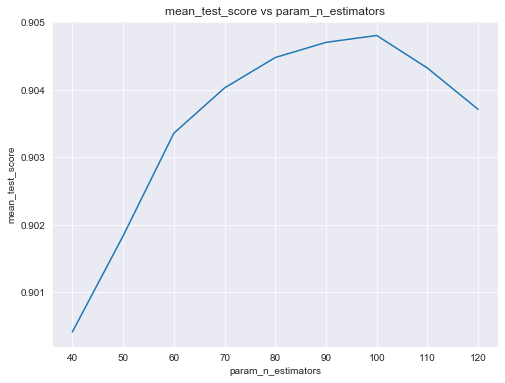

In [927]:
plot_results(final_cv_results, 'param_n_estimators', 'mean_test_score')

In [932]:
# Tuning max_depth and min_samples_split parameters
params2 = {'max_depth':range(4,15,2), 'min_samples_split': range(200,1100,200)}

# using grid_search to optimize max_depth and min_samples_split
grid_search = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate =0.15, n_estimators = 100, 
                                                                  min_samples_leaf=50, subsample=0.8, max_features='sqrt', 
                                                                  random_state=0), 
                        param_grid = params2, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.1min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13       8.280061      0.215859          0.04169        0.002309   

   param_max_depth param_min_samples_split  \
13               8                     800   

                                        params  split0_test_score  \
13  {'max_depth': 8, 'min_samples_split': 800}           0.911081   

    split1_test_score  split2_test_score  split3_test_score  \
13           0.903856           0.900079           0.911305   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
13           0.908948         0.907054        0.004399                1   

    split0_train_score  split1_train_score  split2_train_score  \
13            0.987399            0.988066            0.990025   

    split3_train_score  split4_train_score  mean_train_score  std_train_score  
13            0.987139             0.98562           0.98765         0.001432

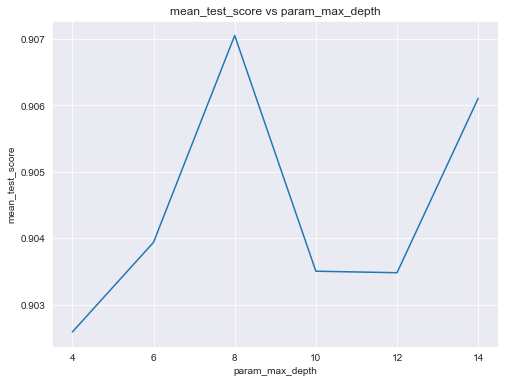

In [934]:
df_results = final_cv_results[final_cv_results['param_min_samples_split'] == 800]
plot_results(df_results, 'param_max_depth', 'mean_test_score')

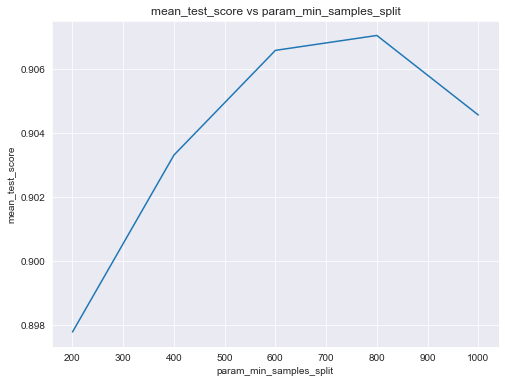

In [935]:
df_results = final_cv_results[final_cv_results['param_max_depth'] == 8]
plot_results(df_results, 'param_min_samples_split', 'mean_test_score')

In [939]:
# Tuning min_samples_split and min_samples_leaf parameters
params3 = {'min_samples_leaf':range(10,140,10), 'min_samples_split': range(800,2800,200)}

grid_search = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate =0.15, n_estimators = 100, max_depth = 8,
                                                                  min_samples_leaf=50, subsample=0.8, max_features='sqrt', 
                                                                  random_state=0), 
                        param_grid = params3, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 130 candidates, totalling 650 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 650 out of 650 | elapsed: 11.4min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
9       7.161659      0.324652         0.048664        0.011657   

  param_min_samples_leaf param_min_samples_split  \
9                     10                    2600   

                                              params  split0_test_score  \
9  {'min_samples_leaf': 10, 'min_samples_split': ...           0.910088   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
9           0.908622           0.903045           0.913937           0.909195   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
9         0.908977        0.003498                1            0.962546   

   split1_train_score  split2_train_score  split3_train_score  \
9            0.963467            0.962914            0.962112   

   split4_train_score  mean_train_score  std_train_score  
9            0.961502          0.962508         0.000672

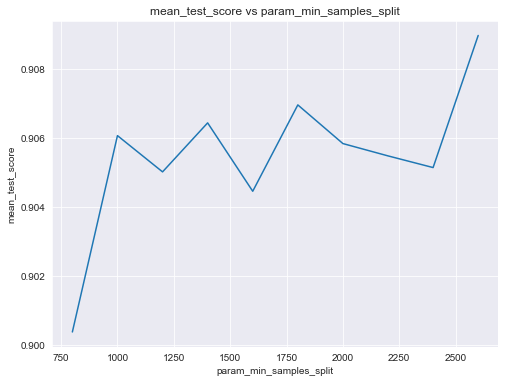

In [940]:
df_results = final_cv_results[final_cv_results['param_min_samples_leaf'] == 10]
plot_results(df_results, 'param_min_samples_split', 'mean_test_score')

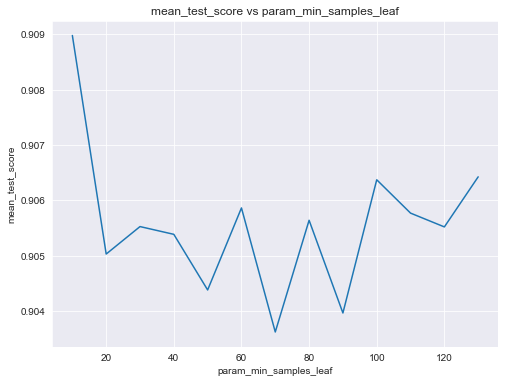

In [941]:
df_results = final_cv_results[final_cv_results['param_min_samples_split'] == 2600]
plot_results(df_results, 'param_min_samples_leaf', 'mean_test_score')

In [943]:
# Tuning max_features 
params4 = {'max_features': range(2,70,2)}

grid_search = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate =0.15, n_estimators = 100, max_depth = 8,
                                                                  min_samples_leaf=10, min_samples_split = 2600, subsample=0.8, 
                                                                  random_state=0), 
                        param_grid = params4, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:  8.8min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
11       15.54344      0.385566         0.034508        0.001954   

   param_max_features                params  split0_test_score  \
11                 24  {'max_features': 24}           0.908983   

    split1_test_score  split2_test_score  split3_test_score  \
11            0.89863           0.909043            0.91542   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
11           0.908256         0.908066        0.005385                1   

    split0_train_score  split1_train_score  split2_train_score  \
11            0.965559            0.969455            0.967523   

    split3_train_score  split4_train_score  mean_train_score  std_train_score  
11            0.968046            0.969154          0.967947         0.001387

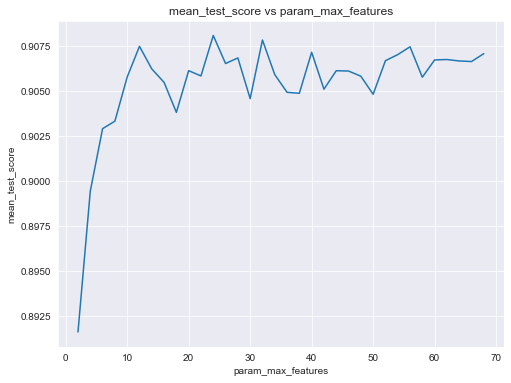

In [944]:
plot_results(final_cv_results, 'param_max_features', 'mean_test_score')

In [945]:
# Tuning sub_sample
params5 = {'subsample': [i/100 for i in range(60,100,5)]}

grid_search = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate =0.15, n_estimators = 100, max_depth = 8, max_features =24,
                                                                  min_samples_leaf=10, min_samples_split = 2600, subsample=0.8, 
                                                                  random_state=0), 
                        param_grid = params5, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.2min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4      14.259872      0.249304         0.032313         0.00101   

  param_subsample              params  split0_test_score  split1_test_score  \
4             0.8  {'subsample': 0.8}           0.908983            0.89863   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
4           0.909043            0.91542           0.908256         0.908066   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
4        0.005385                1            0.965559            0.969455   

   split2_train_score  split3_train_score  split4_train_score  \
4            0.967523            0.968046            0.969154   

   mean_train_score  std_train_score  
4          0.967947         0.001387

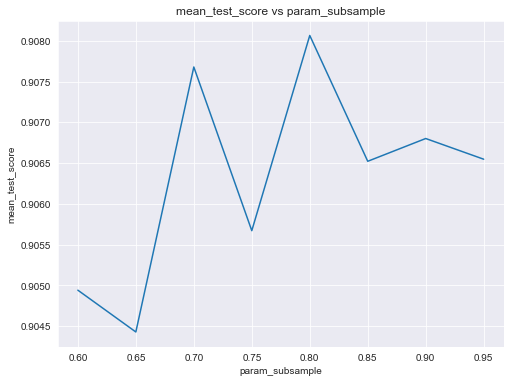

In [946]:
plot_results(final_cv_results, 'param_subsample', 'mean_test_score')

In [947]:
# Identifying the n_estimators for alpha rate of 0.05
params5 = {'n_estimators': range(200,2100,200)}

grid_search = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate =0.05, max_depth = 8, max_features =24,
                                                                  min_samples_leaf=10, min_samples_split = 2600, subsample=0.8, 
                                                                  random_state=0), 
                        param_grid = params5, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 19.1min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2      89.391657      1.792335         0.174733        0.017767   

  param_n_estimators                 params  split0_test_score  \
2                600  {'n_estimators': 600}           0.913024   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
2           0.903245           0.909953           0.919813           0.916067   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
2          0.91242        0.005632                1            0.989157   

   split1_train_score  split2_train_score  split3_train_score  \
2            0.990683            0.991075            0.989562   

   split4_train_score  mean_train_score  std_train_score  
2            0.989601          0.990016         0.000733

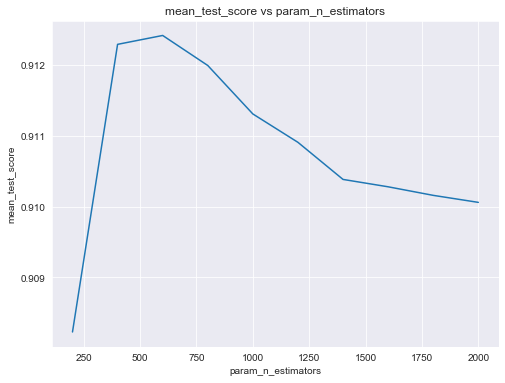

In [948]:
plot_results(final_cv_results, 'param_n_estimators', 'mean_test_score')

In [59]:
# Decreasing the learning rate and increasing n_estimators
gbm_f = GradientBoostingClassifier(learning_rate =0.05, n_estimators = 600, max_depth = 8, max_features =24,
                                                                  min_samples_leaf=10, min_samples_split = 2600, subsample=0.8, 
                                                                  random_state=0)
gbm_fit(gbm_f, X_train, y_train, req_cv = True, fimp = False)

The roc_auc score is 0.9891
confusion matrix:
[[19014    45]
 [  438  1254]]
classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19059
           1       0.97      0.74      0.84      1692

    accuracy                           0.98     20751
   macro avg       0.97      0.87      0.91     20751
weighted avg       0.98      0.98      0.98     20751



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   53.1s remaining:  1.3min


cross validation scores:
cv score mean is 0.912420759628041
cv score std is 0.005631861413462477


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   54.2s finished


array([0.91302423, 0.9032453 , 0.90995346, 0.91981333, 0.91606747])

In [60]:
# evaluating the model on the test data
classification_rep(y_test, X_test, gbm_f)

The roc_auc score is 0.9045
confusion matrix:
[[8094  175]
 [ 476  256]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8269
           1       0.59      0.35      0.44       732

    accuracy                           0.93      9001
   macro avg       0.77      0.66      0.70      9001
weighted avg       0.92      0.93      0.92      9001



In [363]:
model_results.loc[4] = ['GBM Classifier','tuned to roc_auc', 'PCA', 0.9891, 0.9124,0.0056, 0.9045, 0.84, 0.44]
model_results

Model                      Description original/PCA  \
0  Log Reg weight_tuned                   tuned_f1_score          PCA   
1           Log Reg SMT       With SMOTE and tuned to f1          PCA   
2         Random Forest                 tuned to roc_auc          PCA   
3                RF SMT  With SMOTE and tuned to roc_auc          PCA   
4        GBM Classifier                 tuned to roc_auc          PCA   

   Train_auc_mean  cv_auc_mean  cv_auc_std  test_auc_mean  train_f1_score  \
0          0.9126       0.9039     0.00370         0.8927            0.56   
1          0.9268       0.9023     0.00700         0.8882            0.86   
2          0.9803       0.8990     0.00240         0.8876            0.73   
3          0.9988       0.9011     0.00432         0.8905            0.99   
4          0.9891       0.9124     0.00560         0.9045            0.84   

   test_f1_score  
0           0.53  
1           0.45  
2           0.50  
3           0.50  
4           0.44

#### GBM classifier with SMOTE

In [956]:
# Building the base model
gbm_m_smt = GradientBoostingClassifier(random_state = 0)
gbm_fit(gbm_m_smt, X_train_smt, y_train_smt, fimp = False)

The roc_auc score is 0.9495
confusion matrix:
[[16731  2328]
 [ 2018 17041]]
classification report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     19059
           1       0.88      0.89      0.89     19059

    accuracy                           0.89     38118
   macro avg       0.89      0.89      0.89     38118
weighted avg       0.89      0.89      0.89     38118



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.9min


cross validation scores:
cv score mean is 0.9418277445128886
cv score std is 0.004779975896906529


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


array([0.93531672, 0.94288656, 0.94285195, 0.9495132 , 0.93857029])

In [959]:
# Tuning n_estimator parameters
params1 = {'n_estimators':range(40,121,10)}

grid_search_smt = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate =1.5, max_depth=8,
                                                  min_samples_split=1000, min_samples_leaf=50, subsample=0.8, max_features='sqrt',
                                                  random_state=0), 
                        param_grid = params1, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search_smt.fit(X_train_smt,y_train_smt)
final_cv_results = grid_search_smt.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.6min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      24.103949      1.075357         0.104921        0.004477   

  param_n_estimators                params  split0_test_score  \
3                 70  {'n_estimators': 70}           0.955078   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
3           0.955916           0.956861            0.95474           0.952155   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
3          0.95495        0.001578                1            0.998876   

   split1_train_score  split2_train_score  split3_train_score  \
3            0.998012            0.997609            0.990182   

   split4_train_score  mean_train_score  std_train_score  
3            0.998616          0.996659         0.003269

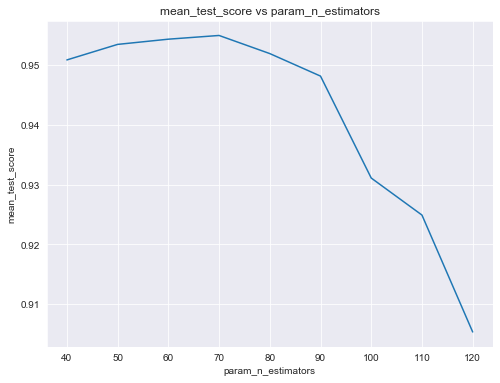

In [960]:
plot_results(final_cv_results, 'param_n_estimators', 'mean_test_score')

In [961]:
# Tuning max_depth and min_samples_split parameters
params2 = {'max_depth':range(4,15,2), 'min_samples_split': range(600,2800,200)}

grid_search_smt = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate =1.5, n_estimators = 70, 
                                                                  min_samples_leaf=50, subsample=0.8, max_features='sqrt', 
                                                                  random_state=0), 
                        param_grid = params2, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search_smt.fit(X_train_smt,y_train_smt)
final_cv_results = grid_search_smt.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed: 16.8min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
34      29.719935      1.706761         0.102729        0.007274   

   param_max_depth param_min_samples_split  \
34              10                     800   

                                         params  split0_test_score  \
34  {'max_depth': 10, 'min_samples_split': 800}           0.956271   

    split1_test_score  split2_test_score  split3_test_score  \
34           0.965301           0.962355           0.965477   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
34           0.963455         0.962572        0.003359                1   

    split0_train_score  split1_train_score  split2_train_score  \
34            0.999885            0.999766            0.999935   

    split3_train_score  split4_train_score  mean_train_score  std_train_score  
34            0.999729            0.999962          0.999855         0.000092

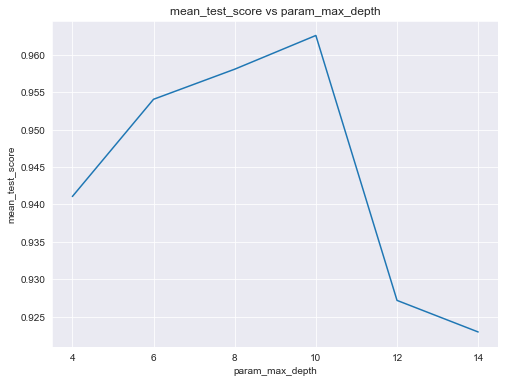

In [962]:
df_results = final_cv_results[final_cv_results['param_min_samples_split'] == 800]
plot_results(df_results, 'param_max_depth', 'mean_test_score')

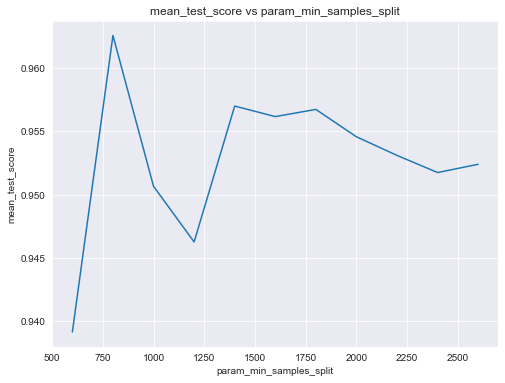

In [963]:
df_results = final_cv_results[final_cv_results['param_max_depth'] == 10]
plot_results(df_results, 'param_min_samples_split', 'mean_test_score')

In [968]:
# Tuning min_samples_split and min_samples_leaf parameters
params3 = {'min_samples_leaf':range(10,100,10)}

grid_search_smt = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate =1.5, n_estimators = 70, max_depth = 10,
                                                                  min_samples_split=800, subsample=0.8, max_features='sqrt', 
                                                                  random_state=0), 
                        param_grid = params3, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search_smt.fit(X_train_smt,y_train_smt)
final_cv_results = grid_search_smt.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.4min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7      28.524529       1.24937          0.12427        0.043992   

  param_min_samples_leaf                    params  split0_test_score  \
7                     80  {'min_samples_leaf': 80}           0.957868   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
7           0.965803           0.962022           0.966816           0.966439   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
7          0.96379        0.003418                1            0.999958   

   split1_train_score  split2_train_score  split3_train_score  \
7            0.999996            0.999907            0.999983   

   split4_train_score  mean_train_score  std_train_score  
7            0.999998          0.999968         0.000034

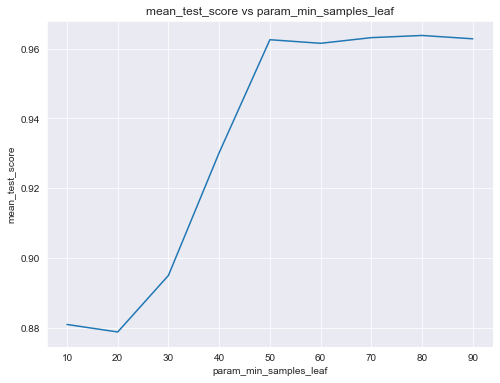

In [969]:
plot_results(final_cv_results, 'param_min_samples_leaf', 'mean_test_score')

In [53]:
# tuning max_Features
params4 = {'max_features': range(2,40,2)}

grid_search_smt = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate =1.5, n_estimators = 70, max_depth = 10,
                                                                  min_samples_leaf=80, min_samples_split = 800, subsample=0.8, 
                                                                  random_state=0), 
                        param_grid = params4, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search_smt.fit(X_train_smt,y_train_smt)
final_cv_results = grid_search_smt.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed: 11.3min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
16      92.251944      1.635373         0.106509        0.011208   

   param_max_features                params  split0_test_score  \
16                 34  {'max_features': 34}           0.965722   

    split1_test_score  split2_test_score  split3_test_score  \
16           0.970547           0.969187           0.971787   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
16           0.969298         0.969308        0.002028                1   

    split0_train_score  split1_train_score  split2_train_score  \
16                 1.0                 1.0                 1.0   

    split3_train_score  split4_train_score  mean_train_score  std_train_score  
16                 1.0                 1.0               1.0     2.089704e-08

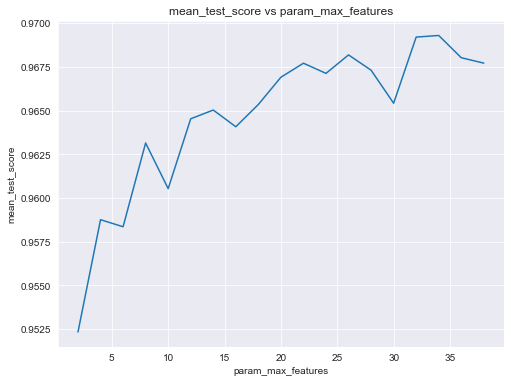

In [55]:
plot_results(final_cv_results, 'param_max_features', 'mean_test_score')

In [56]:
# Tuning subsample
params5 = {'subsample': [i/100 for i in range(60,100,5)]}

grid_search_smt = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate =1.5, n_estimators = 70, max_depth = 10, max_features =34,
                                                                  min_samples_leaf=80, min_samples_split = 800, subsample=0.8, 
                                                                  random_state=0), 
                        param_grid = params5, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search_smt.fit(X_train_smt,y_train_smt)
final_cv_results = grid_search_smt.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.8min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7      99.052167      6.676209         0.055462        0.013535   

  param_subsample               params  split0_test_score  split1_test_score  \
7            0.95  {'subsample': 0.95}           0.979429           0.980432   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
7           0.981764           0.981151           0.979323          0.98042   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
7        0.000952                1                 1.0                 1.0   

   split2_train_score  split3_train_score  split4_train_score  \
7                 1.0                 1.0                 1.0   

   mean_train_score  std_train_score  
7               1.0              0.0

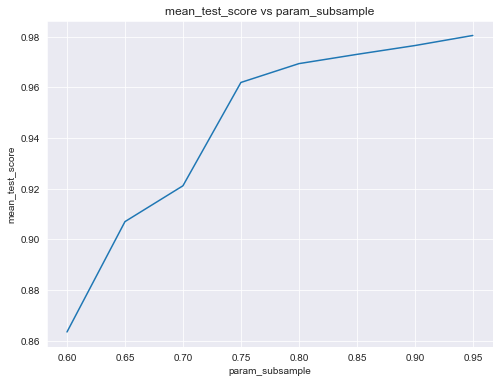

In [57]:
plot_results(final_cv_results, 'param_subsample', 'mean_test_score')

In [51]:
# finding optimum learning rate and n_estimators
params5 = {'n_estimators': range(200,1500,200)}

grid_search_smt = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate =0.01, n_estimators = 70, max_depth = 10, max_features =34,
                                                                  min_samples_leaf=80, min_samples_split = 800, subsample=0.95, 
                                                                  random_state=0), 
                        param_grid = params5, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search_smt.fit(X_train_smt,y_train_smt)
final_cv_results = grid_search_smt.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed: 71.2min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6    1174.872221    221.119245         0.731651        0.165926   

  param_n_estimators                  params  split0_test_score  \
6               1400  {'n_estimators': 1400}           0.984584   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
6            0.98742           0.988174           0.989796           0.987375   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
6          0.98747        0.001688                1            0.999152   

   split1_train_score  split2_train_score  split3_train_score  \
6            0.999127            0.999081            0.999094   

   split4_train_score  mean_train_score  std_train_score  
6            0.999109          0.999113         0.000025

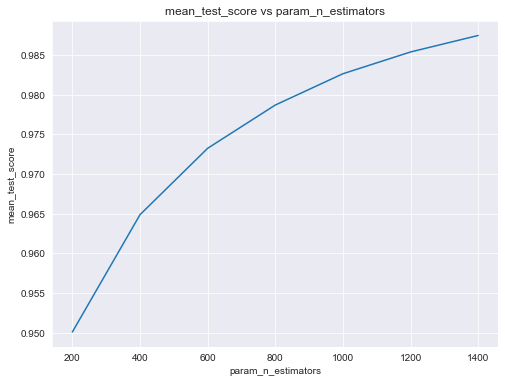

In [52]:
plot_results(final_cv_results, 'param_n_estimators', 'mean_test_score')

In [64]:
# Fitting the final model with tuned_hyper-parameters
gbm_f_smt = GradientBoostingClassifier(learning_rate =0.01, n_estimators = 1400, max_depth = 10, max_features =34,
                                                                  min_samples_leaf=80, min_samples_split = 800, subsample=0.95, 
                                                                  random_state=0)
gbm_fit(gbm_f_smt, X_train_smt, y_train_smt, req_cv = True, fimp = False)

The roc_auc score is 0.9994
confusion matrix:
[[18623   436]
 [   33 19026]]
classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19059
           1       0.98      1.00      0.99     19059

    accuracy                           0.99     38118
   macro avg       0.99      0.99      0.99     38118
weighted avg       0.99      0.99      0.99     38118



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 13.9min remaining: 20.8min


cross validation scores:
cv score mean is 0.9874701853147576
cv score std is 0.0016879595773961662


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 14.0min finished


array([0.98458443, 0.9874203 , 0.98817446, 0.98979633, 0.98737541])

In [65]:
# Cross-validation score using the function created for smote
results = repeated_evaluation_smote(gbm_f_smt, X_train, y_train)
results.mean(), results.std()

(train_auc_scores    0.999492
 test_auc_scores     0.910960
 train_pr_scores     0.980219
 test_pr_scores      0.479290
 train_re_scores     0.998400
 test_re_scores      0.654841
 train_acc_scores    0.989126
 test_acc_scores     0.913692
 dtype: float64, train_auc_scores    0.000062
 test_auc_scores     0.005512
 train_pr_scores     0.000544
 test_pr_scores      0.023365
 train_re_scores     0.000550
 test_re_scores      0.030754
 train_acc_scores    0.000460
 test_acc_scores     0.005544
 dtype: float64)

In [66]:
# Evaluation on the test dataet
classification_rep(y_test, X_test, gbm_f_smt)

The roc_auc score is 0.8958
confusion matrix:
[[7705  564]
 [ 277  455]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8269
           1       0.45      0.62      0.52       732

    accuracy                           0.91      9001
   macro avg       0.71      0.78      0.73      9001
weighted avg       0.92      0.91      0.91      9001



In [364]:
# appending model and results
model_results.loc[5] = ['GBM Classifier', 'With smote', 'PCA', 0.999, 0.9109,0.0050, 0.8958, 0.996, 0.52]
model_results

Model                      Description original/PCA  \
0  Log Reg weight_tuned                   tuned_f1_score          PCA   
1           Log Reg SMT       With SMOTE and tuned to f1          PCA   
2         Random Forest                 tuned to roc_auc          PCA   
3                RF SMT  With SMOTE and tuned to roc_auc          PCA   
4        GBM Classifier                 tuned to roc_auc          PCA   
5        GBM Classifier                       With smote          PCA   

   Train_auc_mean  cv_auc_mean  cv_auc_std  test_auc_mean  train_f1_score  \
0          0.9126       0.9039     0.00370         0.8927           0.560   
1          0.9268       0.9023     0.00700         0.8882           0.860   
2          0.9803       0.8990     0.00240         0.8876           0.730   
3          0.9988       0.9011     0.00432         0.8905           0.990   
4          0.9891       0.9124     0.00560         0.9045           0.840   
5          0.9990       0.9109     0.00500         0.8958           0.996   

   test_f1_score  
0           0.53  
1           0.45  
2           0.50  
3           0.50  
4           0.44  
5           0.52

### 6.4 XGB Classifier <a id='VI.4'></a>

#### XGB classifier and optimization of roc_auc_curve

In [69]:
# defining xgb_fit for utilizing cv function in the xgb module and use the cross validation for obtaining optimum n_estimators
def xgb_fit(xgb_m, X_train, y_train, req_cv = True, kfolds = 5, esr = 50 ):
    if req_cv:
        params = xgb_m.get_xgb_params()
        xg_train = xgb.DMatrix(X_train.values, label = y_train.values)
        cv_result = xgb.cv(params, xg_train, num_boost_round = xgb_m.get_params()['n_estimators'], 
                          nfold = kfolds, metrics = 'auc', early_stopping_rounds = esr, verbose_eval = False, 
                           as_pandas = True, stratified=True, seed = 0)
        xgb_m.set_params(n_estimators = cv_result.shape[0])
    
    xgb_m.fit(X_train, y_train, eval_metric = 'auc')
    
    classification_rep(y_train, X_train, xgb_m)
    
#     feat_imp = pd.DataFrame({'features': X_train.columns, 'imp':xgb_m.feature_importances_})
#     feat_imp.plot(kind = 'bar')
#     plt.show()
    print(cv_result.mean())
    return cv_result

In [79]:
# initiating the base model which would be used for reference 
xgb1 = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0,subsample=0.8, colsample_bytree=0.8,
                     objective= 'binary:logistic', scale_pos_weight=1, random_state=0, n_jobs = -1, verbosity = 0)
# estimating the number of n_estimators based on early stoppping rounds
cv_results = xgb_fit(xgb1,X_train, y_train)

The roc_auc score is 0.9945
confusion matrix:
[[19020    39]
 [  363  1329]]
classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19059
           1       0.97      0.79      0.87      1692

    accuracy                           0.98     20751
   macro avg       0.98      0.89      0.93     20751
weighted avg       0.98      0.98      0.98     20751

train-auc-mean    0.966466
train-auc-std     0.001036
test-auc-mean     0.900506
test-auc-std      0.004735
dtype: float64


In [81]:
# Tuning max_depth and min_child_weight parameters
params1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=162, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', n_jobs=-1, scale_pos_weight=1, random_state=0), 
                        param_grid = params1, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 10.4min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
9     117.839524      2.233715         0.197472        0.008415   

  param_max_depth param_min_child_weight  \
9               9                      1   

                                    params  split0_test_score  \
9  {'max_depth': 9, 'min_child_weight': 1}           0.915219   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
9           0.910197           0.906029           0.915821           0.903935   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
9         0.910241        0.004763                1                 1.0   

   split1_train_score  split2_train_score  split3_train_score  \
9                 1.0                 1.0                 1.0   

   split4_train_score  mean_train_score  std_train_score  
9                 1.0               1.0              0.0

In [85]:
# Further fine tuning max_depth and min_child_weight (selecting max-depth 5 instead of 9 as max-depth 5 is reasonably ranked - 3)
params2 = { 'max_depth':[4,5,6],'min_child_weight':[1,2,3,6,10,12]}
grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=162, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', n_jobs=-1, scale_pos_weight=1, random_state=27), 
                        param_grid = params2, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 13.2min finished


In [86]:
final_cv_results[final_cv_results['rank_test_score'] == 1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4      47.007313        1.1867         0.086768        0.006764   

  param_max_depth param_min_child_weight  \
4               4                     10   

                                     params  split0_test_score  \
4  {'max_depth': 4, 'min_child_weight': 10}           0.910772   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
4           0.906275           0.909801           0.914495           0.911192   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
4         0.910507         0.00264                1            0.974052   

   split1_train_score  split2_train_score  split3_train_score  \
4            0.976322             0.97409            0.973898   

   split4_train_score  mean_train_score  std_train_score  
4             0.97421          0.974514         0.000909

In [88]:
# Identifying right gamma for the model
params3 = {'gamma':[i/10.0 for i in range(0,5)]}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=162, max_depth=4,
                                                  min_child_weight=10, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', n_jobs=-1, scale_pos_weight=1, random_state=27), 
                        param_grid = params3, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  3.0min remaining:   15.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.3min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
2      54.733455      0.583126          0.10093         0.00821         0.2   

           params  split0_test_score  split1_test_score  split2_test_score  \
2  {'gamma': 0.2}           0.910772           0.906275           0.910948   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
2           0.914495           0.911192         0.910736        0.002619   

   rank_test_score  split0_train_score  split1_train_score  \
2                1            0.974052            0.976322   

   split2_train_score  split3_train_score  split4_train_score  \
2            0.974243            0.973898             0.97421   

   mean_train_score  std_train_score  
2          0.974545         0.000897

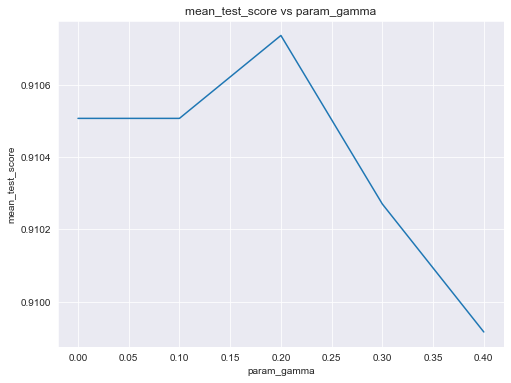

In [90]:
plot_results(final_cv_results, 'param_gamma', 'mean_test_score')

In [91]:
# updating the revised n_estimators using the updated parameters
xgb2 = XGBClassifier( learning_rate =0.1,n_estimators=1000, max_depth=4, min_child_weight=10, gamma=0.2, subsample=0.8,
                     colsample_bytree=0.8, objective= 'binary:logistic', scale_pos_weight=1, random_state=27, 
                     n_jobs = -1, verbosity = 1)
cv_results = xgb_fit(xgb2,X_train, y_train)

The roc_auc score is 0.9667
confusion matrix:
[[18910   149]
 [  752   940]]
classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     19059
           1       0.86      0.56      0.68      1692

    accuracy                           0.96     20751
   macro avg       0.91      0.77      0.83     20751
weighted avg       0.95      0.96      0.95     20751

train-auc-mean    0.939966
train-auc-std     0.001160
test-auc-mean     0.898780
test-auc-std      0.002782
dtype: float64


In [93]:
# finetuning 'subsample' and 'colsample_bytree'
params4 = {'subsample':[i/10.0 for i in range(6,10)], 'colsample_bytree':[i/10.0 for i in range(6,10)]}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=155, max_depth=4,
                                                  min_child_weight=10, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', n_jobs=-1, scale_pos_weight=1, random_state=27), 
                        param_grid = params4, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  7.7min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
10      50.303899      0.248864         0.087566        0.002475   

   param_colsample_bytree param_subsample  \
10                    0.8             0.8   

                                         params  split0_test_score  \
10  {'colsample_bytree': 0.8, 'subsample': 0.8}           0.910403   

    split1_test_score  split2_test_score  split3_test_score  \
10           0.906019            0.91096           0.914184   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
10           0.911295         0.910572        0.002626                1   

    split0_train_score  split1_train_score  split2_train_score  \
10            0.972176            0.974974            0.973232   

    split3_train_score  split4_train_score  mean_train_score  std_train_score  
10            0.972249            0.972771           0.97308         0.001021

In [94]:
# Tuning reg_aplha parameter and reg_lambda parameter 
params5 = {'reg_alpha':[1e-2, 0.1, 0.4,0.5,0.6,1, 100], 'reg_lambda':[0.001, 1, 10, 100]}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=155, max_depth=4,
                                                  min_child_weight=10, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', n_jobs=-1, scale_pos_weight=1, random_state=27), 
                        param_grid = params5, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 14.7min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
18      51.535606      0.532408         0.085372        0.001017   

   param_reg_alpha param_reg_lambda                                params  \
18             0.6               10  {'reg_alpha': 0.6, 'reg_lambda': 10}   

    split0_test_score  split1_test_score  split2_test_score  \
18           0.909706           0.905288           0.908719   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
18           0.912103           0.911736          0.90951        0.002456   

    rank_test_score  split0_train_score  split1_train_score  \
18                1            0.967383            0.968805   

    split2_train_score  split3_train_score  split4_train_score  \
18            0.969006            0.966708             0.96776   

    mean_train_score  std_train_score  
18          0.967933         0.000866

In [97]:
# tuning scale_pos_weight
params6 = {'scale_pos_weight':[0.1, 1, 10.6, 50, 100]}
grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=155, max_depth=4,
                                                  min_child_weight=10, gamma=0.2, subsample=0.8, colsample_bytree=0.8,reg_alpha = 0.6, reg_lambda = 10,
                                                  objective= 'binary:logistic', n_jobs=-1, scale_pos_weight=1, random_state=27), 
                        param_grid = params6, scoring='roc_auc',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  2.3min remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.5min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1      44.432001       2.58765         0.082577        0.009058   

  param_scale_pos_weight                   params  split0_test_score  \
1                      1  {'scale_pos_weight': 1}           0.909706   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
1           0.905288           0.908719           0.912103           0.911736   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
1          0.90951        0.002456                1            0.967383   

   split1_train_score  split2_train_score  split3_train_score  \
1            0.968805            0.969006            0.966708   

   split4_train_score  mean_train_score  std_train_score  
1             0.96776          0.967933         0.000866

In [70]:
# Fitting the XGB Classifier with less learning rate and tuned hyper parameters
xgb4 = XGBClassifier(learning_rate =0.01, n_estimators=3000, max_depth=4, min_child_weight=10, gamma=0.2, subsample=0.8, 
                     colsample_bytree=0.8, objective= 'binary:logistic', scale_pos_weight=1, random_state=27, n_jobs = -1, verbosity = 1, reg_alpha = 0.6,
                    reg_lambda = 10)
cv_results = xgb_fit(xgb4,X_train, y_train)

The roc_auc score is 0.9767
confusion matrix:
[[18967    92]
 [  647  1045]]
classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     19059
           1       0.92      0.62      0.74      1692

    accuracy                           0.96     20751
   macro avg       0.94      0.81      0.86     20751
weighted avg       0.96      0.96      0.96     20751

train-auc-mean    0.949070
train-auc-std     0.000866
test-auc-mean     0.903332
test-auc-std      0.003855
dtype: float64


In [71]:
# Checking the cross_val_score of 
cv_score = cross_val_score(xgb4, X_train, y_train, cv = 5, n_jobs = -1, verbose = 1, scoring = 'roc_auc')
cv_score.mean(), cv_score.std()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  8.1min remaining: 12.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.2min finished


(0.91262364865547, 0.0038870872252606704)

In [72]:
# Fitting xgb4 on the training dataset
xgb4.fit(X_train, y_train, eval_metric= 'auc')
classification_rep(y_train, X_train, xgb4)

The roc_auc score is 0.9767
confusion matrix:
[[18967    92]
 [  647  1045]]
classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     19059
           1       0.92      0.62      0.74      1692

    accuracy                           0.96     20751
   macro avg       0.94      0.81      0.86     20751
weighted avg       0.96      0.96      0.96     20751



In [73]:
# Testing the model on the test dataset
classification_rep(y_test, X_test, xgb4)

The roc_auc score is 0.9047
confusion matrix:
[[8118  151]
 [ 473  259]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8269
           1       0.63      0.35      0.45       732

    accuracy                           0.93      9001
   macro avg       0.79      0.67      0.71      9001
weighted avg       0.92      0.93      0.92      9001



In [365]:
model_results.loc[6] = ['XGB Classifier', 'tuned to roc_auc', 'PCA', 0.9767, 0.9126,0.0038, 0.9047, 0.74, 0.45]
model_results

Model                      Description original/PCA  \
0  Log Reg weight_tuned                   tuned_f1_score          PCA   
1           Log Reg SMT       With SMOTE and tuned to f1          PCA   
2         Random Forest                 tuned to roc_auc          PCA   
3                RF SMT  With SMOTE and tuned to roc_auc          PCA   
4        GBM Classifier                 tuned to roc_auc          PCA   
5        GBM Classifier                       With smote          PCA   
6        XGB Classifier                 tuned to roc_auc          PCA   

   Train_auc_mean  cv_auc_mean  cv_auc_std  test_auc_mean  train_f1_score  \
0          0.9126       0.9039     0.00370         0.8927           0.560   
1          0.9268       0.9023     0.00700         0.8882           0.860   
2          0.9803       0.8990     0.00240         0.8876           0.730   
3          0.9988       0.9011     0.00432         0.8905           0.990   
4          0.9891       0.9124     0.00560         0.9045           0.840   
5          0.9990       0.9109     0.00500         0.8958           0.996   
6          0.9767       0.9126     0.00380         0.9047           0.740   

   test_f1_score  
0           0.53  
1           0.45  
2           0.50  
3           0.50  
4           0.44  
5           0.52  
6           0.45

#### XGB classifier and optimization of f1score

In [118]:
# initiating the base model which would be used for reference 
xgb5 = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0,subsample=0.8, colsample_bytree=0.8,
                     objective= 'binary:logistic', scale_pos_weight=1, random_state=0, n_jobs = -1, verbosity = 0)
cv_results = xgb_fit2(xgb5,X_train, y_train)

The roc_auc score is 0.8794
confusion matrix:
[[19013    46]
 [ 1464   228]]
classification report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     19059
           1       0.83      0.13      0.23      1692

    accuracy                           0.93     20751
   macro avg       0.88      0.57      0.60     20751
weighted avg       0.92      0.93      0.90     20751

train-error-mean    0.072602
train-error-std     0.000789
train-f1-mean       0.286036
train-f1-std        0.025731
test-error-mean     0.078888
test-error-std      0.001308
test-f1-mean        0.212249
test-f1-std         0.030499
dtype: float64


In [120]:
# tuning n_estimators - Identify optimal n_estimators for learning rate of 0.1
params1 = {'n_estimators':range(40,100,10)}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', n_jobs=-1, scale_pos_weight=1, random_state=0), 
                        param_grid = params1, scoring='f1',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5      24.274917      2.272126          0.04328         0.00651   

  param_n_estimators                params  split0_test_score  \
5                 90  {'n_estimators': 90}           0.417495   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
5           0.411881           0.422925           0.423868           0.470817   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
5         0.429394        0.021148                1            0.757667   

   split1_train_score  split2_train_score  split3_train_score  \
5            0.779705            0.763135            0.766217   

   split4_train_score  mean_train_score  std_train_score  
5            0.768699          0.767085         0.007306

In [121]:
# Tuning max_depth and min_child_weight parameters
params1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=90, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', n_jobs=-1, scale_pos_weight=1, random_state=0), 
                        param_grid = params1, scoring='f1',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.7min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5      30.565675      0.145784         0.071608        0.004736   

  param_max_depth param_min_child_weight  \
5               5                      5   

                                    params  split0_test_score  \
5  {'max_depth': 5, 'min_child_weight': 5}           0.408818   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
5           0.431373              0.424           0.421268           0.462428   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
5         0.429575        0.017963                1            0.709302   

   split1_train_score  split2_train_score  split3_train_score  \
5            0.720826            0.727996            0.725167   

   split4_train_score  mean_train_score  std_train_score  
5            0.728641          0.722387         0.007099

In [125]:
# Further fine tuning max_depth and min_child_weight (selecting max-depth 5 instead of 9 as max-depth 5 is reasonably ranked - 3)
params2 = { 'max_depth':[4,5,6],'min_child_weight':[1,2,3,6,10,12]}
grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=90, max_depth=5,
                                                  min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', n_jobs=-1, scale_pos_weight=1, random_state=27), 
                        param_grid = params2, scoring='f1',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  7.9min finished


In [126]:
final_cv_results[final_cv_results['rank_test_score'] == 1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
16      45.645754      1.398639         0.095545        0.015077   

   param_max_depth param_min_child_weight  \
16               6                     10   

                                      params  split0_test_score  \
16  {'max_depth': 6, 'min_child_weight': 10}           0.452975   

    split1_test_score  split2_test_score  split3_test_score  \
16            0.43787           0.411881           0.423625   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
16           0.499055         0.445079        0.030296                1   

    split0_train_score  split1_train_score  split2_train_score  \
16            0.750767            0.760774            0.763365   

    split3_train_score  split4_train_score  mean_train_score  std_train_score  
16            0.746004            0.749231          0.754028         0.006793

In [127]:
# Identifying right gamma for the model
params3 = {'gamma':[i/10.0 for i in range(0,5)]}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=90, max_depth=6,
                                                  min_child_weight=10, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', n_jobs=-1, scale_pos_weight=1, random_state=27), 
                        param_grid = params3, scoring='f1',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  1.8min remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.0min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
0      34.044372      0.892931         0.071409        0.006723           0   

           params  split0_test_score  split1_test_score  split2_test_score  \
0  {'gamma': 0.0}           0.452975            0.43787           0.411881   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.423625           0.499055         0.445079        0.030296   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.750767            0.760774   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.763365            0.746004            0.749231   

   mean_train_score  std_train_score  
0          0.754028         0.006793

In [128]:
# tuning n_estimators
params1 = {'n_estimators':range(40,150,10)}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, max_depth=6,
                                                  min_child_weight=10, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', n_jobs=-1, scale_pos_weight=1, random_state=0), 
                        param_grid = params1, scoring='f1',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  4.6min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8      54.573483       0.53663         0.100931        0.001828   

  param_n_estimators                 params  split0_test_score  \
8                120  {'n_estimators': 120}           0.461538   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
8           0.424951           0.428291           0.446247            0.48566   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
8         0.449335        0.022428                1            0.810396   

   split1_train_score  split2_train_score  split3_train_score  \
8            0.820622            0.827411            0.806162   

   split4_train_score  mean_train_score  std_train_score  
8            0.817332          0.816385         0.007494

In [130]:
# finetuning 'subsample' and 'colsample_bytree'
params4 = {'subsample':[i/10.0 for i in range(6,10)], 'colsample_bytree':[i/10.0 for i in range(6,10)]}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=120, max_depth=6,
                                                  min_child_weight=10, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', n_jobs=-1, scale_pos_weight=1, random_state=27), 
                        param_grid = params4, scoring='f1',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  8.2min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
10      56.850993      1.238488         0.103324        0.004068   

   param_colsample_bytree param_subsample  \
10                    0.8             0.8   

                                         params  split0_test_score  \
10  {'colsample_bytree': 0.8, 'subsample': 0.8}           0.462406   

    split1_test_score  split2_test_score  split3_test_score  \
10           0.445312           0.423529           0.427419   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
10           0.496269         0.450985         0.02654                1   

    split0_train_score  split1_train_score  split2_train_score  \
10            0.809382            0.823729            0.813559   

    split3_train_score  split4_train_score  mean_train_score  std_train_score  
10            0.812953            0.818565          0.815638         0.004994

In [131]:
# Tuning reg_aplha parameter and reg_lambda parameter 
params5 = {'reg_alpha':[1e-2, 0.1, 0.4,0.5,0.6,1, 100], 'reg_lambda':[0.001, 1, 10, 100]}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=120, max_depth=6,
                                                  min_child_weight=10, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', n_jobs=-1, scale_pos_weight=1, random_state=27), 
                        param_grid = params5, scoring='f1',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 15.2min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
17      53.873355      0.454368         0.097539        0.003478   

   param_reg_alpha param_reg_lambda                               params  \
17             0.6                1  {'reg_alpha': 0.6, 'reg_lambda': 1}   

    split0_test_score  split1_test_score  split2_test_score  \
17           0.428016           0.450867           0.461538   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
17           0.457143           0.496212         0.458752        0.022001   

    rank_test_score  split0_train_score  split1_train_score  \
17                1            0.803594            0.820426   

    split2_train_score  split3_train_score  split4_train_score  \
17            0.822934            0.806314            0.809727   

    mean_train_score  std_train_score  
17          0.812599         0.007706

In [134]:
# tuning scale_pos_weight
params6 = {'scale_pos_weight':[0.1, 1,10.6,15,20,30, 50]}
grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=120, max_depth=6,
                                                  min_child_weight=10, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha = 0.6, reg_lambda = 1,
                                                  objective= 'binary:logistic', n_jobs=-1, scale_pos_weight=1, random_state=27), 
                        param_grid = params6, scoring='f1',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  4.1min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2      55.871811      0.213653         0.100332        0.002932   

  param_scale_pos_weight                      params  split0_test_score  \
2                   10.6  {'scale_pos_weight': 10.6}            0.54798   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
2             0.5325           0.535533            0.56917           0.563275   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
2          0.54969         0.01458                1            0.824427   

   split1_train_score  split2_train_score  split3_train_score  \
2            0.835341            0.825397            0.830571   

   split4_train_score  mean_train_score  std_train_score  
2            0.829552          0.829058         0.003921

In [136]:
# tuning n_estimators for alpha 0.01
params1 = {'n_estimators':range(200,1100,200)}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, max_depth=6,
                                                     min_child_weight=10, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                     scale_pos_weight = 10.6, objective= 'binary:logistic', n_jobs=-1, 
                                                     reg_alpha = 0.6, reg_lambda = 1, random_state=27), 
                        param_grid = params1, scoring='f1',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed: 14.4min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 15.7min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4     379.763641     60.810226         0.423461        0.087074   

  param_n_estimators                  params  split0_test_score  \
4               1000  {'n_estimators': 1000}           0.549751   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
4           0.550971           0.540074           0.576923           0.560947   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
4         0.555732        0.012489                1            0.802741   

   split1_train_score  split2_train_score  split3_train_score  \
4            0.810309            0.809595            0.805001   

   split4_train_score  mean_train_score  std_train_score  
4            0.799171          0.805363         0.004189

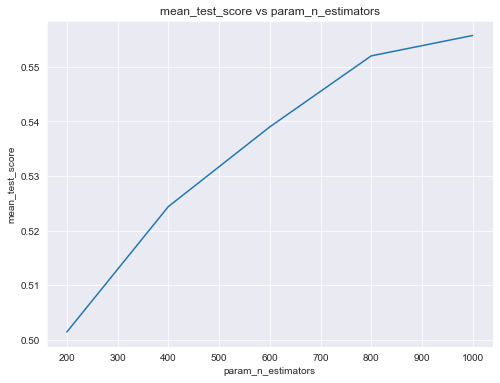

In [137]:
plot_results(final_cv_results, 'param_n_estimators', 'mean_test_score')

In [139]:
# tuning n_estimators for alpha 0.01
params1 = {'n_estimators':range(1200,2000,200)}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, max_depth=6,
                                                     min_child_weight=10, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                     scale_pos_weight = 10.6, objective= 'binary:logistic', n_jobs=-1, 
                                                     reg_alpha = 0.6, reg_lambda = 1, random_state=27), 
                        param_grid = params1, scoring='f1',cv=5, n_jobs = -1, return_train_score = True, verbose = 2)
grid_search.fit(X_train,y_train)
final_cv_results = grid_search.cv_results_
final_cv_results = pd.DataFrame(final_cv_results)
final_cv_results[final_cv_results['rank_test_score'] == 1]

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed: 23.4min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 29.5min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1     611.531768     27.208161         1.007905        0.183996   

  param_n_estimators                  params  split0_test_score  \
1               1400  {'n_estimators': 1400}           0.554688   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
1           0.558018           0.543081            0.57931            0.57398   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
1         0.561814        0.013192                1            0.853359   

   split1_train_score  split2_train_score  split3_train_score  \
1            0.868142            0.864347            0.863796   

   split4_train_score  mean_train_score  std_train_score  
1            0.862695          0.862468          0.00491

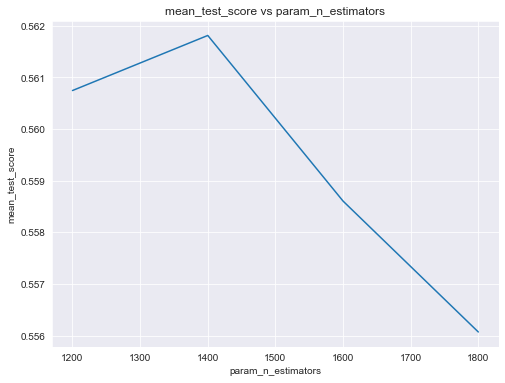

In [140]:
plot_results(final_cv_results, 'param_n_estimators', 'mean_test_score')

In [74]:
# Fitting the XGB Classifier with less learning rate and tuned hyper parameters
xgb6 = XGBClassifier(learning_rate =0.01,n_estimators = 1400, max_depth=6,min_child_weight=10, gamma=0, subsample=0.8, colsample_bytree=0.8,
scale_pos_weight = 10.6, objective= 'binary:logistic', n_jobs=-1, reg_alpha = 0.6, reg_lambda = 1, random_state=27)

In [75]:
# fitting the train data
xgb6.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=10, missing=None, n_estimators=1400, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=27,
              reg_alpha=0.6, reg_lambda=1, scale_pos_weight=10.6, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [76]:
# classification metrics for the train data
classification_rep(y_train, X_train, xgb6)

The roc_auc score is 0.9984
confusion matrix:
[[18391   668]
 [    1  1691]]
classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     19059
           1       0.72      1.00      0.83      1692

    accuracy                           0.97     20751
   macro avg       0.86      0.98      0.91     20751
weighted avg       0.98      0.97      0.97     20751



In [77]:
# Testing the model on the test dataset
classification_rep(y_test, X_test, xgb6)

The roc_auc score is 0.9019
confusion matrix:
[[7747  522]
 [ 264  468]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8269
           1       0.47      0.64      0.54       732

    accuracy                           0.91      9001
   macro avg       0.72      0.79      0.75      9001
weighted avg       0.93      0.91      0.92      9001



In [366]:
# appending the model and results
model_results.loc[7] = ['XGB Classifier', 'tuned to f1_score', 'PCA', 0.9984, 0.9126,0.0038, 0.9019, 0.83, 0.54]
model_results

Model                      Description original/PCA  \
0  Log Reg weight_tuned                   tuned_f1_score          PCA   
1           Log Reg SMT       With SMOTE and tuned to f1          PCA   
2         Random Forest                 tuned to roc_auc          PCA   
3                RF SMT  With SMOTE and tuned to roc_auc          PCA   
4        GBM Classifier                 tuned to roc_auc          PCA   
5        GBM Classifier                       With smote          PCA   
6        XGB Classifier                 tuned to roc_auc          PCA   
7        XGB Classifier                tuned to f1_score          PCA   

   Train_auc_mean  cv_auc_mean  cv_auc_std  test_auc_mean  train_f1_score  \
0          0.9126       0.9039     0.00370         0.8927           0.560   
1          0.9268       0.9023     0.00700         0.8882           0.860   
2          0.9803       0.8990     0.00240         0.8876           0.730   
3          0.9988       0.9011     0.00432         0.8905           0.990   
4          0.9891       0.9124     0.00560         0.9045           0.840   
5          0.9990       0.9109     0.00500         0.8958           0.996   
6          0.9767       0.9126     0.00380         0.9047           0.740   
7          0.9984       0.9126     0.00380         0.9019           0.830   

   test_f1_score  
0           0.53  
1           0.45  
2           0.50  
3           0.50  
4           0.44  
5           0.52  
6           0.45  
7           0.54

### 6.5 Building Random Forest model on original features <a id='VI.5'></a>

#### Random Forest without SMOTE

In [354]:
# creating a copy train data 
tel_train = tel_scaled_train.copy()
tel_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
78442  0.330049  0.015677 -0.310681    -0.487527    -0.496334    -0.475319   
70032 -1.026336 -0.998310 -0.989546    -0.565335    -0.552882    -0.504020   
64996 -0.071616 -0.200520 -0.214039    -0.254595    -0.213207     0.017888   
67754  1.638906  2.984679 -0.574718    -0.565335    -0.552882    -0.504020   
68984 -0.015275  0.649364 -0.819020     0.466330     1.703469    -0.390512   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
78442      1.797725      1.212620      0.288901      -0.211023      -0.162454   
70032     -0.761378     -0.765325     -0.693852      -0.211023      -0.162454   
64996     -0.159876      0.207807      0.657447       0.090061      -0.162454   
67754     -0.772174     -0.765325     -0.693852      -0.211023      -0.162454   
68984     -0.303039      0.051386     -0.537217       4.620703       1.264420   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
78442      -0.163321      -0.228984      -0.212207      -0.187692   
70032      -0.163321      -0.228984      -0.212207      -0.187692   
64996      -0.163321       0.275275      -0.212207      -0.187692   
67754      -0.163321      -0.228984      -0.212207      -0.187692   
68984       1.159775       5.805917       8.224330       1.029975   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
78442         -0.219625         -0.234594         -0.270481          0.820013   
70032         -0.360568         -0.344379         -0.326096         -0.641585   
64996          0.011228          0.295592          0.685257         -0.431433   
67754         -0.360568         -0.344379         -0.326096         -0.653715   
68984         -0.360568         -0.051750         -0.326096         -0.653715   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
78442          0.297320         -0.123319         -0.284456         -0.275882   
70032         -0.678242         -0.642599         -0.301518         -0.298106   
64996         -0.162799          0.356322         -0.301518         -0.244397   
67754         -0.678242         -0.642599         -0.301518         -0.298106   
68984         -0.140970         -0.642599         -0.301518         -0.298106   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
78442         -0.297685         -0.240023         -0.190703         -0.228627   
70032         -0.297685          0.098266         -0.190703         -0.228627   
64996         -0.258740         -0.240023          1.402636         -0.228627   
67754         -0.297685         -0.240023         -0.190703         -0.228627   
68984         -0.297685         -0.240023         -0.190703         -0.228627   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
78442      0.380263      0.016255     -0.268795         -0.403945   
70032     -0.654671     -0.669342     -0.631351         -0.411623   
64996     -0.289239      0.078892      0.654532         -0.310513   
67754     -0.662531     -0.669342     -0.631351         -0.411623   
68984     -0.662531     -0.139419     -0.631351         -0.411623   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
78442         -0.412771         -0.373111          1.687605          1.288855   
70032         -0.412771         -0.373111         -0.438106         -0.438376   
64996         -0.401231         -0.373111          0.041192          0.352116   
67754         -0.412771         -0.373111         -0.438106         -0.438376   
68984          0.506298         -0.373111         -0.438106         -0.240579   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
78442          0.474267         -0.087768         -0.144722         -0.150307   
70032         -0.384115         -0.145614         -0.144722         -0.150307   
64996          0.630578         

In [80]:
# Hyper parameter tuning

rf_m = RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [30, 40, 60, 80], 'n_estimators' : [100], 'max_depth' : [10, 12, 14], 'max_features' : [0.5],
            'min_samples_leaf': [10, 15, 20]}

# using the gridsearch for identifying best parameters
cv_results = gridsearch_classifier(rf_m, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'],tel_train, y_train, 'f1')
cv_results[cv_results['rank_test_f1'] == 1]

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 15.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.1s finished


{'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      53.324755      0.707735         1.076788        0.150444   

  param_max_depth param_max_features param_min_samples_leaf  \
0              10                0.5                     10   

  param_min_samples_split param_n_estimators  \
0                      30                100   

                                              params  split0_test_recall  \
0  {'max_depth': 10, 'max_features': 0.5, 'min_sa...            0.503546   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
0            0.462766            0.549645          0.505319         0.035491   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 2             0.601064             0.574468   

   split2_train_recall  mean_train_recall  std_train_recall  \
0             0.570035           0.581856          0.013702   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
0              0.943473              0.944918               0.94781   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
0              0.9454           0.001803                   1   

   split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
0               0.958291               0.957857                0.95605   

   mean_train_accuracy  std_train_accuracy  split0_test_precision  \
0               0.9574             0.00097               0.718987   

   split1_test_precision  split2_test_precision  mean_test_precision  \
0               0.769912               0.743405             0.744101   

   std_test_precision  rank_test_precision  split0_train_precision  \
0            0.020796                    2                0.842236   

   split1_train_precision  split2_train_precision  mean_train_precision  \
0                 0.86285                0.839426               0.84817   

   std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
0             0.010443             0.937632             0.937852   

   split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
0             0.947181           0.940888          0.004451   

   rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
0                  7              0.979664              0.979431   

   split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
0               0.98031            0.979802           0.000372   

   split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
0        0.592284        0.578073        0.632008      0.600788     0.022825   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
0             1           0.7015         0.689729         0.678986   

   mean_train_f1  std_train_f1  
0       0.690072      0.009194

In [81]:
# Tuning max_depth, min_samples_split and min_samples leaf

rf_m = RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [10,20, 30], 'n_estimators' : [100], 'max_depth' : [6, 8,10], 'max_features' : [0.5, 'auto'],
            'min_samples_leaf': [1, 5, 10]} 

# using the gridsearch for identifying best parameters
cv_results = gridsearch_classifier(rf_m, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'],tel_train, y_train, 'f1')
cv_results[cv_results['rank_test_f1'] == 1]

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 10.3min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.1s finished


{'max_depth': 8, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
22      25.228876      2.206762         9.550468        0.203031   

   param_max_depth param_max_features param_min_samples_leaf  \
22               8                0.5                      5   

   param_min_samples_split param_n_estimators  \
22                      20                100   

                                               params  split0_test_recall  \
22  {'max_depth': 8, 'max_features': 0.5, 'min_sam...            0.503546   

    split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
22            0.468085            0.542553          0.504728         0.030413   

    rank_test_recall  split0_train_recall  split1_train_recall  \
22                 2             0.598404             0.590426   

    split2_train_recall  mean_train_recall  std_train_recall  \
22             0.570922           0.586584          0.011544   

    split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
22              0.943183              0.944774              0.948388   

    mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
22            0.945448           0.002178                   1   

    split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
22               0.957279               0.958725               0.955689   

    mean_train_accuracy  std_train_accuracy  split0_test_precision  \
22             0.957231             0.00124               0.715365   

    split1_test_precision  split2_test_precision  mean_test_precision  \
22               0.763006               0.755556             0.744642   

    std_test_precision  rank_test_precision  split0_train_precision  \
22            0.020924                   19                0.830258   

    split1_train_precision  split2_train_precision  mean_train_precision  \
22                0.859355                0.833118               0.84091   

    std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
22             0.013094             0.933237              0.93736   

    split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
22              0.94559           0.938729          0.005135   

    rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
22                 11              0.975133              0.975503   

    split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
22              0.975478            0.975371           0.000169   

    split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
22        0.591051         0.58022        0.631579       0.60095     0.022105   

    rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
22             1         0.695518         0.699947         0.677538   

    mean_train_f1  std_train_f1  
22       0.691001       0.00969

In [82]:
# Tuning class_weight 
rf_m = RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [20], 'n_estimators' : [100], 'max_depth' : [8,], 'max_features' : [0.5],
            'min_samples_leaf': [5], 'class_weight': ['balanced', {0:1, 1:1}, {0:1, 1:5}, {0:1, 1:10}, {0:1, 1:50}]} 

# using the gridsearch for identifying best parameters
cv_results = gridsearch_classifier(rf_m, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'],tel_train, y_train, 'f1')
cv_results[cv_results['rank_test_f1'] == 1]

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.1min remaining:   59.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished


{'class_weight': {0: 1, 1: 5}, 'max_depth': 8, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2      34.814248     10.844516          9.16649        7.725498   

  param_class_weight param_max_depth param_max_features  \
2       {0: 1, 1: 5}               8                0.5   

  param_min_samples_leaf param_min_samples_split param_n_estimators  \
2                      5                      20                100   

                                              params  split0_test_recall  \
2  {'class_weight': {0: 1, 1: 5}, 'max_depth': 8,...            0.636525   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
2             0.62234            0.705674          0.654846         0.036404   

   rank_test_recall  split0_train_recall  split1_train_recall  \
2                 4             0.838652             0.842199   

   split2_train_recall  mean_train_recall  std_train_recall  \
2             0.829787           0.836879           0.00522   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
2              0.940292              0.945063              0.946942   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
2            0.944099           0.002799                   2   

   split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
2               0.964869               0.962628               0.961761   

   mean_train_accuracy  std_train_accuracy  split0_test_precision  \
2             0.963086             0.00131               0.633157   

   split1_test_precision  split2_test_precision  mean_test_precision  \
2               0.677606               0.664441             0.658401   

   std_test_precision  rank_test_precision  split0_train_precision  \
2            0.018642                    2                  0.7568   

   split1_train_precision  split2_train_precision  mean_train_precision  \
2                0.737005                0.735271              0.743025   

   std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
2             0.009766             0.939226             0.940801   

   split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
2             0.949157           0.943061          0.004358   

   rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
2                  3              0.981343              0.980715   

   split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
2              0.981403            0.981154           0.000311   

   split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
2        0.634836        0.648799        0.684437      0.656024     0.020884   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
2             1         0.795627         0.786098         0.779675   

   mean_train_f1  std_train_f1  
2       0.787133      0.006553

In [87]:
# Tuning class_weight 
rf_m = RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [20], 'n_estimators' : [100], 'max_depth' : [8,], 'max_features' : [0.5],
            'min_samples_leaf': [5], 'class_weight': ['balanced', {0:1, 1:5}, {0:1, 1:7}, {0:1, 1:15}, {0:1, 1:10.6}]} 

# using the gridsearch for identifying best parameters
cv_results = gridsearch_classifier(rf_m, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'],tel_train, y_train, 'f1')
cv_results[cv_results['rank_test_f1'] == 1]

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.1min remaining:   55.4s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.5s finished


{'class_weight': {0: 1, 1: 7}, 'max_depth': 8, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2      36.172284     13.365406        10.479977        4.086305   

  param_class_weight param_max_depth param_max_features  \
2       {0: 1, 1: 7}               8                0.5   

  param_min_samples_leaf param_min_samples_split param_n_estimators  \
2                      5                      20                100   

                                              params  split0_test_recall  \
2  {'class_weight': {0: 1, 1: 7}, 'max_depth': 8,...             0.68617   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
2            0.654255            0.739362          0.693262         0.035105   

   rank_test_recall  split0_train_recall  split1_train_recall  \
2                 4             0.887411              0.89273   

   split2_train_recall  mean_train_recall  std_train_recall  \
2             0.885638           0.888593          0.003014   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
2              0.939425              0.941882              0.942171   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
2            0.941159           0.001232                   2   

   split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
2               0.963207               0.961038               0.961833   

   mean_train_accuracy  std_train_accuracy  split0_test_precision  \
2             0.962026            0.000896               0.615262   

   split1_test_precision  split2_test_precision  mean_test_precision  \
2               0.640625               0.622388             0.626092   

   std_test_precision  rank_test_precision  split0_train_precision  \
2             0.01068                    2                0.723789   

   split1_train_precision  split2_train_precision  mean_train_precision  \
2                0.706667                0.714592              0.715016   

   std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
2             0.006997             0.941198             0.941351   

   split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
2             0.950284           0.944278          0.004248   

   rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
2                  2              0.982527              0.981519   

   split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
2              0.982358            0.982134           0.000441   

   split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
2        0.648785        0.647368        0.675851      0.657335     0.013106   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
2             1         0.797292         0.788876         0.790974   

   mean_train_f1  std_train_f1  
2       0.792381      0.003577

In [89]:
# Tuning n_estimators
rf_m = RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [20], 'n_estimators' : range(100, 600,100), 'max_depth' : [8,], 'max_features' : [0.5],
            'min_samples_leaf': [5], 'class_weight': [{0:1, 1:7}]} 

# using the gridsearch for identifying best parameters
cv_results = gridsearch_classifier(rf_m, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'],tel_train, y_train, 'f1')
cv_results[cv_results['rank_test_f1'] == 1]

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  2.6min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.6min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   27.6s finished


{'class_weight': {0: 1, 1: 7}, 'max_depth': 8, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 300}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2      98.571109       0.62388        22.773775        5.774853   

  param_class_weight param_max_depth param_max_features  \
2       {0: 1, 1: 7}               8                0.5   

  param_min_samples_leaf param_min_samples_split param_n_estimators  \
2                      5                      20                300   

                                              params  split0_test_recall  \
2  {'class_weight': {0: 1, 1: 7}, 'max_depth': 8,...            0.693262   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
2            0.659574            0.728723          0.693853         0.028233   

   rank_test_recall  split0_train_recall  split1_train_recall  \
2                 1             0.888298              0.89273   

   split2_train_recall  mean_train_recall  std_train_recall  \
2             0.887411            0.88948          0.002327   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
2              0.940726              0.943328              0.941449   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
2            0.941834           0.001097                   1   

   split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
2               0.964074               0.961472               0.962267   

   mean_train_accuracy  std_train_accuracy  split0_test_precision  \
2             0.962604            0.001089               0.622611   

   split1_test_precision  split2_test_precision  mean_test_precision  \
2                0.65035                0.61991             0.630957   

   std_test_precision  rank_test_precision  split0_train_precision  \
2            0.013757                    1                0.729789   

   split1_train_precision  split2_train_precision  mean_train_precision  \
2                0.709655                0.717049              0.718831   

   std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
2             0.008316              0.94224             0.941908   

   split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
2             0.950172           0.944773           0.00382   

   rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
2                  4               0.98332              0.982253   

   split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
2              0.982808            0.982794           0.000436   

   split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
2         0.65604         0.65493        0.669927      0.660299     0.006823   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
2             1         0.801279         0.790734         0.793185   

   mean_train_f1  std_train_f1  
2       0.795066      0.004506

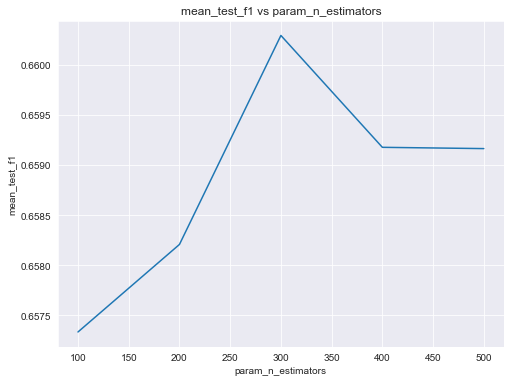

In [92]:
plot_results(cv_results, 'param_n_estimators', 'mean_test_f1')

In [104]:
# Inititating the final model based on tuned hyper parameters
rf_m_org = RandomForestClassifier(class_weight= {0: 1, 1: 7}, max_depth= 8, max_features = 0.5, min_samples_leaf = 5, 
                                  min_samples_split = 20, n_estimators = 300, random_state = 0, n_jobs = -1, verbose=0, oob_score = True)

rf_m_org.fit(tel_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 7},
                       criterion='gini', max_depth=8, max_features=0.5,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=0, verbose=0, warm_start=False)

In [105]:
# cross validation roc_auc score and 'f1' score
cv_score = cross_val_score(rf_m_org, tel_train, y_train, cv = 5, n_jobs = -1, verbose = 1, scoring = 'f1')
print('cross validation f1_scores :{}{}'.format(cv_score.mean(), cv_score.std()))

cv_score = cross_val_score(rf_m_org, tel_train, y_train, cv = 5, n_jobs = -1, verbose = 1, scoring = 'roc_auc')
print('cross validation auc_scores :{}{}'.format(cv_score.mean(), cv_score.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


cross validation f1_scores :0.65569697349767590.02610577055088789


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.2min


cross validation auc_scores :0.94458236091081490.002509131949329279


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


In [106]:
# Checking the metrics on the train dataset
print('Metrics of the train dataset')
classification_rep(y_train,tel_train, rf_m_org)

# Evaluation on the test data
print('Metrics of the test dataset')
classification_rep(y_test,tel_test, rf_m_org)

Metrics of the train dataset
The roc_auc score is 0.9789
confusion matrix:
[[18378   681]
 [  205  1487]]
classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     19059
           1       0.69      0.88      0.77      1692

    accuracy                           0.96     20751
   macro avg       0.84      0.92      0.87     20751
weighted avg       0.96      0.96      0.96     20751

Metrics of the test dataset
The roc_auc score is 0.9462
confusion matrix:
[[7893  376]
 [ 209  523]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8269
           1       0.58      0.71      0.64       732

    accuracy                           0.94      9001
   macro avg       0.78      0.83      0.80      9001
weighted avg       0.94      0.94      0.94      9001



In [367]:
# appending model and result 
model_results.loc[8] = ['Random_ Forest w/o SMT', 'tuned to f1_score', 'Original', 0.9789, 0.9445,0.0025, 0.9462, 0.77, 0.64]
model_results

Model                      Description original/PCA  \
0    Log Reg weight_tuned                   tuned_f1_score          PCA   
1             Log Reg SMT       With SMOTE and tuned to f1          PCA   
2           Random Forest                 tuned to roc_auc          PCA   
3                  RF SMT  With SMOTE and tuned to roc_auc          PCA   
4          GBM Classifier                 tuned to roc_auc          PCA   
5          GBM Classifier                       With smote          PCA   
6          XGB Classifier                 tuned to roc_auc          PCA   
7          XGB Classifier                tuned to f1_score          PCA   
8  Random_ Forest w/o SMT                tuned to f1_score     Original   

   Train_auc_mean  cv_auc_mean  cv_auc_std  test_auc_mean  train_f1_score  \
0          0.9126       0.9039     0.00370         0.8927           0.560   
1          0.9268       0.9023     0.00700         0.8882           0.860   
2          0.9803       0.8990     0.00240         0.8876           0.730   
3          0.9988       0.9011     0.00432         0.8905           0.990   
4          0.9891       0.9124     0.00560         0.9045           0.840   
5          0.9990       0.9109     0.00500         0.8958           0.996   
6          0.9767       0.9126     0.00380         0.9047           0.740   
7          0.9984       0.9126     0.00380         0.9019           0.830   
8          0.9789       0.9445     0.00250         0.9462           0.770   

   test_f1_score  
0           0.53  
1           0.45  
2           0.50  
3           0.50  
4           0.44  
5           0.52  
6           0.45  
7           0.54  
8           0.64

#### Random Forest with SMOTE

In [125]:
# oversampling the train dataset using SMOTE
smt = SMOTE(random_state = 0, n_jobs = -1)
tel_train_smt, y_train_smt = smt.fit_sample(tel_train, y_train)

In [127]:
# Hyper parameter tuning - initial estimates based on broader range 
rf_m = RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [30, 60, 80], 'n_estimators' : [100], 'max_depth' : [10, 12, 14], 'max_features' : [0.5],
            'min_samples_leaf': [10, 15, 20]}

# using the gridsearch for identifying best parameters
cv_results = gridsearch_classifier(rf_m, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'],tel_train_smt, y_train_smt, 'f1')
cv_results[cv_results['rank_test_f1'] == 1]

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 23.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.3s finished


{'max_depth': 14, 'max_features': 0.5, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
18     116.136779       6.45882        21.743925         1.43197   

   param_max_depth param_max_features param_min_samples_leaf  \
18              14                0.5                     10   

   param_min_samples_split param_n_estimators  \
18                      30                100   

                                               params  split0_test_recall  \
18  {'max_depth': 14, 'max_features': 0.5, 'min_sa...            0.949315   

    split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
18             0.95026            0.949945           0.94984         0.000393   

    rank_test_recall  split0_train_recall  split1_train_recall  \
18                 1             0.970329             0.970565   

    split2_train_recall  mean_train_recall  std_train_recall  \
18             0.970565           0.970486          0.000111   

    split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
18              0.945695              0.954352              0.948686   

    mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
18            0.949578            0.00359                   1   

    split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
18               0.966433               0.967181               0.968165   

    mean_train_accuracy  std_train_accuracy  split0_test_precision  \
18              0.96726            0.000709               0.942491   

    split1_test_precision  split2_test_precision  mean_test_precision  \
18               0.958102               0.947558             0.949384   

    std_test_precision  rank_test_precision  split0_train_precision  \
18            0.006502                    1                0.962827   

    split1_train_precision  split2_train_precision  mean_train_precision  \
18                 0.96404                0.965928              0.964265   

    std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
18             0.001276             0.986997             0.989282   

    split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
18             0.986347           0.987542          0.001259   

    rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
18                  1              0.995438              0.995396   

    split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
18              0.995497            0.995444           0.000042   

    split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
18        0.945891        0.954165         0.94875      0.949602     0.003431   

    rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
18             1         0.966563         0.967292         0.968241   

    mean_train_f1  std_train_f1  
18       0.967365      0.000687

In [128]:
# Hyper parameter further tuning
rf_m = RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [10, 20, 30], 'n_estimators' : [100], 'max_depth' : [14, 16, 18], 'max_features' : [0.5],
            'min_samples_leaf': [1, 5, 10,]}

# using the gridsearch for identifying best parameters
cv_results = gridsearch_classifier(rf_m, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'],tel_train_smt, y_train_smt, 'f1')
cv_results[cv_results['rank_test_f1'] == 1]

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 29.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   36.7s finished


{'max_depth': 18, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
18     146.256075       5.16046        25.762139         0.47665   

   param_max_depth param_max_features param_min_samples_leaf  \
18              18                0.5                      1   

   param_min_samples_split param_n_estimators  \
18                      10                100   

                                               params  split0_test_recall  \
18  {'max_depth': 18, 'max_features': 0.5, 'min_sa...             0.96726   

    split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
18            0.969148            0.966473          0.967627         0.001123   

    rank_test_recall  split0_train_recall  split1_train_recall  \
18                 1             0.997324             0.996931   

    split2_train_recall  mean_train_recall  std_train_recall  \
18             0.997245           0.997167           0.00017   

    split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
18              0.959311              0.965922              0.960412   

    mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
18            0.961882           0.002892                   1   

    split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
18               0.988982                 0.9891               0.989533   

    mean_train_accuracy  std_train_accuracy  split0_test_precision  \
18             0.989205            0.000237               0.952123   

    split1_test_precision  split2_test_precision  mean_test_precision  \
18               0.962934               0.954899             0.956652   

    std_test_precision  rank_test_precision  split0_train_precision  \
18            0.004584                    1                0.980957   

    split1_train_precision  split2_train_precision  mean_train_precision  \
18                0.981558                0.982096              0.981537   

    std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
18             0.000465              0.99132             0.992183   

    split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
18             0.990211           0.991238          0.000807   

    rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
18                  1              0.999385              0.999406   

    split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
18              0.999401            0.999397           0.000009   

    split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
18        0.959631        0.966031        0.960651      0.962105     0.002808   

    rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
18             1         0.989073         0.989184         0.989613   

    mean_train_f1  std_train_f1  
18        0.98929      0.000233

In [133]:
# Hyper parameter tuning
rf_m = RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [3], 'n_estimators' : [100], 'max_depth' : [32, 34,36], 'max_features' : [0.5],
            'min_samples_leaf': [1]}

# using the gridsearch for identifying best parameters
cv_results = gridsearch_classifier(rf_m, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'],tel_train_smt, y_train_smt, 'f1')
cv_results[cv_results['rank_test_f1'] == 1]

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  5.6min remaining:  7.0min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  6.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  6.3min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


{'max_depth': 34, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1      328.96421      1.650716         4.283164        1.625913   

  param_max_depth param_max_features param_min_samples_leaf  \
1              34                0.5                      1   

  param_min_samples_split param_n_estimators  \
1                       3                100   

                                              params  split0_test_recall  \
1  {'max_depth': 34, 'max_features': 0.5, 'min_sa...            0.972297   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
1            0.969935            0.971824          0.971352          0.00102   

   rank_test_recall  split0_train_recall  split1_train_recall  \
1                 1                  1.0                  1.0   

   split2_train_recall  mean_train_recall  std_train_recall  \
1                  1.0                1.0               0.0   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
1              0.964111               0.96781              0.964898   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
1            0.965607           0.001591                   1   

   split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
1               0.999764               0.999921               0.999921   

   mean_train_accuracy  std_train_accuracy  split0_test_precision  \
1             0.999869            0.000074               0.956636   

   split1_test_precision  split2_test_precision  mean_test_precision  \
1               0.965831               0.958547             0.960338   

   std_test_precision  rank_test_precision  split0_train_precision  \
1            0.003962                    1                0.999528   

   split1_train_precision  split2_train_precision  mean_train_precision  \
1                0.999843                0.999843              0.999738   

   std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
1             0.000148             0.993071             0.993923   

   split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
1             0.992491           0.993162          0.000588   

   rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
1                  1                   1.0                   1.0   

   split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
1                   1.0                 1.0       8.759863e-09   

   split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
1        0.964403        0.967879         0.96514      0.965807     0.001495   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
1             1         0.999764         0.999921         0.999921   

   mean_train_f1  std_train_f1  
1       0.999869      0.000074

In [135]:
# Hyper parameter tuning - max_features
rf_m = RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [3], 'n_estimators' : [100], 'max_depth' : [34], 'max_features' : [0.5, 'auto', 0.8, 2],
            'min_samples_leaf': [1]}

# using the gridsearch for identifying best parameters
cv_results = gridsearch_classifier(rf_m, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'],tel_train_smt, y_train_smt, 'f1')
cv_results[cv_results['rank_test_f1'] == 1]

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:  2.9min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.6s finished


{'max_depth': 34, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1      40.056564      0.822923        27.878127        0.294312   

  param_max_depth param_max_features param_min_samples_leaf  \
1              34               auto                      1   

  param_min_samples_split param_n_estimators  \
1                       3                100   

                                              params  split0_test_recall  \
1  {'max_depth': 34, 'max_features': 'auto', 'min...            0.973713   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
1            0.975445            0.973556          0.974238         0.000856   

   rank_test_recall  split0_train_recall  split1_train_recall  \
1                 1                  1.0                  1.0   

   split2_train_recall  mean_train_recall  std_train_recall  \
1                  1.0                1.0               0.0   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
1              0.964033              0.971824              0.966473   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
1            0.967443           0.003254                   1   

   split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
1               0.999921               0.999921                    1.0   

   mean_train_accuracy  std_train_accuracy  split0_test_precision  \
1             0.999948            0.000037               0.955219   

   split1_test_precision  split2_test_precision  mean_test_precision  \
1               0.968433               0.960106             0.961252   

   std_test_precision  rank_test_precision  split0_train_precision  \
1            0.005455                    1                0.999843   

   split1_train_precision  split2_train_precision  mean_train_precision  \
1                0.999843                     1.0              0.999895   

   std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
1             0.000074             0.993652             0.994898   

   split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
1             0.993276           0.993942          0.000694   

   rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
1                  1                   1.0                   1.0   

   split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
1                   1.0                 1.0       6.409876e-17   

   split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
1        0.964378        0.971926        0.966784      0.967696     0.003148   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
1             1         0.999921         0.999921              1.0   

   mean_train_f1  std_train_f1  
1       0.999948      0.000037

In [136]:
# estimating optimum number of trees required
rf_m = RandomForestClassifier(random_state = 0, n_jobs = -1, verbose=1, oob_score = True)
params_rf = {'min_samples_split' : [3], 'n_estimators' : range(100,500,100), 'max_depth' : [34], 'max_features' : ['auto'],
            'min_samples_leaf': [1]}

# using the gridsearch for identifying best parameters
cv_results = gridsearch_classifier(rf_m, params_rf, ['recall', 'accuracy', 'precision', 'roc_auc', 'f1'],tel_train_smt, y_train_smt, 'f1')
cv_results[cv_results['rank_test_f1'] == 1]

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:  1.5min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   24.8s finished


{'max_depth': 34, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 400}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      65.258854      8.431956         3.975193        1.689662   

  param_max_depth param_max_features param_min_samples_leaf  \
3              34               auto                      1   

  param_min_samples_split param_n_estimators  \
3                       3                400   

                                              params  split0_test_recall  \
3  {'max_depth': 34, 'max_features': 'auto', 'min...            0.974815   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
3            0.975917            0.974028           0.97492         0.000775   

   rank_test_recall  split0_train_recall  split1_train_recall  \
3                 1                  1.0                  1.0   

   split2_train_recall  mean_train_recall  std_train_recall  \
3                  1.0                1.0               0.0   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
3              0.965135              0.972218              0.966079   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
3             0.96781            0.00314                   1   

   split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
3                    1.0                    1.0                    1.0   

   mean_train_accuracy  std_train_accuracy  split0_test_precision  \
3                  1.0                 0.0                 0.9563   

   split1_test_precision  split2_test_precision  mean_test_precision  \
3                0.96875               0.958785             0.961278   

   std_test_precision  rank_test_precision  split0_train_precision  \
3             0.00538                    3                     1.0   

   split1_train_precision  split2_train_precision  mean_train_precision  \
3                     1.0                     1.0                   1.0   

   std_train_precision  split0_test_roc_auc  split1_test_roc_auc  \
3                  0.0             0.994018             0.995142   

   split2_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  \
3             0.993519           0.994226          0.000679   

   rank_test_roc_auc  split0_train_roc_auc  split1_train_roc_auc  \
3                  1                   1.0                   1.0   

   split2_train_roc_auc  mean_train_roc_auc  std_train_roc_auc  \
3                   1.0                 1.0                0.0   

   split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
3        0.965469         0.97232        0.966347      0.968045     0.003044   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
3             1              1.0              1.0              1.0   

   mean_train_f1  std_train_f1  
3            1.0           0.0

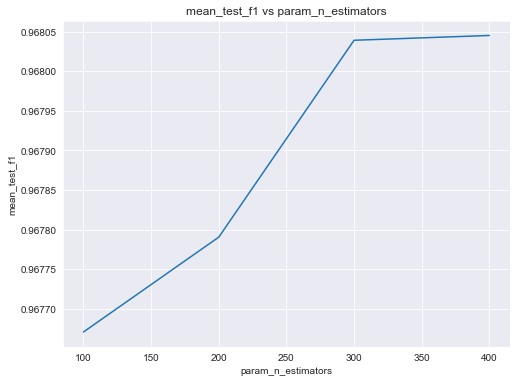

In [137]:
plot_results(cv_results, 'param_n_estimators', 'mean_test_f1')

In [138]:
# Inititating the final model based on tuned hyper parameters
rf_m_org_smt = RandomForestClassifier(max_depth= 34, max_features = 'auto', min_samples_leaf = 1, 
                                  min_samples_split = 3, n_estimators = 400, random_state = 0, n_jobs = -1, verbose=0, oob_score = True)

rf_m_org_smt.fit(tel_train_smt, y_train_smt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=34, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [141]:
# Based on the function created for cross-validation smote, estimating cross_val_score
results = repeated_evaluation_smote(rf_m_org_smt, tel_train, y_train)
results.mean(), results.std()

(train_auc_scores    1.000000
 test_auc_scores     0.937086
 train_pr_scores     0.999987
 test_pr_scores      0.625383
 train_re_scores     1.000000
 test_re_scores      0.640661
 train_acc_scores    0.999993
 test_acc_scores     0.939280
 dtype: float64, train_auc_scores    0.000000
 test_auc_scores     0.003156
 train_pr_scores     0.000029
 test_pr_scores      0.020947
 train_re_scores     0.000000
 test_re_scores      0.022773
 train_acc_scores    0.000015
 test_acc_scores     0.002618
 dtype: float64)

In [144]:
# classificaiton report on train data
classification_rep(y_train, tel_train, rf_m_org_smt)

The roc_auc score is 0.994
confusion matrix:
[[18930   129]
 [  124  1568]]
classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19059
           1       0.92      0.93      0.93      1692

    accuracy                           0.99     20751
   macro avg       0.96      0.96      0.96     20751
weighted avg       0.99      0.99      0.99     20751



In [143]:
# evaluation of the model on the test dataset
classification_rep(y_test, tel_test, rf_m_org_smt)

The roc_auc score is 0.9358
confusion matrix:
[[7961  308]
 [ 275  457]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8269
           1       0.60      0.62      0.61       732

    accuracy                           0.94      9001
   macro avg       0.78      0.79      0.79      9001
weighted avg       0.94      0.94      0.94      9001



In [368]:
model_results.loc[9] = ['Random_ Forest  SMT', 'tuned to f1_score', 'Original', 0.994, 0.9370,0.003, 0.9358, 0.93, 0.61]
model_results

Model                      Description original/PCA  \
0    Log Reg weight_tuned                   tuned_f1_score          PCA   
1             Log Reg SMT       With SMOTE and tuned to f1          PCA   
2           Random Forest                 tuned to roc_auc          PCA   
3                  RF SMT  With SMOTE and tuned to roc_auc          PCA   
4          GBM Classifier                 tuned to roc_auc          PCA   
5          GBM Classifier                       With smote          PCA   
6          XGB Classifier                 tuned to roc_auc          PCA   
7          XGB Classifier                tuned to f1_score          PCA   
8  Random_ Forest w/o SMT                tuned to f1_score     Original   
9     Random_ Forest  SMT                tuned to f1_score     Original   

   Train_auc_mean  cv_auc_mean  cv_auc_std  test_auc_mean  train_f1_score  \
0          0.9126       0.9039     0.00370         0.8927           0.560   
1          0.9268       0.9023     0.00700         0.8882           0.860   
2          0.9803       0.8990     0.00240         0.8876           0.730   
3          0.9988       0.9011     0.00432         0.8905           0.990   
4          0.9891       0.9124     0.00560         0.9045           0.840   
5          0.9990       0.9109     0.00500         0.8958           0.996   
6          0.9767       0.9126     0.00380         0.9047           0.740   
7          0.9984       0.9126     0.00380         0.9019           0.830   
8          0.9789       0.9445     0.00250         0.9462           0.770   
9          0.9940       0.9370     0.00300         0.9358           0.930   

   test_f1_score  
0           0.53  
1           0.45  
2           0.50  
3           0.50  
4           0.44  
5           0.52  
6           0.45  
7           0.54  
8           0.64  
9           0.61

### 7. Comparison of the models and identification of optimal model <a id='VII'></a>

In [369]:
# Comparison of the models prepared
model_results

Model                      Description original/PCA  \
0    Log Reg weight_tuned                   tuned_f1_score          PCA   
1             Log Reg SMT       With SMOTE and tuned to f1          PCA   
2           Random Forest                 tuned to roc_auc          PCA   
3                  RF SMT  With SMOTE and tuned to roc_auc          PCA   
4          GBM Classifier                 tuned to roc_auc          PCA   
5          GBM Classifier                       With smote          PCA   
6          XGB Classifier                 tuned to roc_auc          PCA   
7          XGB Classifier                tuned to f1_score          PCA   
8  Random_ Forest w/o SMT                tuned to f1_score     Original   
9     Random_ Forest  SMT                tuned to f1_score     Original   

   Train_auc_mean  cv_auc_mean  cv_auc_std  test_auc_mean  train_f1_score  \
0          0.9126       0.9039     0.00370         0.8927           0.560   
1          0.9268       0.9023     0.00700         0.8882           0.860   
2          0.9803       0.8990     0.00240         0.8876           0.730   
3          0.9988       0.9011     0.00432         0.8905           0.990   
4          0.9891       0.9124     0.00560         0.9045           0.840   
5          0.9990       0.9109     0.00500         0.8958           0.996   
6          0.9767       0.9126     0.00380         0.9047           0.740   
7          0.9984       0.9126     0.00380         0.9019           0.830   
8          0.9789       0.9445     0.00250         0.9462           0.770   
9          0.9940       0.9370     0.00300         0.9358           0.930   

   test_f1_score  
0           0.53  
1           0.45  
2           0.50  
3           0.50  
4           0.44  
5           0.52  
6           0.45  
7           0.54  
8           0.64  
9           0.61

1. Tried various imbalanced techniques such as tuning class_weight parameters for the model
2. PCA Models: For roc_auc metric, GBM and XGB models work far better than logistic and random forest models
3. **Models based on original features (indices 8 and 9 in the above) perform much better than pca models**
3. **Since the dataset is heavily imbalanced, f1_score could be the better evaluation metric than roc_auc**
4. **Maximum f1_score possible can be calculated for each model**
5. **Best model can be selected based on the maximum f1_score of the model**

In [370]:
# creating a function for calculating maximum f1_Score for each model
pca_models = [log_m, log_m_smt, rf_m1, rf_m_smt, xgb4, xgb6, gbm_f, gbm_f_smt]
org_models = [rf_m_org, rf_m_org_smt]
max_f1_scores = []
t_cutoff = []

# creating a function for calculating maximum f1_score
def max_f1_score(model, X_test, y_test):
    y_pred = model.predict_proba(X_test)
    p, r, thresholds = precision_recall_curve(y_test, y_pred[:,1])
    f1_scores = pd.DataFrame({'precision' : p[:-1], 'recall' : r[:-1], 'thresholds' : thresholds})
    f1_scores['f1_score'] = 2*f1_scores['precision']*f1_scores['recall']/(f1_scores['precision']+f1_scores['recall'])
    t = f1_scores['f1_score'].max()
    index = f1_scores['f1_score'].argmax()
    max_f1_scores.append(t)
    t_cutoff.append(f1_scores.loc[index,'thresholds'])

# calculating maximum f1_score for each of the models usingthe above function
for t in pca_models:
    max_f1_score(t, X_test, y_test)

for t in org_models:
    max_f1_score(t, tel_test, y_test)

In [372]:
# assigning the max_f1_Scores and thres_cutoff to the model_results dataframe
model_results['max_f1_score'] = max_f1_scores
model_results['thresh_cut_off - max_f1'] = t_cutoff

In [373]:
# Final model comparison for selection
model_results

Model                      Description original/PCA  \
0    Log Reg weight_tuned                   tuned_f1_score          PCA   
1             Log Reg SMT       With SMOTE and tuned to f1          PCA   
2           Random Forest                 tuned to roc_auc          PCA   
3                  RF SMT  With SMOTE and tuned to roc_auc          PCA   
4          GBM Classifier                 tuned to roc_auc          PCA   
5          GBM Classifier                       With smote          PCA   
6          XGB Classifier                 tuned to roc_auc          PCA   
7          XGB Classifier                tuned to f1_score          PCA   
8  Random_ Forest w/o SMT                tuned to f1_score     Original   
9     Random_ Forest  SMT                tuned to f1_score     Original   

   Train_auc_mean  cv_auc_mean  cv_auc_std  test_auc_mean  train_f1_score  \
0          0.9126       0.9039     0.00370         0.8927           0.560   
1          0.9268       0.9023     0.00700         0.8882           0.860   
2          0.9803       0.8990     0.00240         0.8876           0.730   
3          0.9988       0.9011     0.00432         0.8905           0.990   
4          0.9891       0.9124     0.00560         0.9045           0.840   
5          0.9990       0.9109     0.00500         0.8958           0.996   
6          0.9767       0.9126     0.00380         0.9047           0.740   
7          0.9984       0.9126     0.00380         0.9019           0.830   
8          0.9789       0.9445     0.00250         0.9462           0.770   
9          0.9940       0.9370     0.00300         0.9358           0.930   

   test_f1_score  max_f1_score  thresh_cut_off - max_f1  
0           0.53      0.533565                 0.596471  
1           0.45      0.530702                 0.744484  
2           0.50      0.514444                 0.454654  
3           0.50      0.513326                 0.468966  
4           0.44      0.551764                 0.215250  
5           0.52      0.552699                 0.599808  
6           0.45      0.558426                 0.253704  
7           0.54      0.531494                 0.549476  
8           0.64      0.642581                 0.539207  
9           0.61      0.622698                 0.402917

**Final Model Selection**

1. From PCA Models, XGB classifer without smote (xgb4) can be selected with a max f1_score of 0.5584
2. From Original Features models, Random Forest without smote can be selected with a max f1_score of 0.6426

#### Random forest on original features

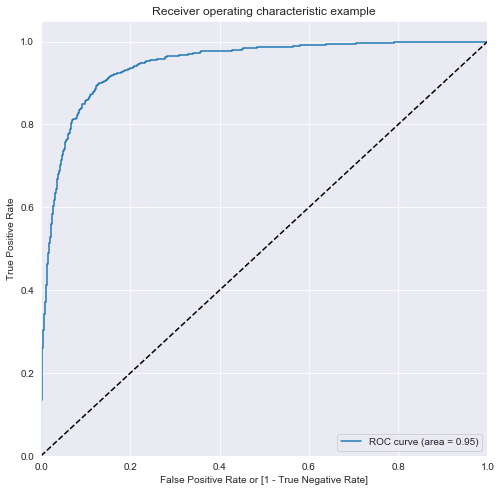

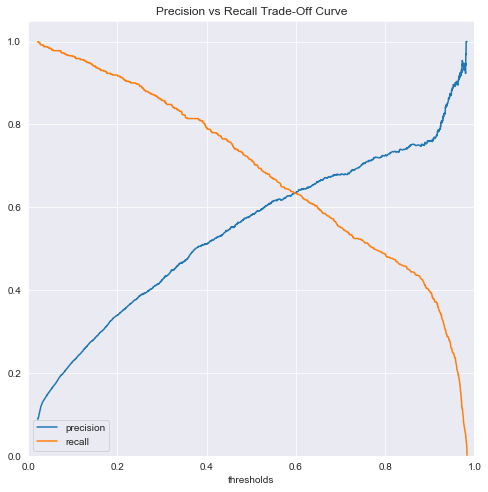

thresh  accuracy      prec     recal
0.00    0.00  0.081324  0.081324  1.000000
0.05    0.05  0.572936  0.158172  0.983607
0.10    0.10  0.730919  0.227595  0.964481
0.15    0.15  0.803022  0.284828  0.941257
0.20    0.20  0.847906  0.339223  0.918033
0.25    0.25  0.875680  0.385706  0.892077
0.30    0.30  0.893901  0.424611  0.857923
0.35    0.35  0.910121  0.469945  0.822404
0.40    0.40  0.921675  0.511894  0.793716
0.45    0.45  0.929119  0.546260  0.758197
0.50    0.50  0.935007  0.581758  0.714481
0.55    0.55  0.939007  0.615094  0.668033
0.60    0.60  0.940673  0.635616  0.633880
0.65    0.65  0.942451  0.662121  0.596995
0.70    0.70  0.942229  0.678451  0.550546
0.75    0.75  0.943117  0.704461  0.517760
0.80    0.80  0.943229  0.725051  0.486339
0.85    0.85  0.942673  0.743243  0.450820
0.90    0.90  0.940784  0.759791  0.397541
0.95    0.95  0.936452  0.884615  0.251366
1.00    1.00  0.918676  0.000000  0.000000

In [159]:
# Inferences from selected model from original feature models _ random forest (rf_m_org)
metrics_curves(y_test, tel_test, rf_m_org)

1. From the above table, As you aim for higher thresholds severe drop in precision observed
2. **The area under roc_curve is 0.95**
2. Depending upon the cost of precision (extra revenue loss for predicting a normal cost as churn), the threshold can be selected to aim at a optimized recal and precision score
3. Since the main objective is to predicting churn, **threshold of 0.35 can be selected**, this will result in `recall - 0.82`, `accuracy - 0.91` and `precision - 0.47`
4. **Please note that this threshold can be further reduced to achieve a higher recall but at the cost of precision**

**Metrics based on the selected threshold**

In [170]:
# Final metrics based on the selected threshold
y_pred = [1 if p > 0.35 else 0 for p in rf_m_org.predict_proba(tel_test)[:, 1]]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      8269
           1       0.47      0.82      0.60       732

    accuracy                           0.91      9001
   macro avg       0.73      0.87      0.77      9001
weighted avg       0.94      0.91      0.92      9001

[[7590  679]
 [ 130  602]]


#### XGB classifer based on PCA transformed data (tuned to roc_auc)

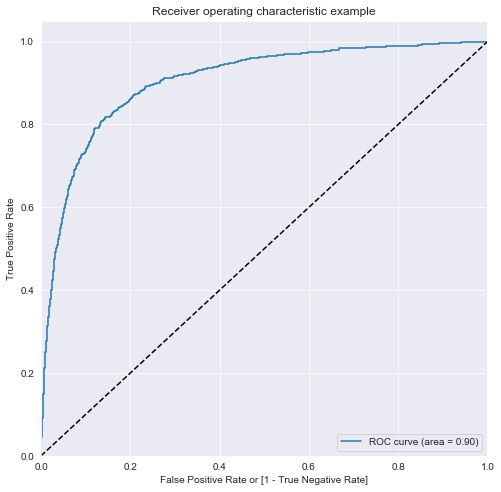

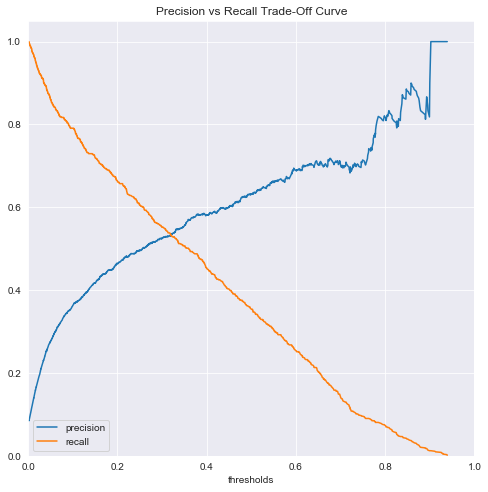

thresh  accuracy      prec     recal
0.00    0.00  0.081324  0.081324  1.000000
0.05    0.05  0.804466  0.275350  0.860656
0.10    0.10  0.870126  0.363009  0.790984
0.15    0.15  0.895345  0.416930  0.719945
0.20    0.20  0.910343  0.464183  0.663934
0.25    0.25  0.917787  0.495526  0.605191
0.30    0.30  0.923120  0.526042  0.551913
0.35    0.35  0.926897  0.555389  0.506831
0.40    0.40  0.929119  0.582456  0.453552
0.45    0.45  0.929563  0.600000  0.401639
0.50    0.50  0.930674  0.631707  0.353825
0.55    0.55  0.930785  0.661721  0.304645
0.60    0.60  0.929897  0.687732  0.252732
0.65    0.65  0.928230  0.702830  0.203552
0.70    0.70  0.925231  0.700680  0.140710
0.75    0.75  0.923231  0.711340  0.094262
0.80    0.80  0.923231  0.815385  0.072404
0.85    0.85  0.921453  0.878788  0.039617
0.90    0.90  0.919676  1.000000  0.012295
0.95    0.95  0.918676  0.000000  0.000000
1.00    1.00  0.918676  0.000000  0.000000

In [167]:
# Inferences from selected model from original feature models _ random forest (rf_m_org)
metrics_curves(y_test, X_test, xgb4)

1. From the above table, As you aim for higher thresholds severe drop in precision observed
2. **The area under roc_curve is 0.90**
2. Depending upon the cost of precision (extra revenue loss for predicting a normal cost as churn), the threshold can be selected to aim at a optimized recal and precision score
3. Since the main objective is to predicting churn, **threshold of 0.1 can be selected**, this will result in `recall - 0.`79, `accuracy - 0.87` and `precision - 0.36`
4. **Please note that this threshold can be further reduced to achieve a higher recall but at the cost of precision**

**Metrics based on the selected threshold**

In [171]:
# Final metrics based on the selected threshold
y_pred = [1 if p > 0.1 else 0 for p in xgb4.predict_proba(X_test)[:, 1]]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8269
           1       0.36      0.79      0.50       732

    accuracy                           0.87      9001
   macro avg       0.67      0.83      0.71      9001
weighted avg       0.93      0.87      0.89      9001

[[7253 1016]
 [ 153  579]]


#### XGB Classifier on PCA dataset

In [161]:
# Based on the above, choosing 0.1 as threshold
y_pred_prob = (xgb4.predict_proba(X_train))[:,1]
train_pred = pd.DataFrame({'acutal': y_train.values, 'prob': y_pred_prob, 'pred': [1 if t>=0.1 else 0 for t in y_pred_prob]})

# predicting for the train dataset
print(classification_report(y_train, train_pred['pred']))
print(confusion_matrix(y_train, train_pred['pred']))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     18963
           1       0.48      0.96      0.64      1794

    accuracy                           0.91     20757
   macro avg       0.74      0.93      0.79     20757
weighted avg       0.95      0.91      0.92     20757

[[17097  1866]
 [   72  1722]]


In [162]:
# predicting for the test dataset using 0.1 as threshold
y_pred_prob = (xgb4.predict_proba(X_test))[:,1]
test_pred = pd.DataFrame({'acutal': y_test.values, 'prob': y_pred_prob, 'pred': [1 if t>=0.1 else 0 for t in y_pred_prob]})

# predicting for the test dataset
print(classification_report(y_test, test_pred['pred']))
print(confusion_matrix(y_test, test_pred['pred']))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8226
           1       0.37      0.82      0.51       778

    accuracy                           0.86      9004
   macro avg       0.67      0.84      0.71      9004
weighted avg       0.93      0.86      0.88      9004

[[7127 1099]
 [ 138  640]]


### 8. Identifying important features through Random Forest Model on original features <a id='VIII'></a>

In [197]:
# lets plot the relative importance of each variable as statistically identified by the random forest classifier
importances = rf_m_org.feature_importances_

feat_imp = pd.DataFrame({'features': tel_train.columns, 'importance': importances})

# selecting top 20
feat_imp = feat_imp.sort_values('importance', ascending = False).iloc[0:21,:]
feat_imp

features  importance
65               loc_ic_mou_8    0.193549
80             total_ic_mou_8    0.166295
59           loc_ic_t2m_mou_8    0.086556
101       date_of_last_rech_8    0.050509
14              roam_og_mou_8    0.045205
104        last_day_rch_amt_8    0.043955
56           loc_ic_t2t_mou_8    0.043510
122        av_rech_amt_data_8    0.030427
11              roam_ic_mou_8    0.020756
95           total_rech_amt_8    0.017623
53             total_og_mou_8    0.016274
152                 fb_user_8    0.016179
91           total_rech_num_7    0.015727
107  date_of_last_rech_data_8    0.014524
29               loc_og_mou_8    0.009130
113           max_rech_data_8    0.009089
20           loc_og_t2m_mou_8    0.007918
125               vol_2g_mb_8    0.007524
40               std_og_mou_7    0.007426
2                      arpu_8    0.006495
1                      arpu_7    0.006328

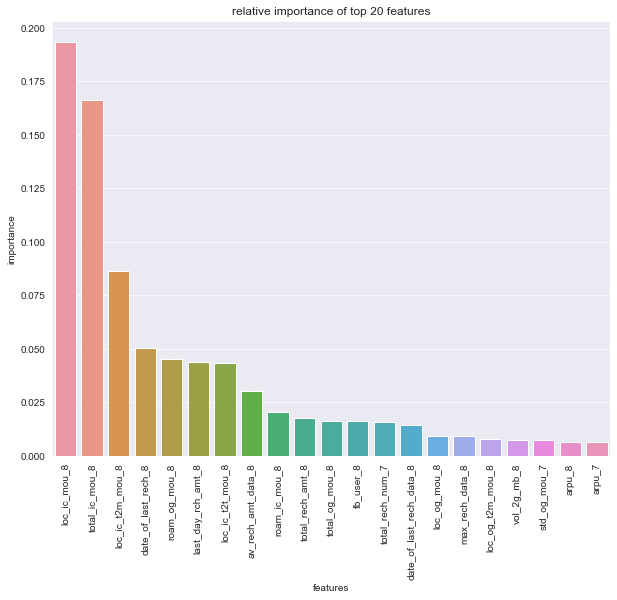

In [198]:
# plottting importing features
plt.figure(figsize =(10, 8))
sns.barplot(x = feat_imp['features'], y = feat_imp['importance'])
plt.xticks(rotation = 90)
plt.title('relative importance of top 20 features')
plt.show()

### 9. Recommended strategies to manage Customer Churn <a id='IX'></a>

**Major Indicators for the churn:**

1. No user acitivity in the action phase (i.e 8th month)is the strongest indicator of churn. Low or no incoming calls, Low or no outgoing calls, and low roaming usage compared to earlier generally indicate the customer is likely to churn

2. Th customers who are using data services like `fb_user_8` are less likely to churn and the customers who are using less data and recharging frequency indicates the customer is likely to churn

3. Total recharge amount in the 8month, arpu and churn are negatively correlated which means the customers who are not recharging frequently or having low arpu are likely to churn

4. Some of the other columns from 7th month that indicate churn are low revenue per user and low std outgoing

**Strategies recommended to manage customer churn:**

When the customer have the traits of the churn or the model predicts churn for a customer, we can apply various strategies 

1. Based on the churn prediction by the model, the telecom company may give discounts on recharge and cashbacks to these customer which may help in retaining the customers

2. Taking feedback from the customers who are likely to churn, address issues such as quality of services etc. and provide seamless customer experience

3. Staying competitive in the market - announcing special plans at a competitive price

4. Announcing special plans for various customer targets - data + call package for young generation, monthly call package for village and elder people etc.  

End
*******